# Main Focus of the Notebook: Plotting the filtered Tracks with different Lifetime Cohorts and Cummulative Plots
## Divided into three sections 
1. Dynamin and Clathrin positive 
2. Actin and Clathrin positive 
3. Actin, Dynamin and Clathrin positive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os
sys.path.append('../src/')
from intensity_time_plots import filter_track_ids_by_length_ranges, random_track_ids
from intensity_time_plots import intensity_time_plot, createBufferForLifetimeCohort
from intensity_time_plots import createBufferForLifetimeCohort_normalized, cumulative_plots

In [2]:
# This assumes that your notebook is inside 'Jupyter Notebooks', which is at the same level as 'test_data'
base_dir = os.path.join(os.path.dirname(os.path.abspath("__file__")), '..', 'movie_data')

zarr_directory = 'zarr_file/all_channels_data'
zarr_full_path = os.path.join(base_dir, zarr_directory)

input_directory = 'datasets'
input_file_name = 'track_df_cleaned_final_full.pkl'
input_directory_all_tracks_full = os.path.join(base_dir,input_directory, input_file_name)

input_file_name = 'filtered_tracks_final.pkl'
input_directory_full_filtered_tracks = os.path.join(base_dir,input_directory , input_file_name)

In [ ]:
####### Adjust these parameters for your movies #######

bg_intensity_ch1 = 240
bg_intensity_ch2 = 160
bg_intensity_ch3 = 170


In [3]:
track_df = pd.read_pickle(input_directory_all_tracks_full)
filtered_tracks = pd.read_pickle(input_directory_full_filtered_tracks)

In [4]:
track_df.columns

Index(['frame', 'index', 'c3_gaussian_amp', 'c3_mu_x', 'c3_mu_y', 'c3_mu_z',
       'c3_sigma_x', 'c3_sigma_y', 'c3_sigma_z', 'errors', 'frame_y',
       'mean_errors_mu', 'mean_errors_sigma', 'tree_id', 'track_id',
       'number_of_frames', 'color', 'c3_mean_amp', 'c3_voxel_sum',
       'c3_voxel_sum_adjusted', 'c3_peak_amp', 'c3_peak_x', 'c3_peak_y',
       'c3_peak_z', 'c2_amp', 'c2_peak_amp', 'c2_peak_x', 'c2_peak_y',
       'c2_peak_z', 'c2_peak_mean', 'c2_voxel_sum', 'c2_voxel_sum_adjusted',
       'c2_gaussian_amp', 'c2_mu_x', 'c2_mu_y', 'c2_mu_z', 'c2_sigma_x',
       'c2_sigma_y', 'c2_sigma_z', 'c1_amp', 'c1_peak_amp', 'c1_peak_x',
       'c1_peak_y', 'c1_peak_z', 'c1_voxel_sum', 'c1_voxel_sum_adjusted',
       'c1_gaussian_amp', 'c1_mu_x', 'c1_mu_y', 'c1_mu_z', 'c1_sigma_x',
       'c1_sigma_y', 'c1_sigma_z'],
      dtype='object')

# Category 1 
## Dynamin and Clathrin Positive 

In [5]:
cat1_df = filtered_tracks[filtered_tracks['channel2_positive'] == True]
cat1_df.shape

(171, 24)

### The following function takes in our dataframe and returns track id arrays for the defined length ranges. The length ranges are defined and can be altered as per requirement

In [6]:
custom_length_ranges = [[5, 10], [11,15], [16, 20], [21, 25], [26, 30], [31, 40], [41,90]]
track_id_arrays = filter_track_ids_by_length_ranges(dataframe = cat1_df, track_length_buckets = custom_length_ranges, 
                                 track_id_col_name = 'track_id', track_length_col_name = 'track_length')

In [7]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,20] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [21,25] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [26,30] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [31,40] inclusive are {len(track_id_arrays[5])}')
print(f'number of tracks between [41,90] inclusive are {len(track_id_arrays[6])}')

number of tracks between [5,10] inclusive are 29
number of tracks between [11,15] inclusive are 43
number of tracks between [16,20] inclusive are 36
number of tracks between [21,25] inclusive are 30
number of tracks between [26,30] inclusive are 10
number of tracks between [31,40] inclusive are 16
number of tracks between [41,90] inclusive are 6


### The following function selects random track ids of a desired length 

In [8]:
random_tracks = random_track_ids(dataframe = cat1_df, desired_length = [5,10], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

# Plotting 64 tracks of length between 5 and 10 inclusive 

### The amplitude used for plotting is voxel sum from both channels. Minimum voxel sum is subtracted from all values to try and bring starting intensities close to zero

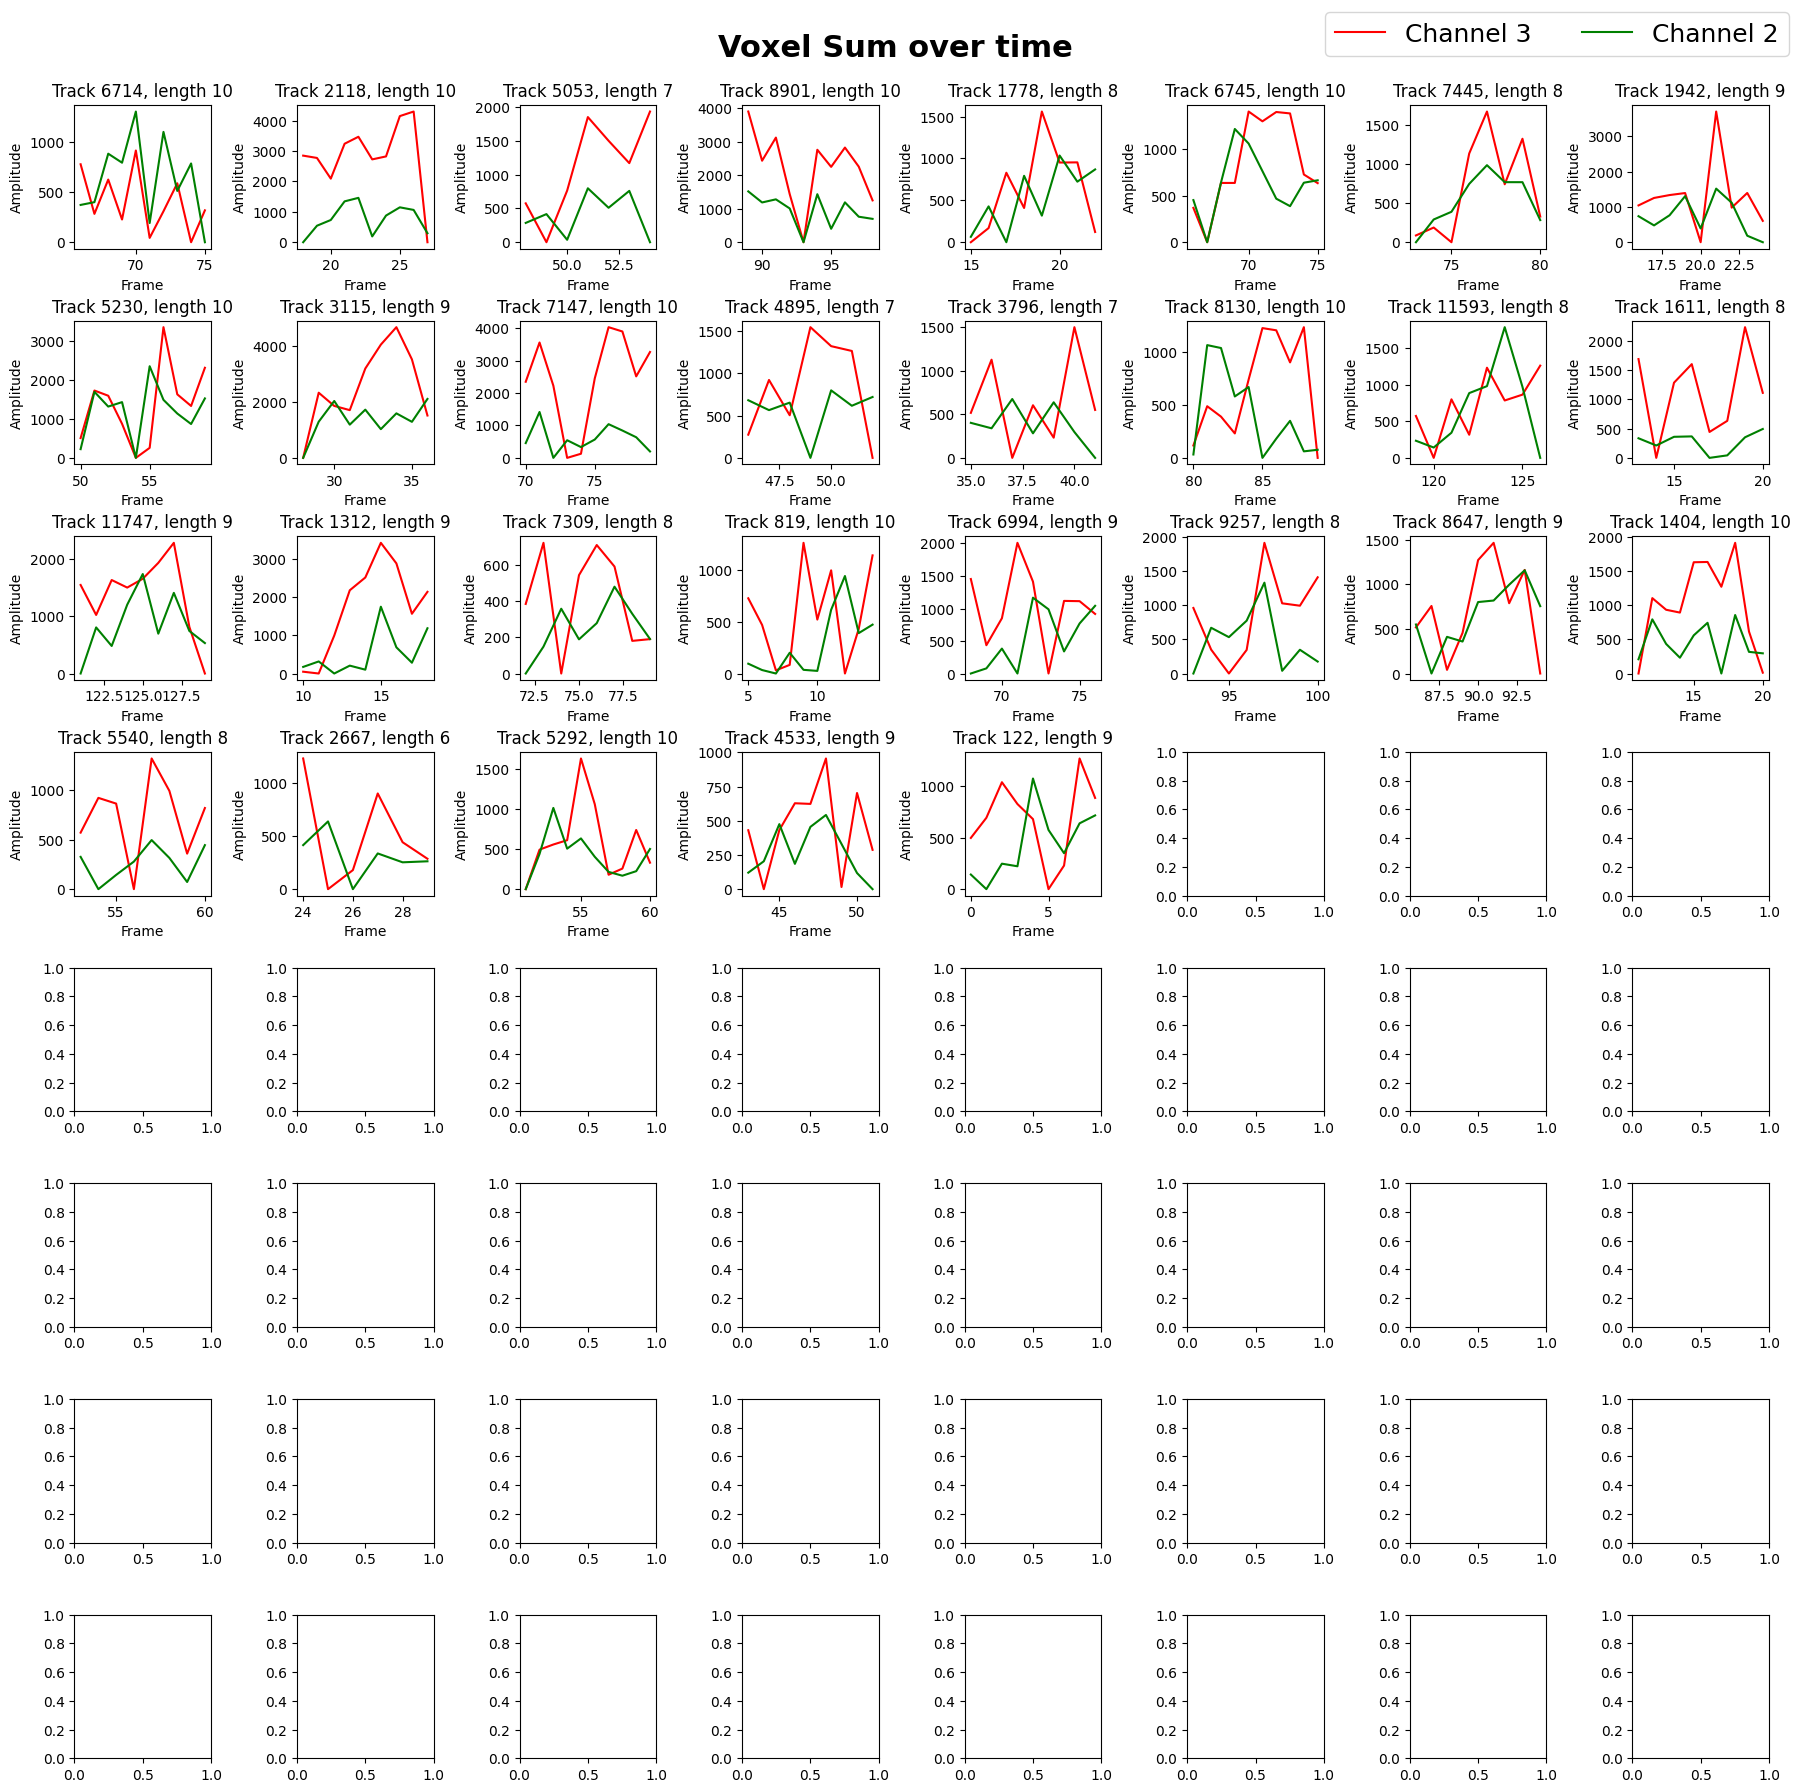

In [9]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 2'],
line_colors = ['red', 'green'], graph_title = 'Voxel Sum')

# Plotting 64 tracks between length 11 and 15 inclusive 

In [10]:
random_tracks_2 = random_track_ids(dataframe = cat1_df, desired_length = [11,15], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

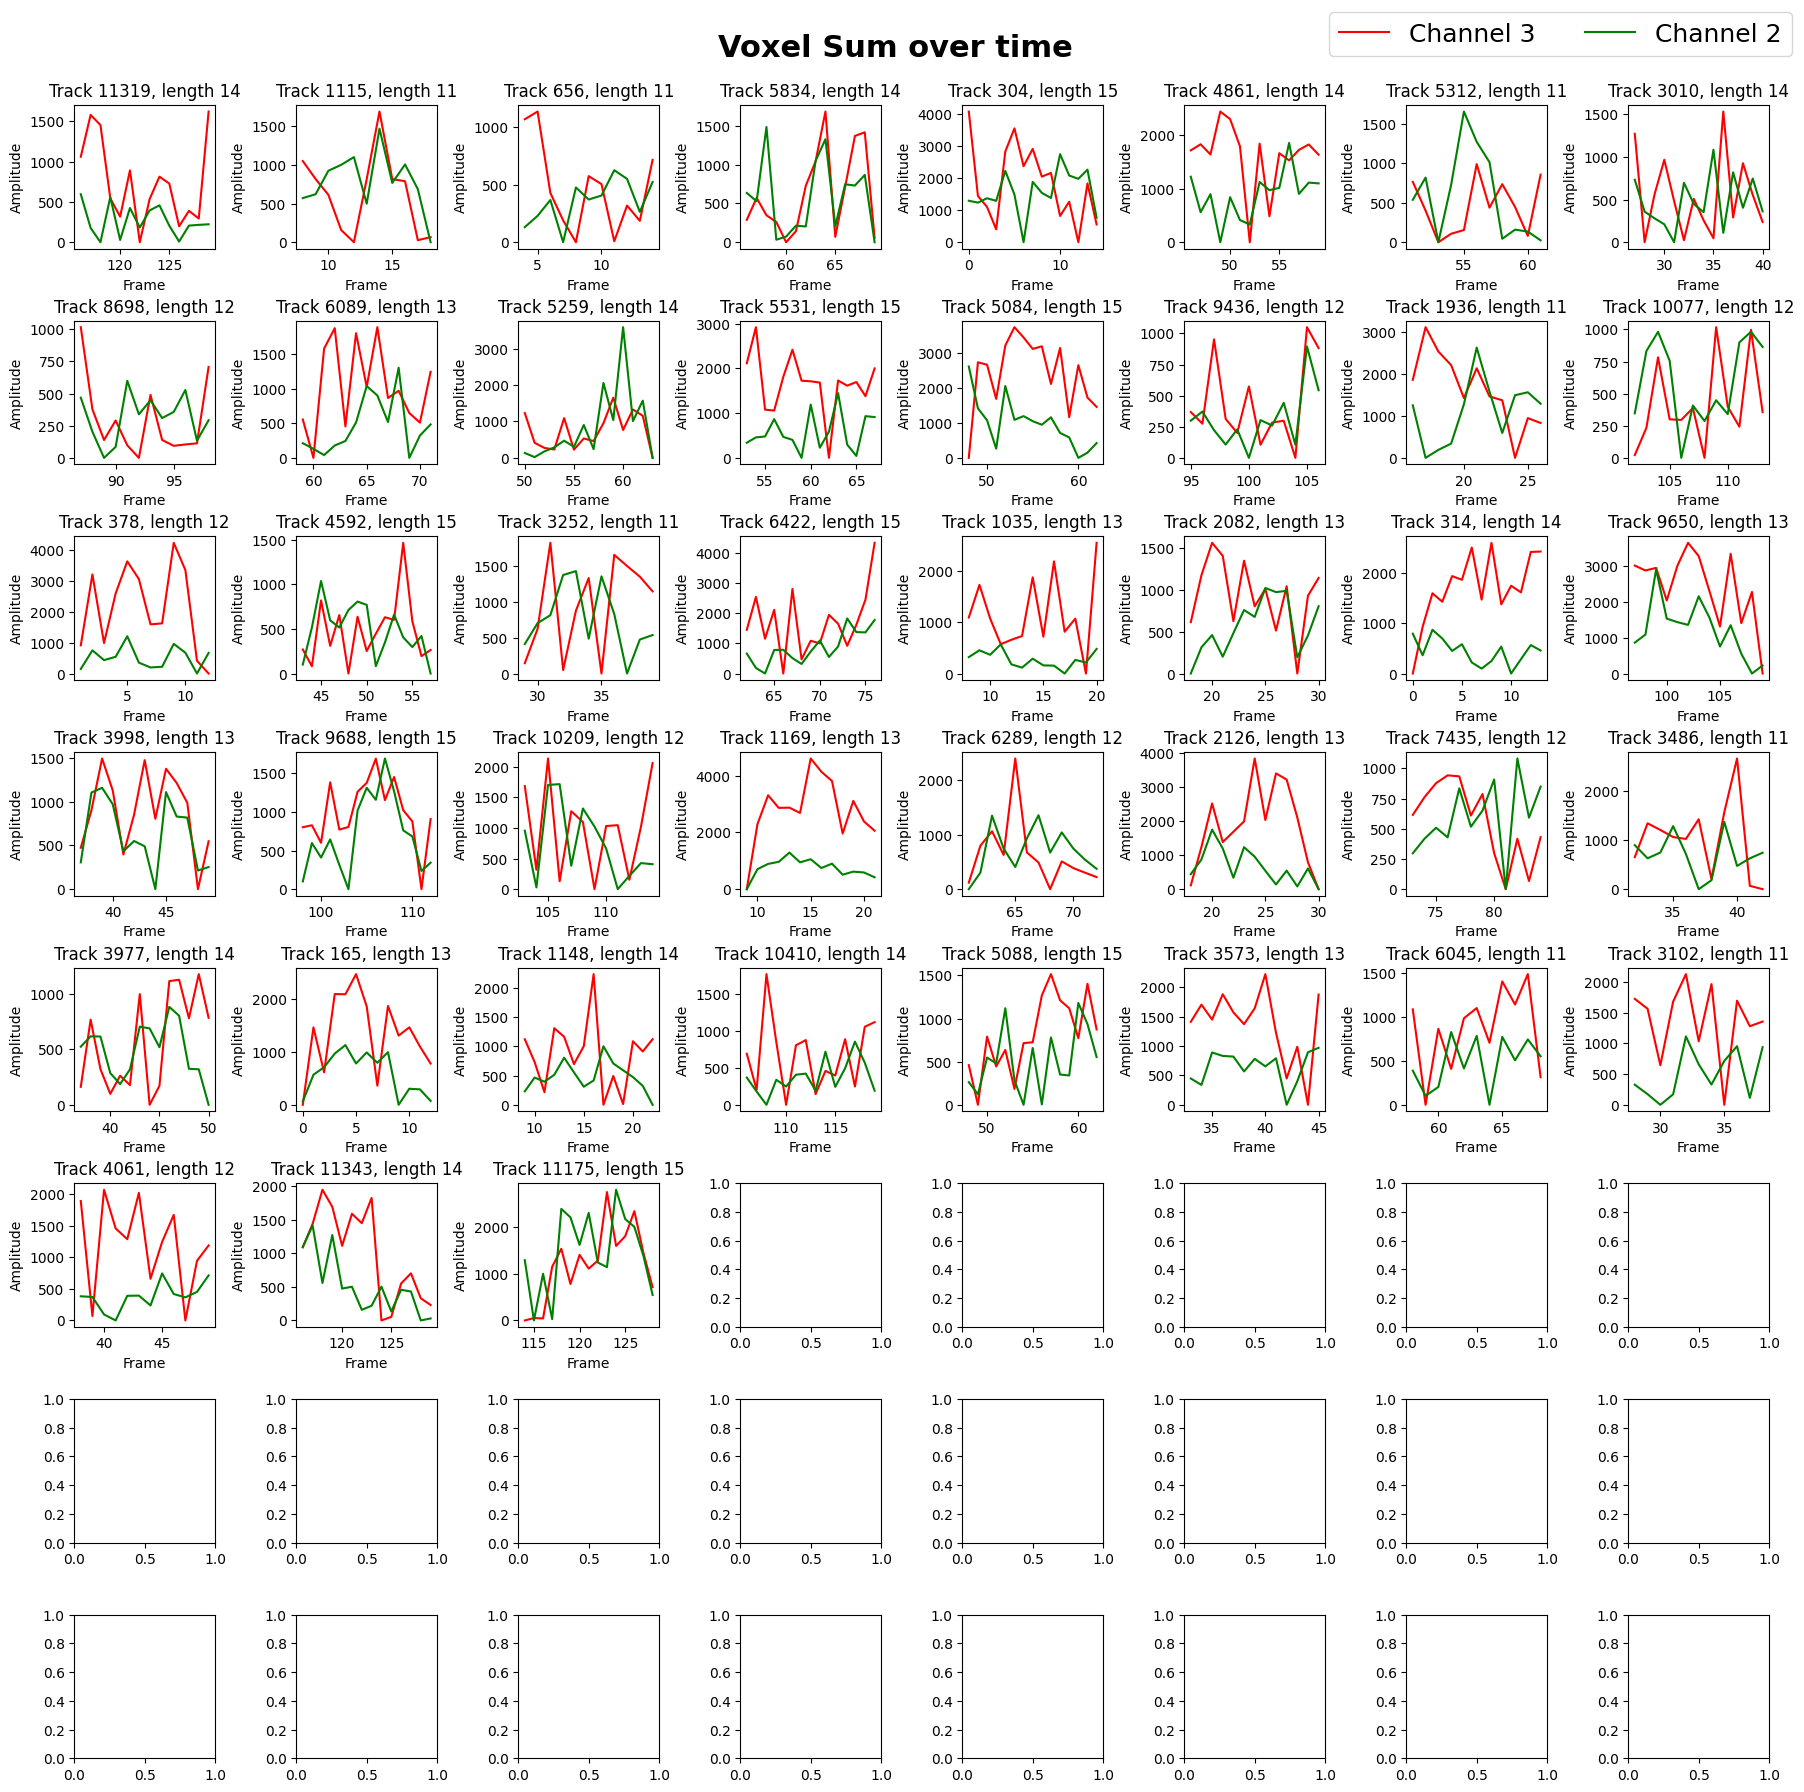

In [11]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_2, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 2'],
line_colors = ['red', 'green'], graph_title = 'Voxel Sum')

# Plotting 64 tracks between length 16 and 20 inclusive

In [12]:
random_tracks_3 = random_track_ids(dataframe = cat1_df, desired_length = [16,20], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

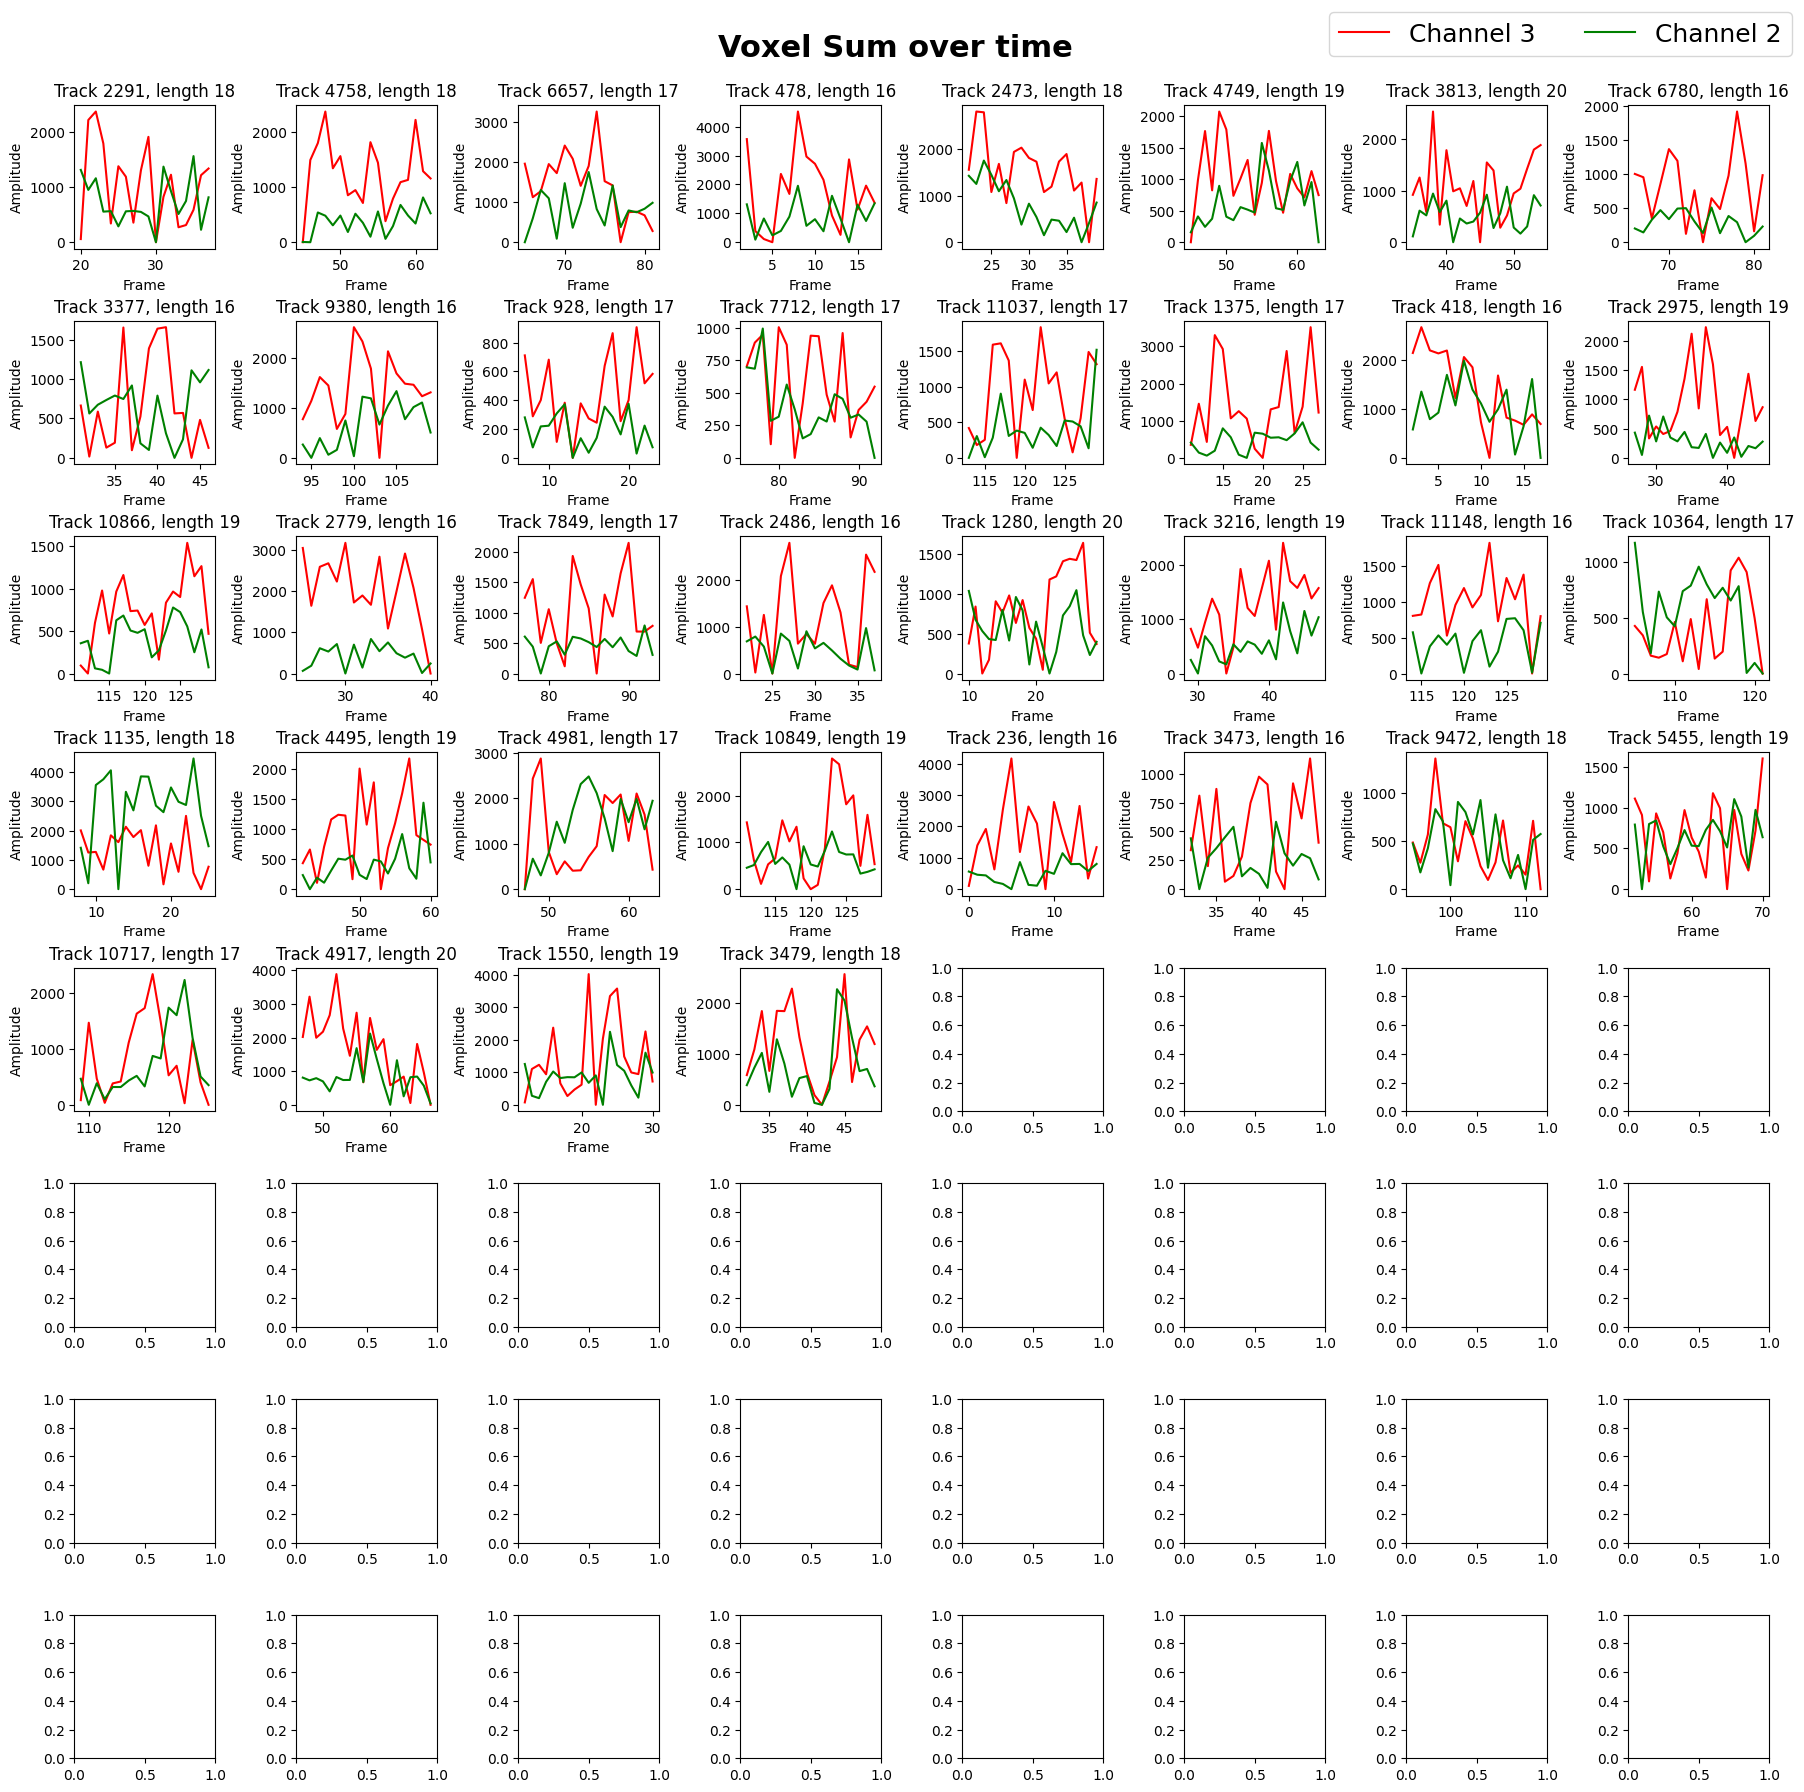

In [13]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_3, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 2'],
line_colors = ['red', 'green'], graph_title = 'Voxel Sum')

# The following function creates a buffer to align tracks by their peak value 

In [14]:
primary_buffer, secondary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [170,150], 
intensity_to_plot = ['c3_gaussian_amp','c2_peak_amp'], track_id_col_name = 'track_id')

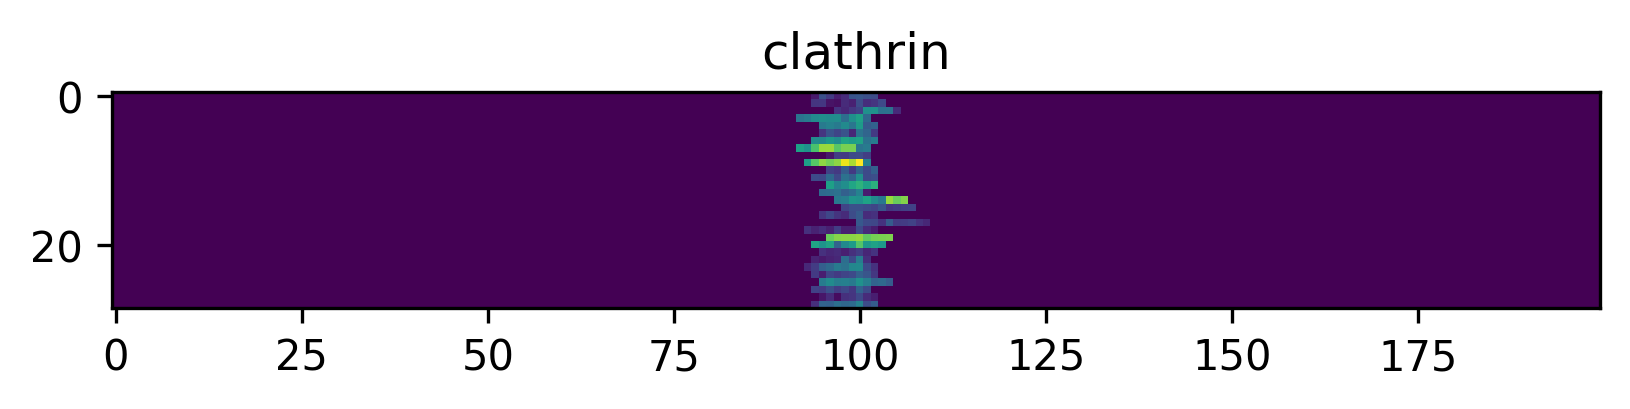

In [15]:
plt.figure(dpi=300)
plt.title('clathrin')
plt.imshow(primary_buffer)

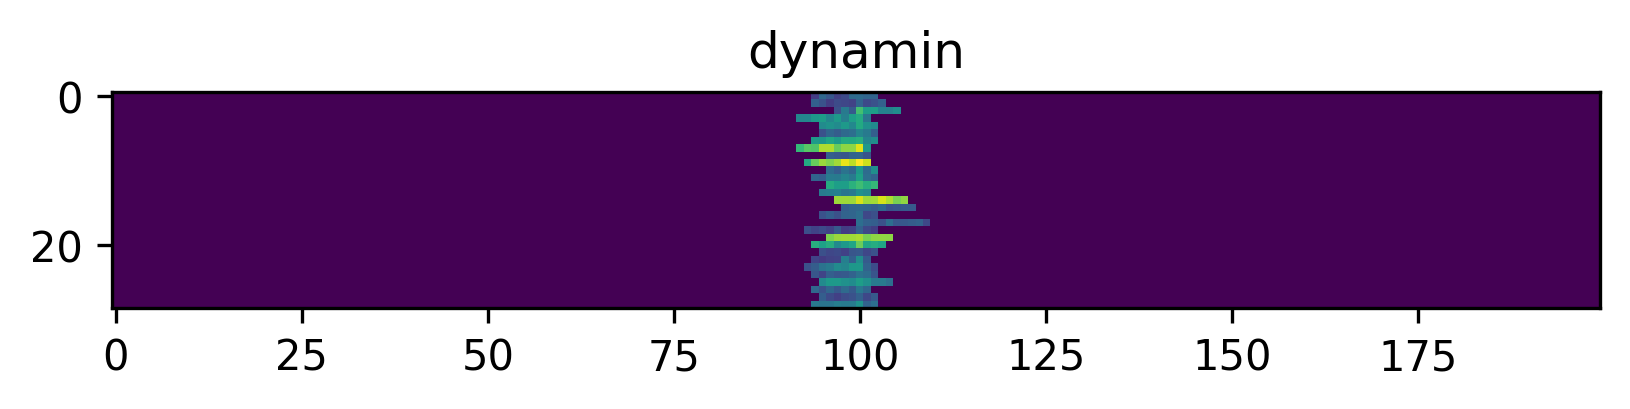

In [16]:
plt.figure(dpi=300)
plt.title('dynamin')
plt.imshow(secondary_buffer)

## Initial Cohort Plots for 2 Channels(Clathrin and Dynamin) only

**Length between 5 to 10 frames**

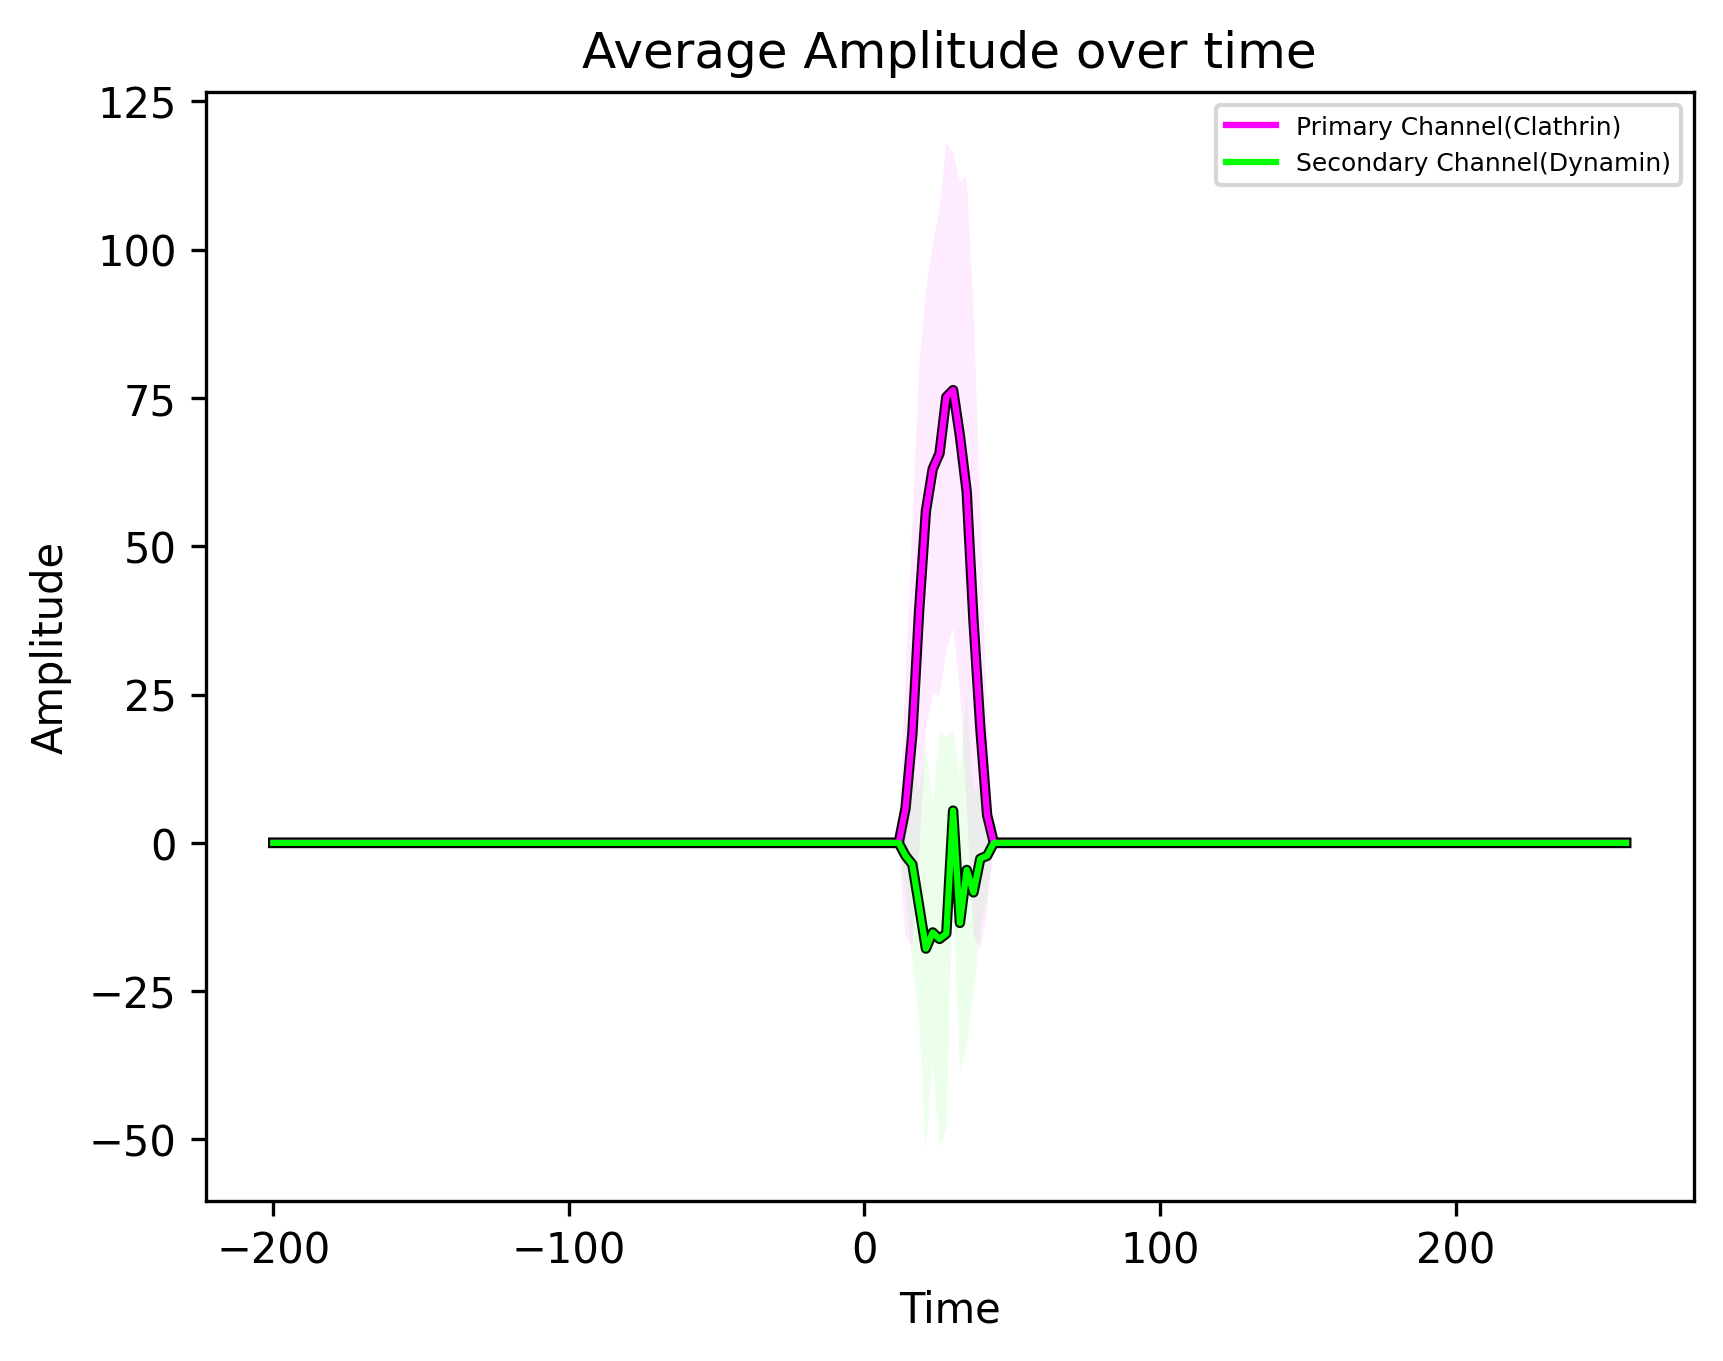

In [17]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

**Length between 11 to 15 frames**

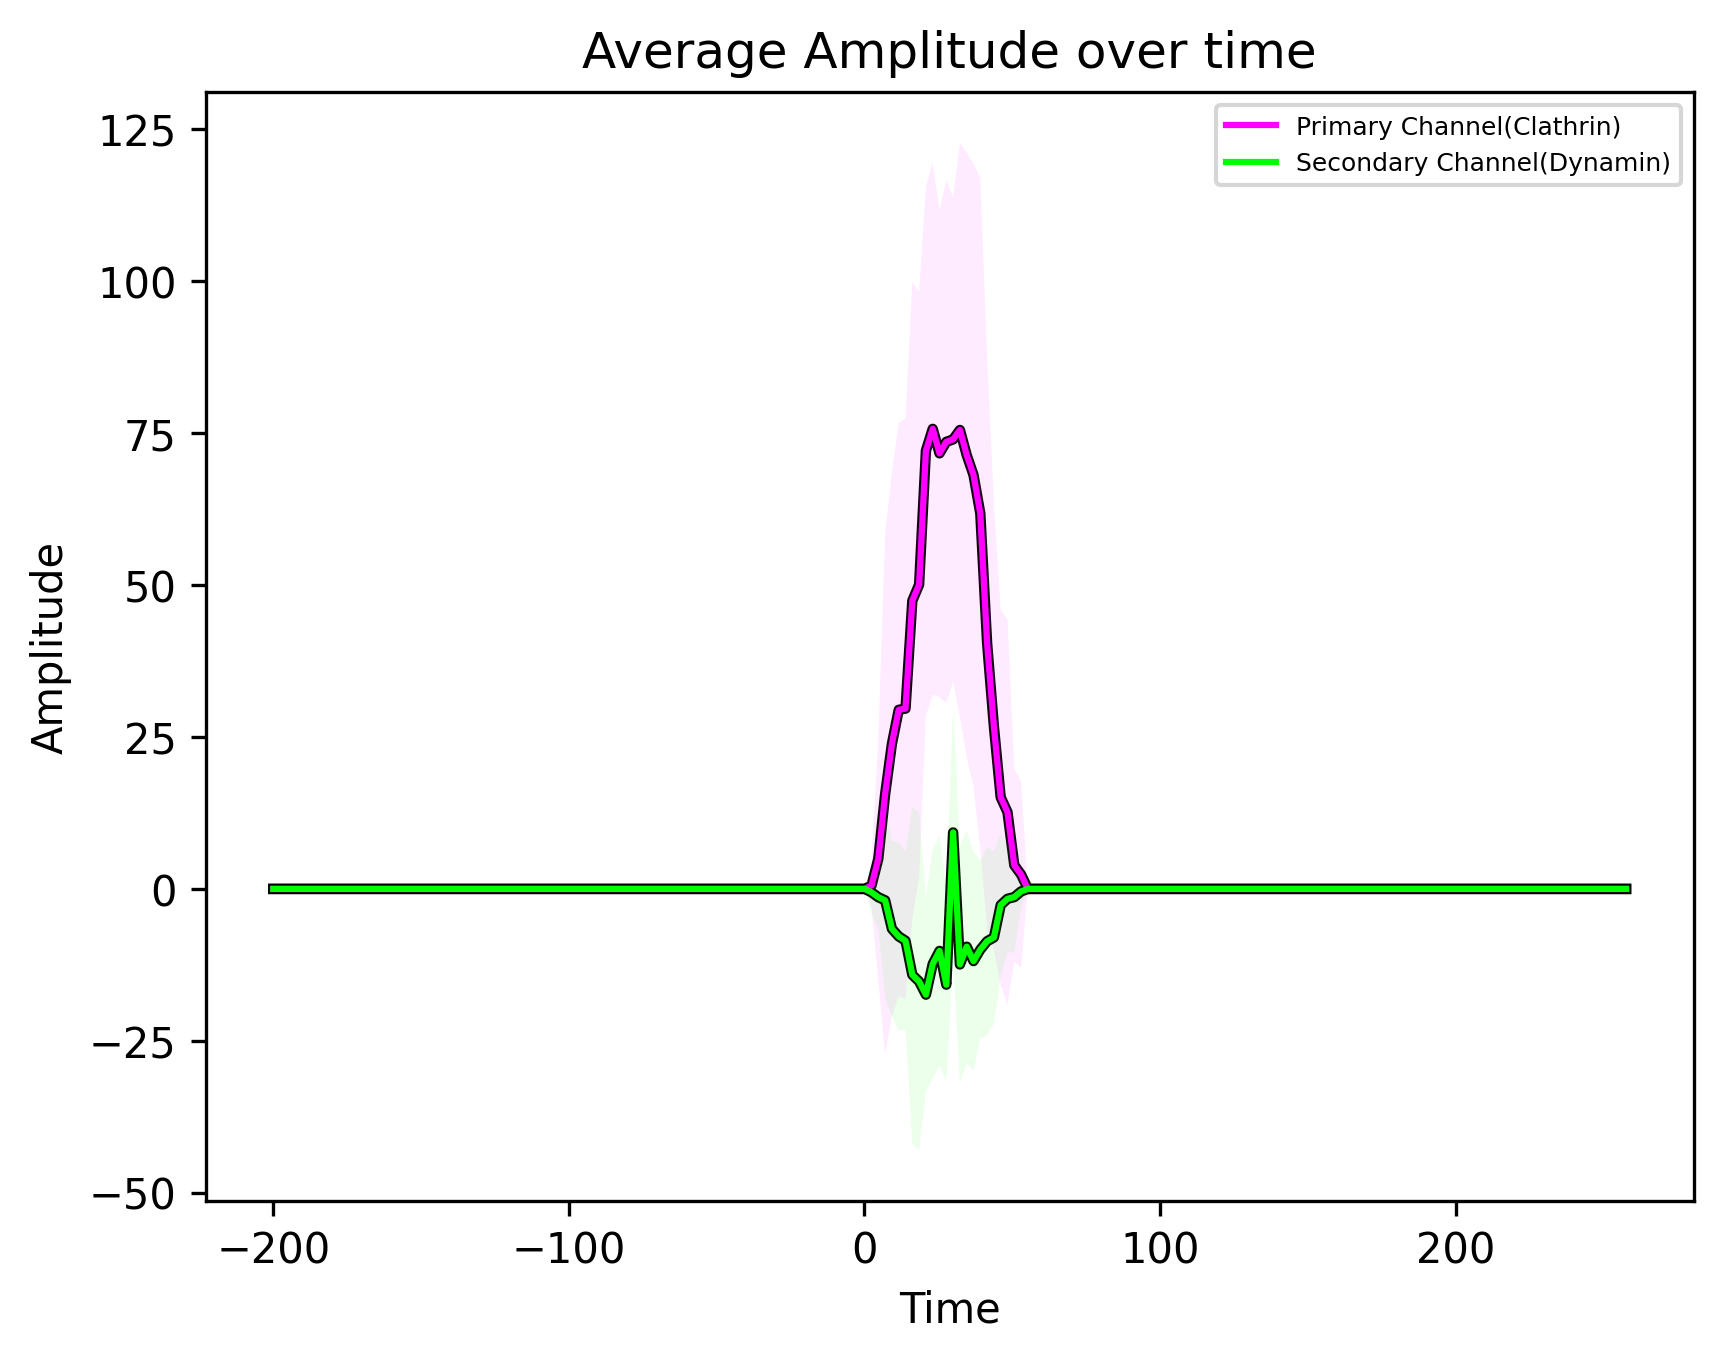

In [18]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[1], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

**Length between 16 to 20 frames**

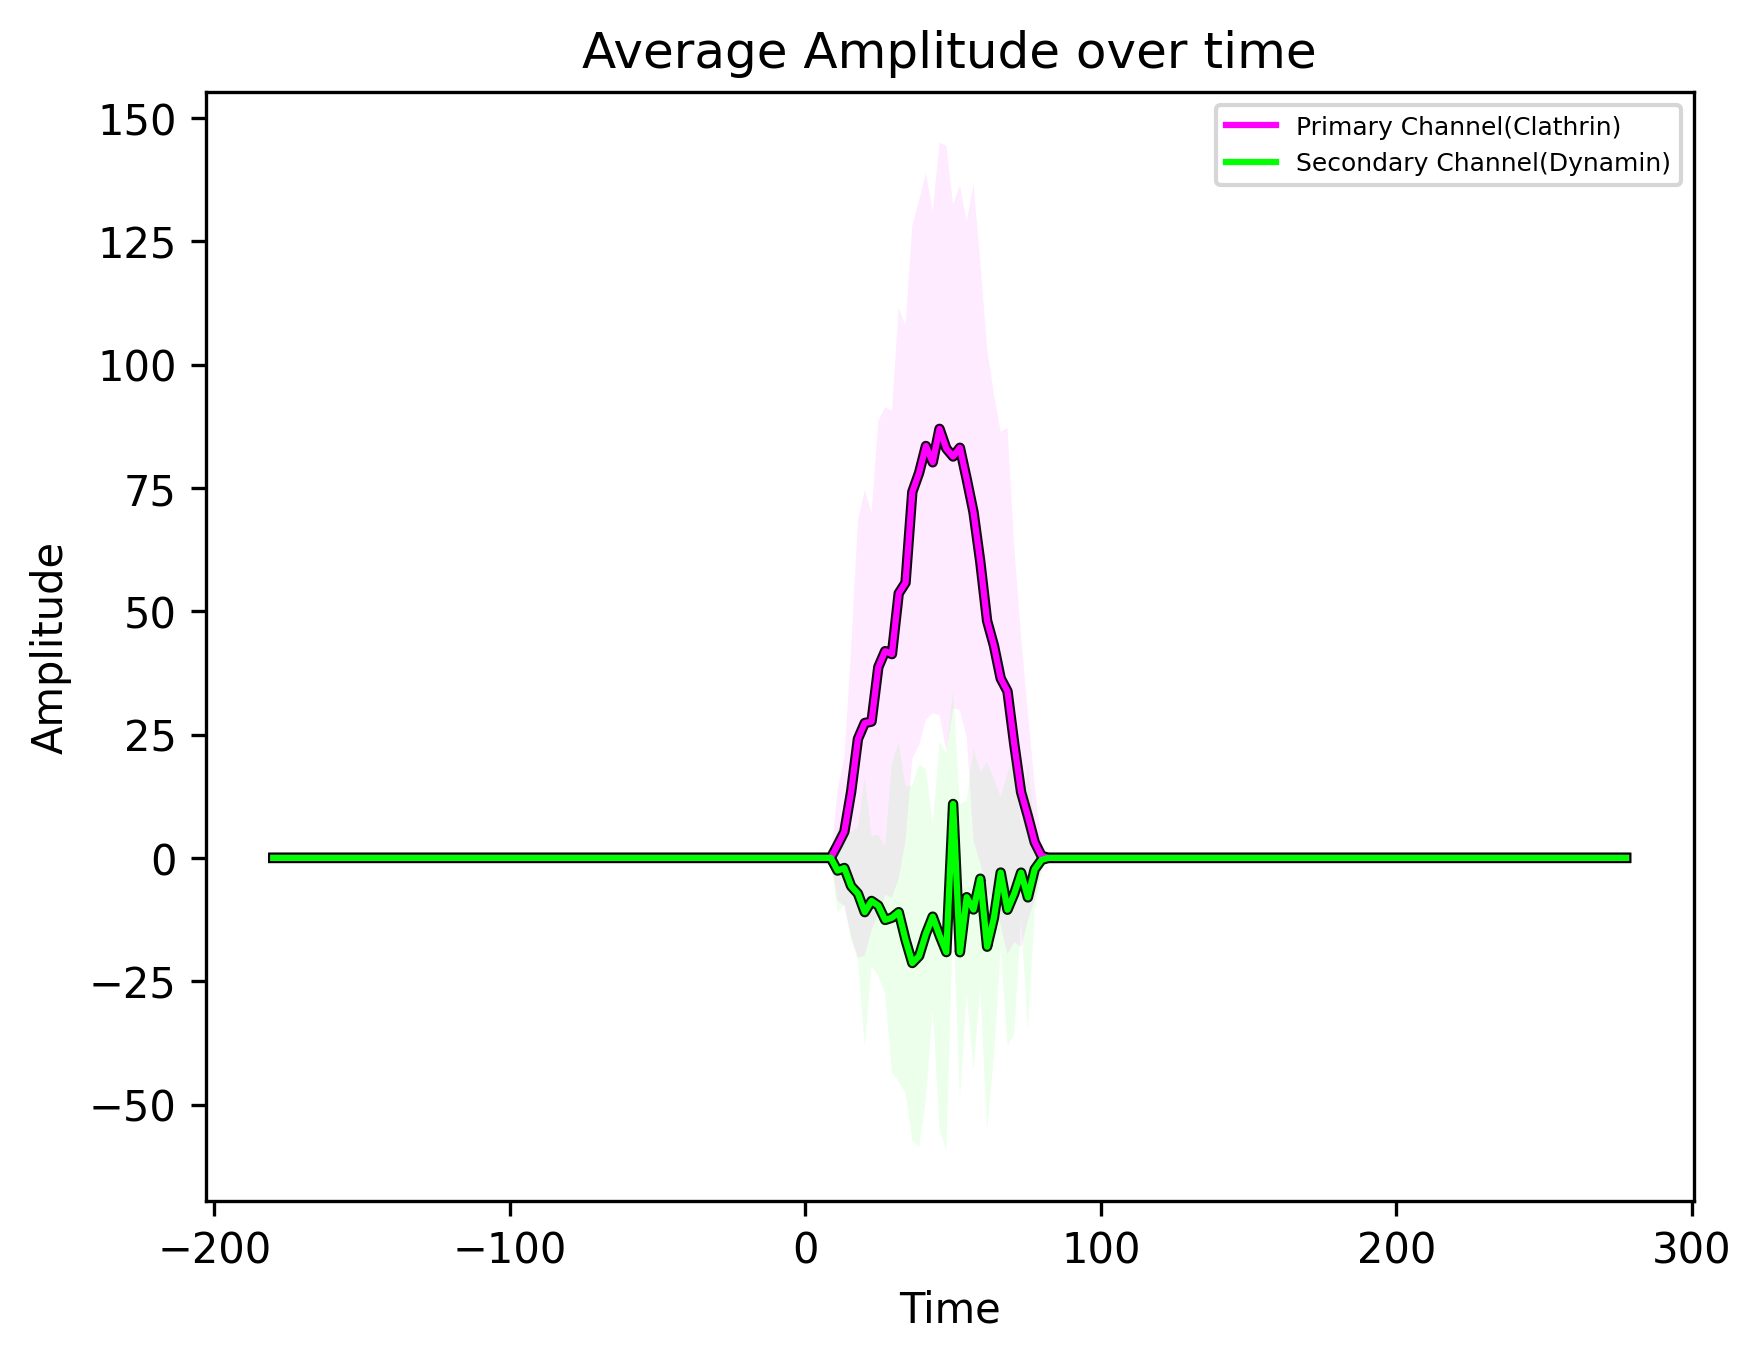

In [19]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 50, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

**Length between 21 to 25 frames**

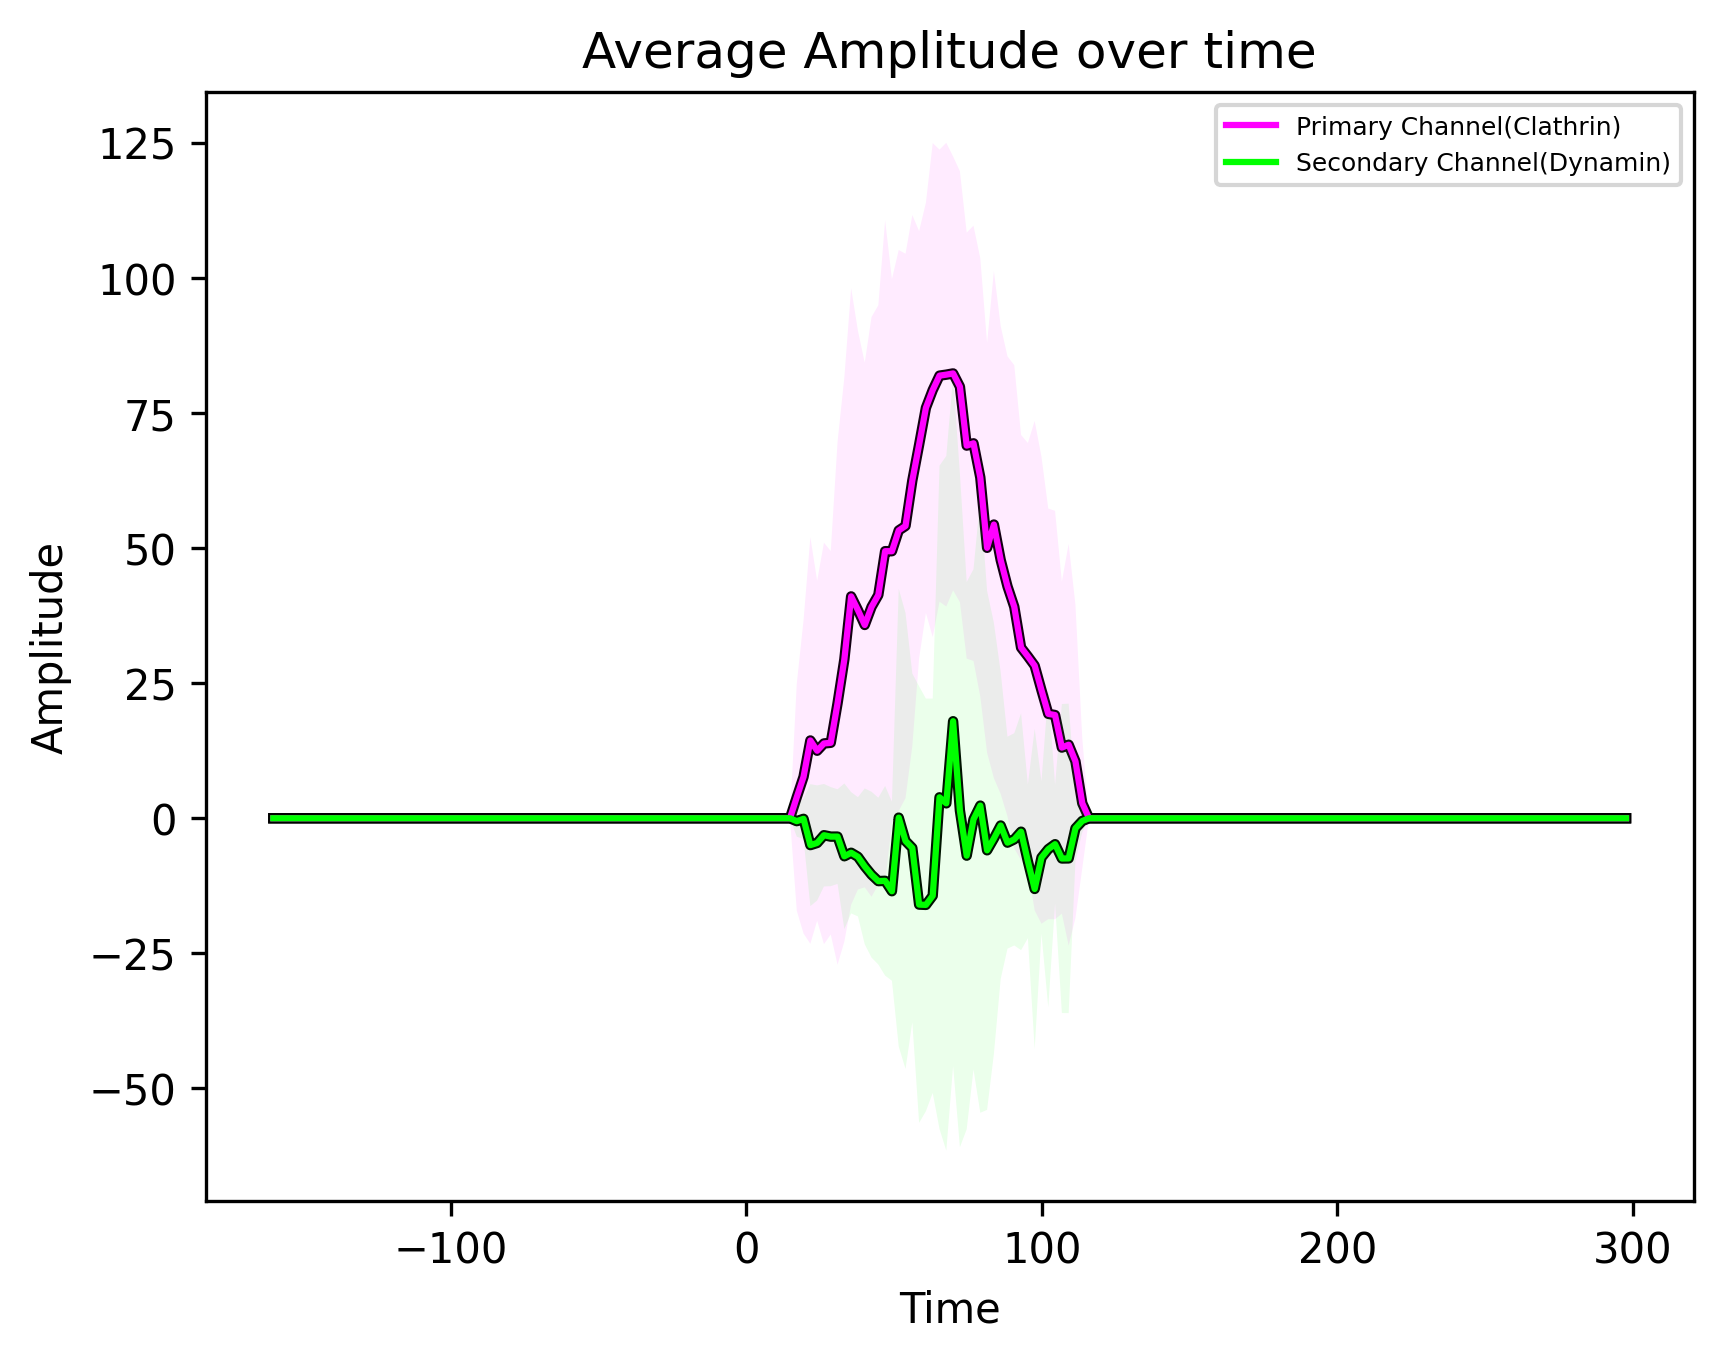

In [20]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[3], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 70, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

**Length between 26 to 30 frames**

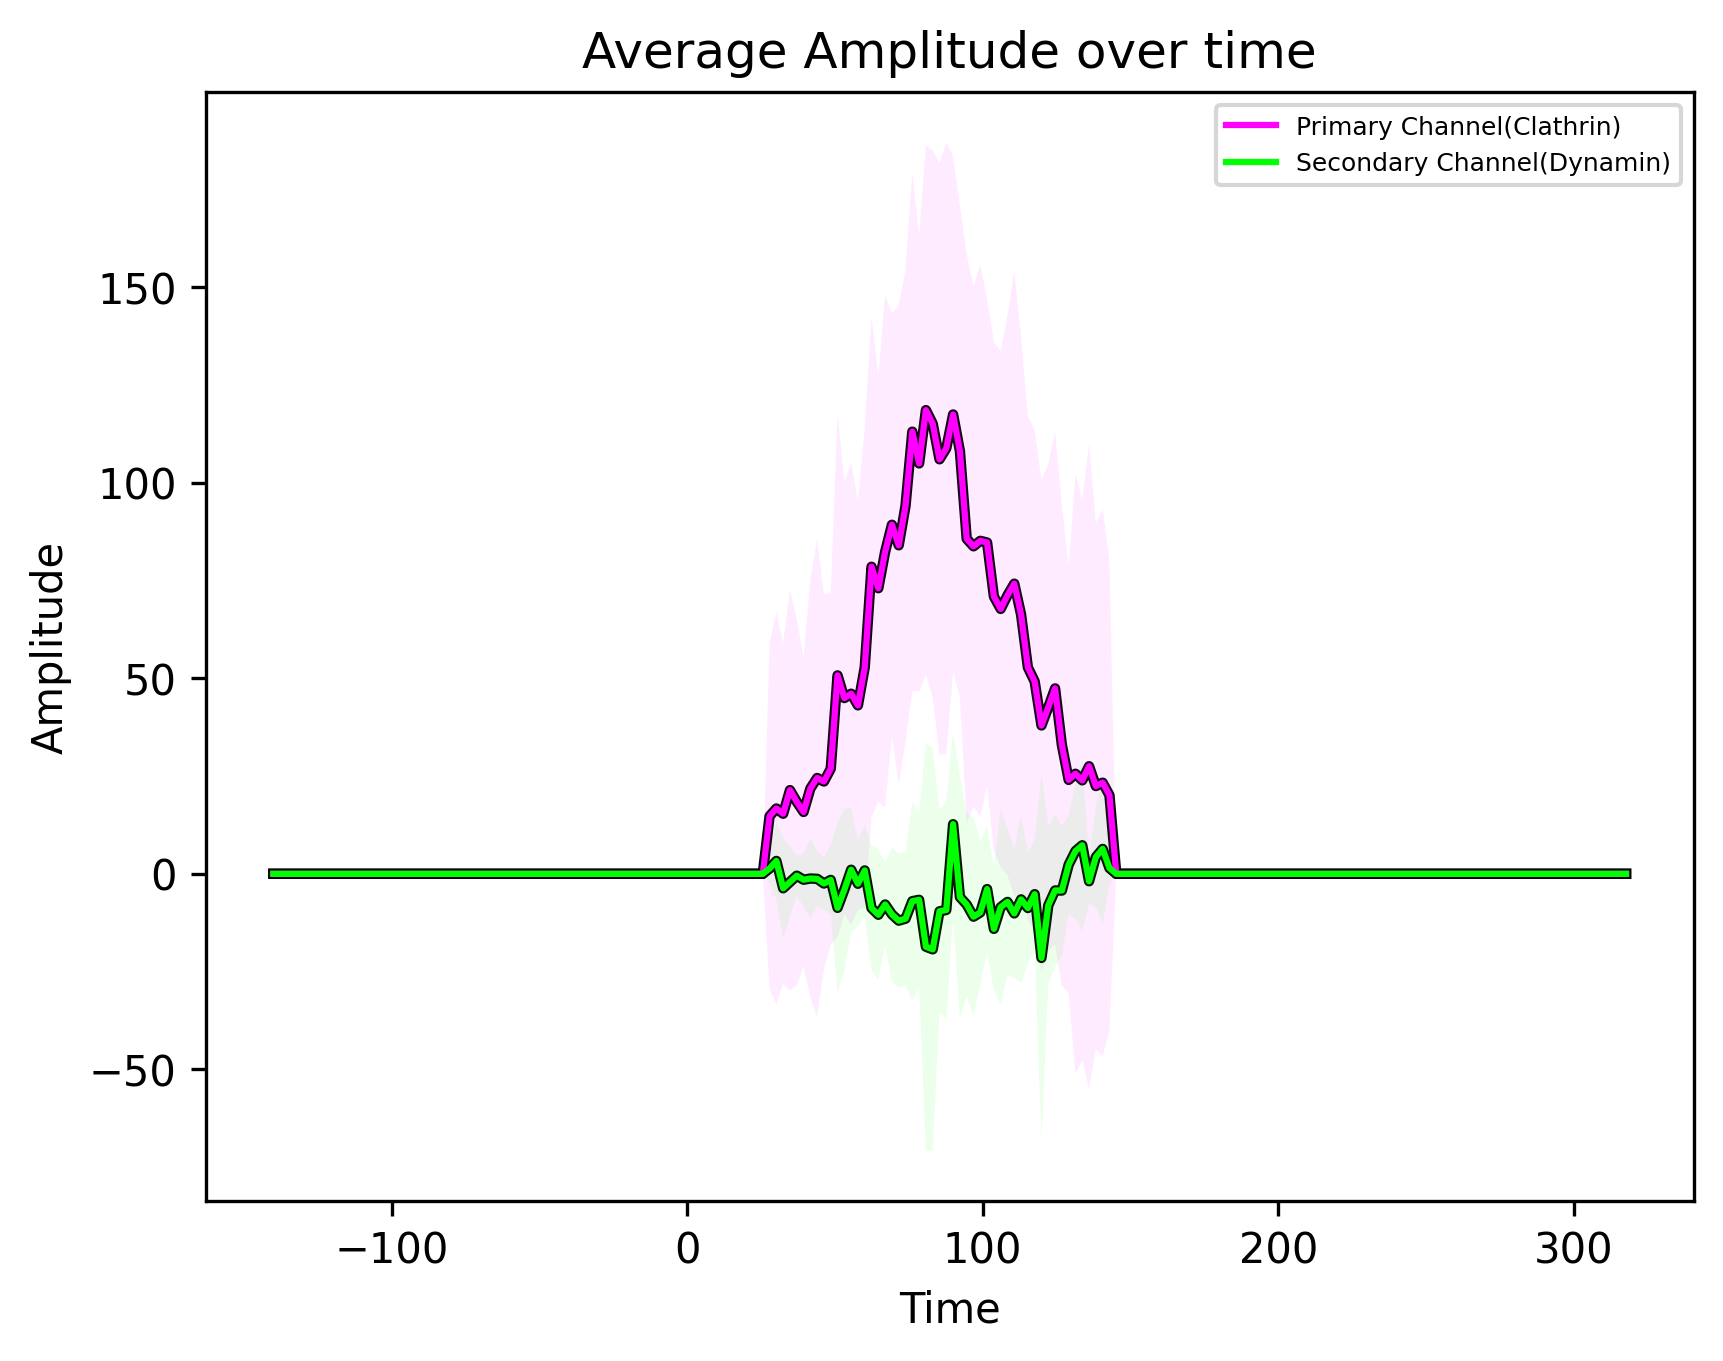

In [21]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[4], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 90, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

**Length between 31 to 40 frames**

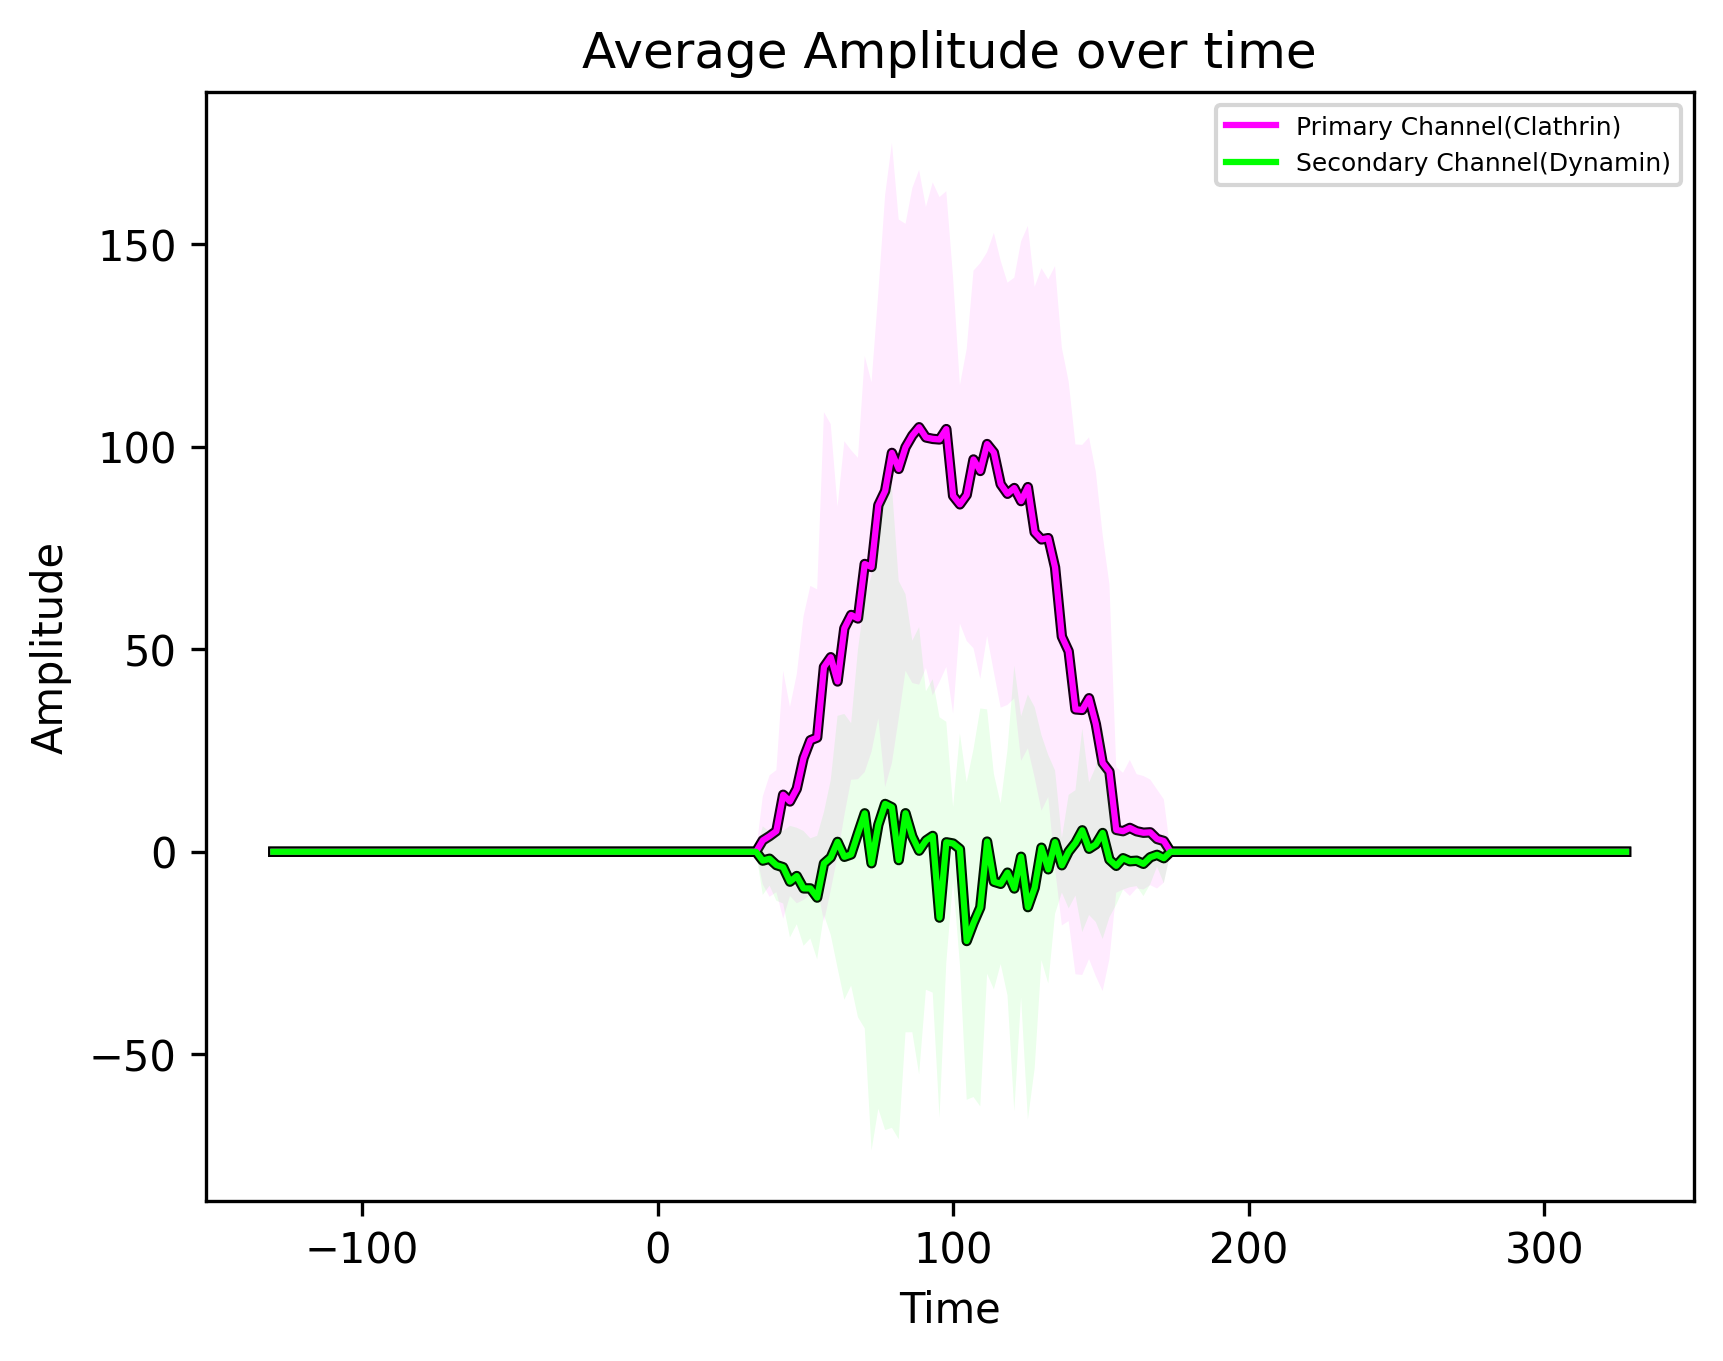

In [22]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[5], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2], time_shift = 100, framerate_msec = 2.3*1000, colors = ['magenta', 'lime'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)'])

# Category 2 
## Actin and Clathrin Positive

In [23]:
cat2_df = filtered_tracks[filtered_tracks['channel1_positive'] == True]
cat2_df.shape

(247, 24)

In [24]:
custom_length_ranges = [[5, 10], [11,15], [16, 20], [21, 25], [26, 30], [31, 40], [41,90]]
track_id_arrays = filter_track_ids_by_length_ranges(dataframe = cat2_df, track_length_buckets = custom_length_ranges, 
                                 track_id_col_name = 'track_id', track_length_col_name = 'track_length')

In [25]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,20] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [21,25] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [26,30] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [31,40] inclusive are {len(track_id_arrays[5])}')
print(f'number of tracks between [41,90] inclusive are {len(track_id_arrays[6])}')

number of tracks between [5,10] inclusive are 62
number of tracks between [11,15] inclusive are 68
number of tracks between [16,20] inclusive are 48
number of tracks between [21,25] inclusive are 32
number of tracks between [26,30] inclusive are 7
number of tracks between [31,40] inclusive are 20
number of tracks between [41,90] inclusive are 9


### The following function selects random track ids of a desired length 

In [26]:
random_tracks = random_track_ids(dataframe = cat2_df, desired_length = [5,10], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

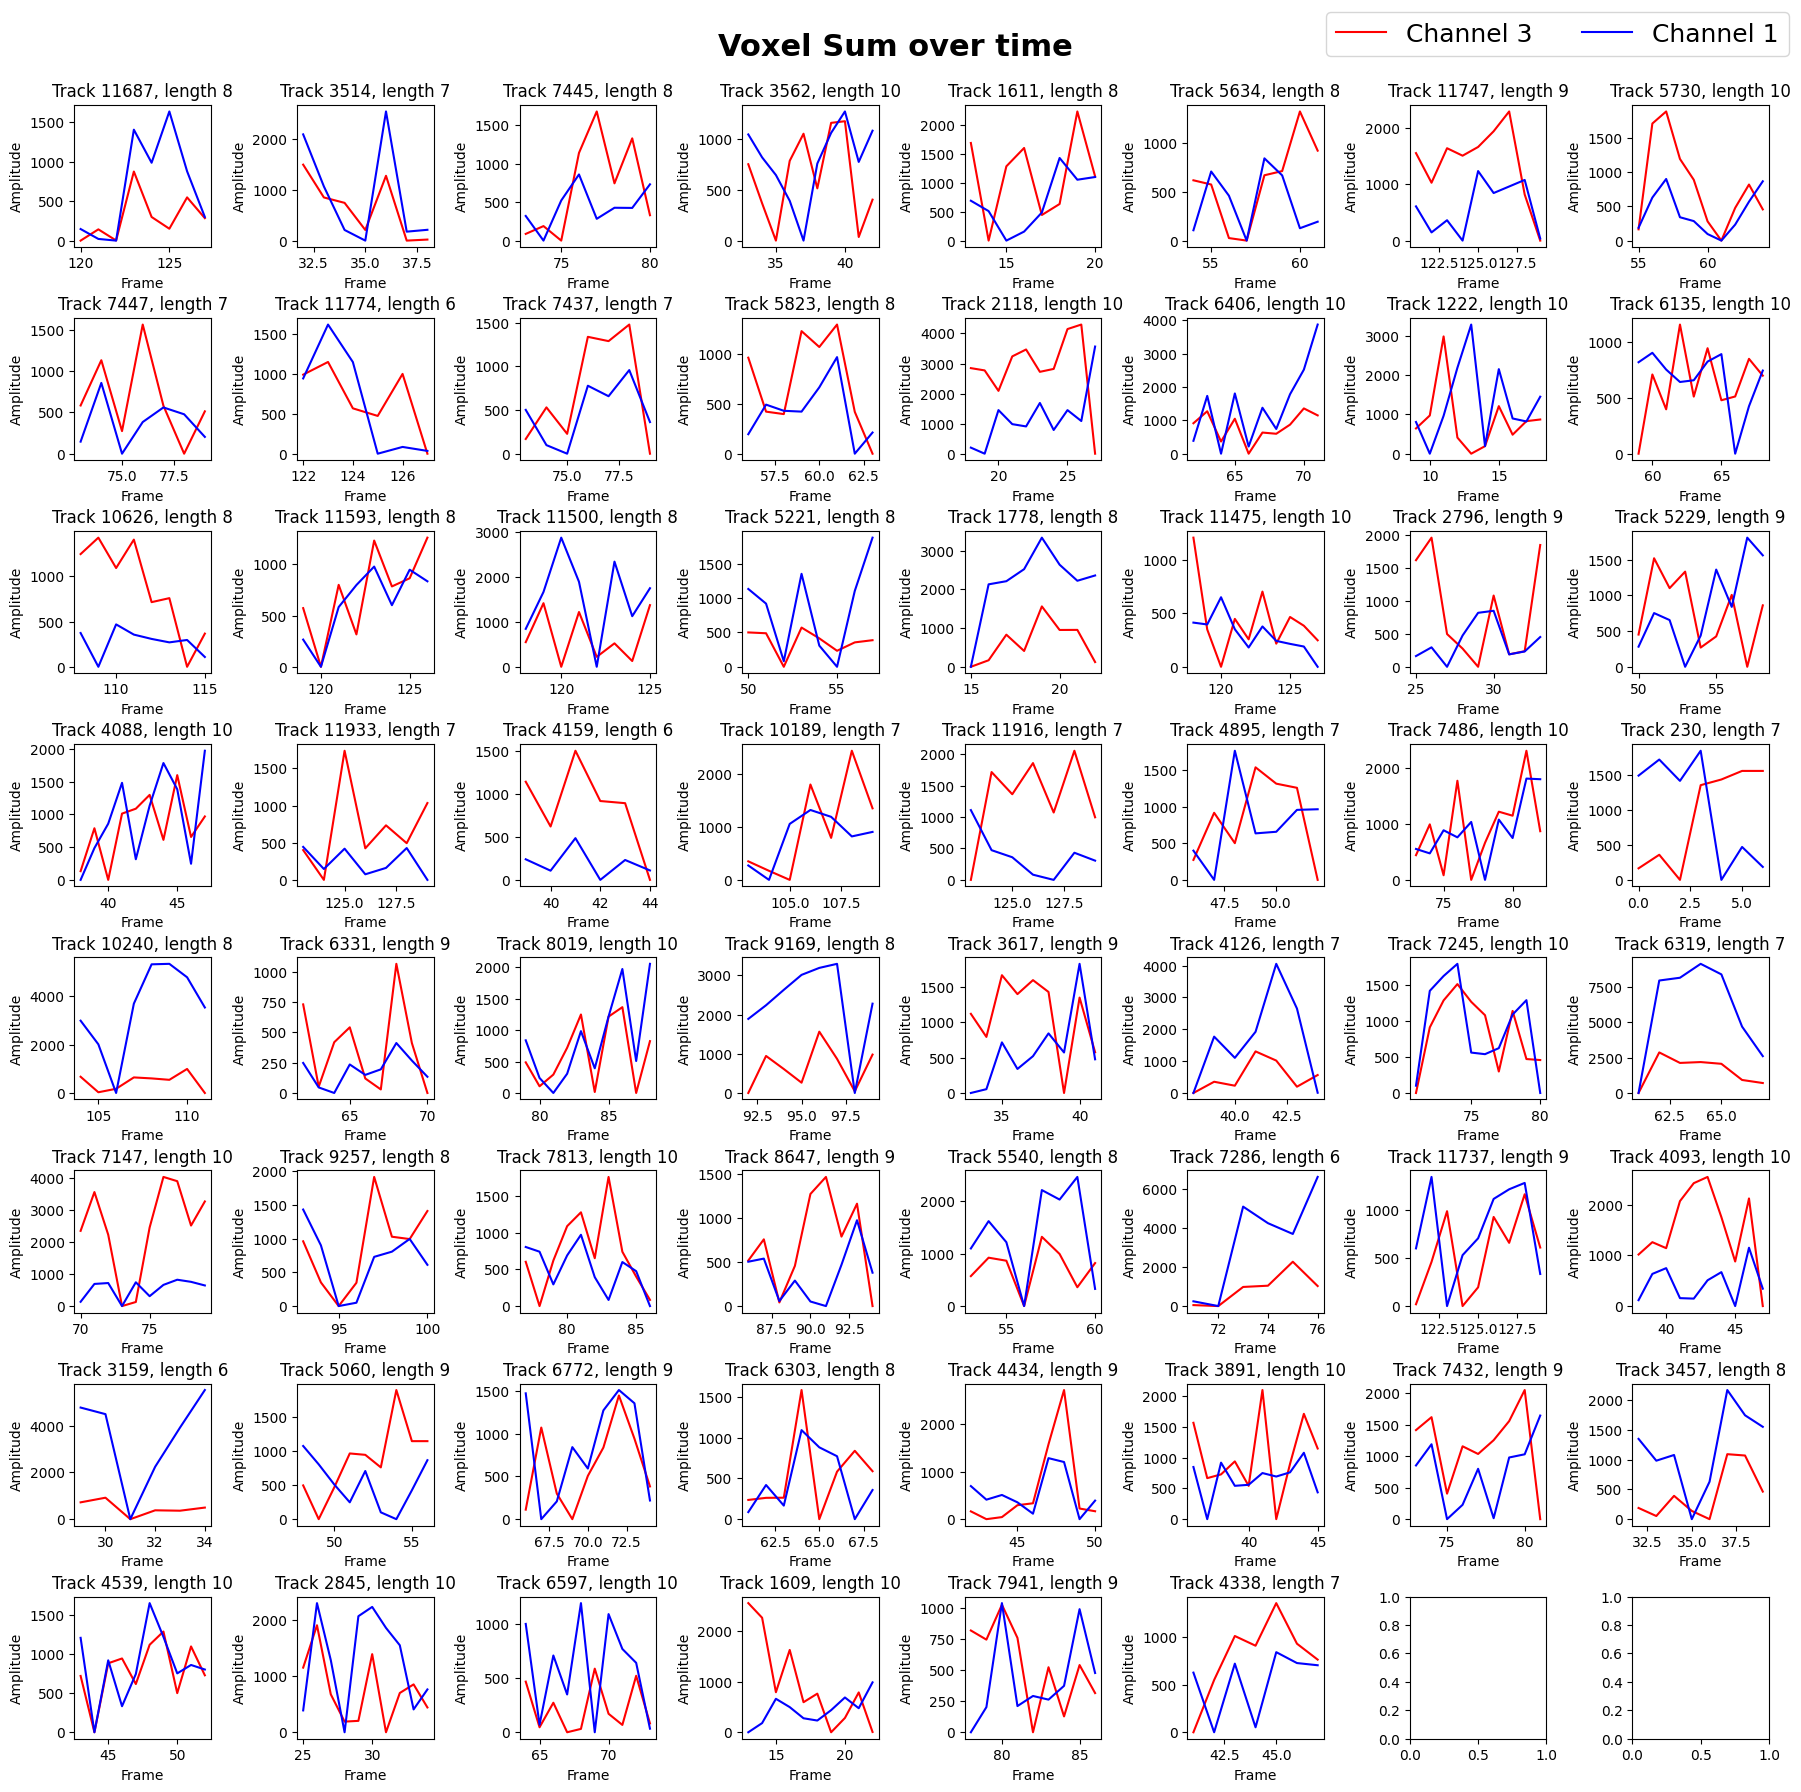

In [27]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 1'],
line_colors = ['red', 'blue'], graph_title = 'Voxel Sum')

In [28]:
random_tracks_2 = random_track_ids(dataframe = cat2_df, desired_length = [11,15], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

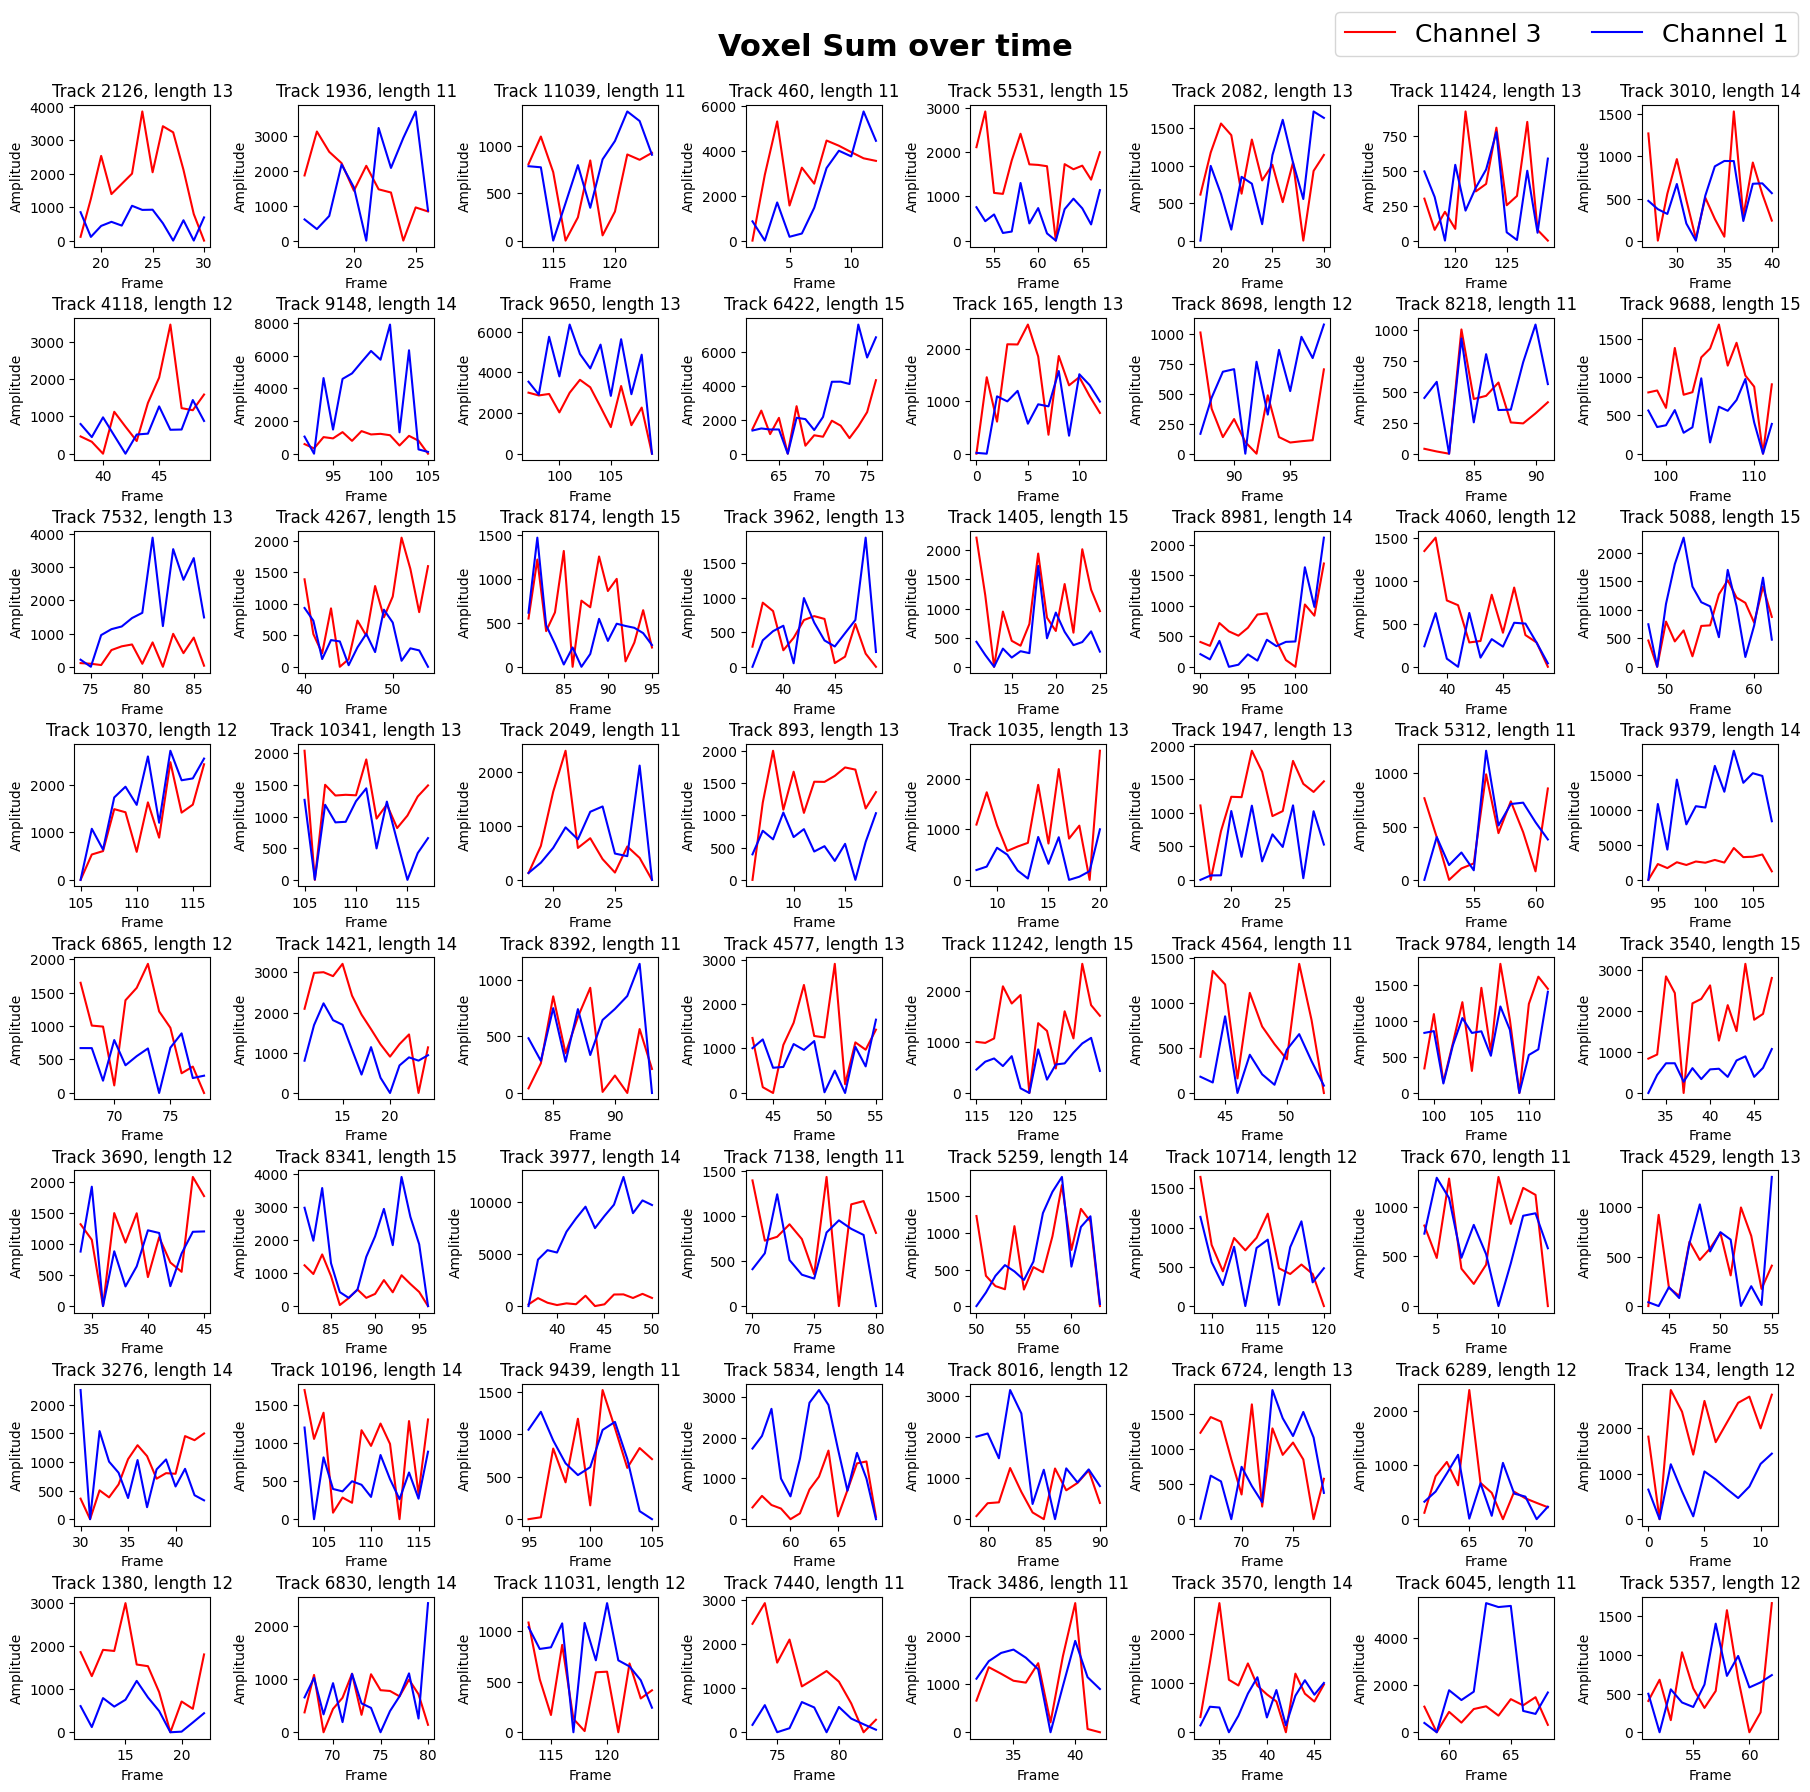

In [29]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_2, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 1'],
line_colors = ['red', 'blue'], graph_title = 'Voxel Sum')

In [30]:
random_tracks_3 = random_track_ids(dataframe = cat2_df, desired_length = [16,20], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

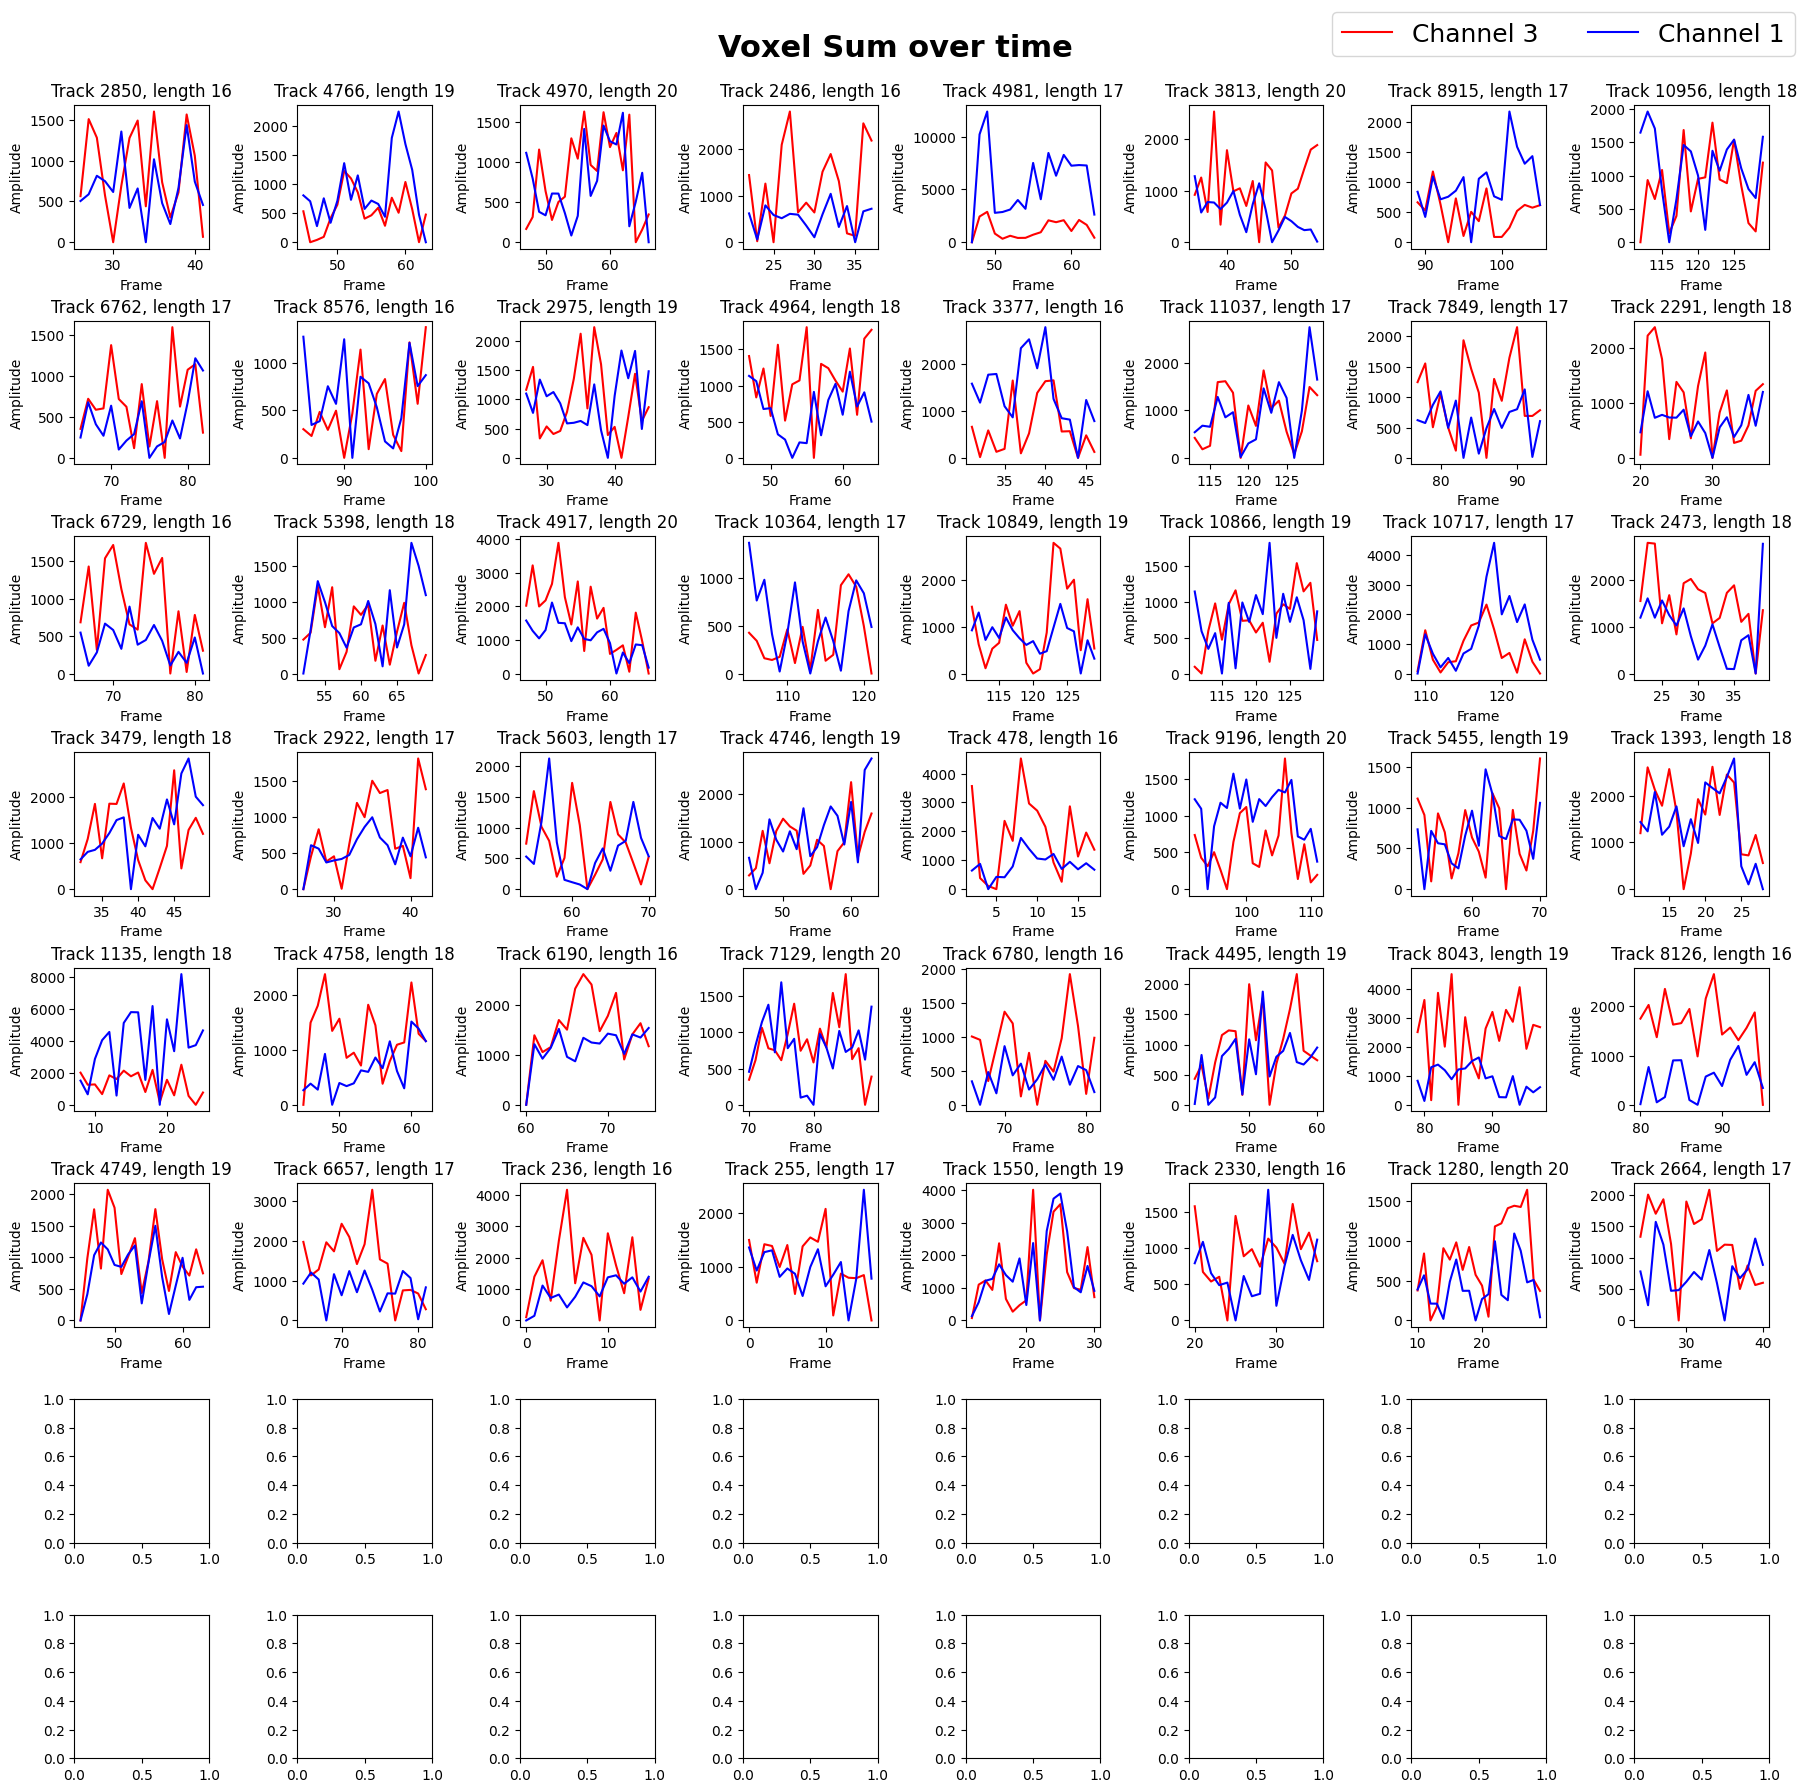

In [31]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_3, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 2, legend_values = ['Channel 3', 'Channel 1'],
line_colors = ['red', 'blue'], graph_title = 'Voxel Sum')

# The following function creates a buffer to align tracks by their peak value 

In [32]:
primary_buffer, secondary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

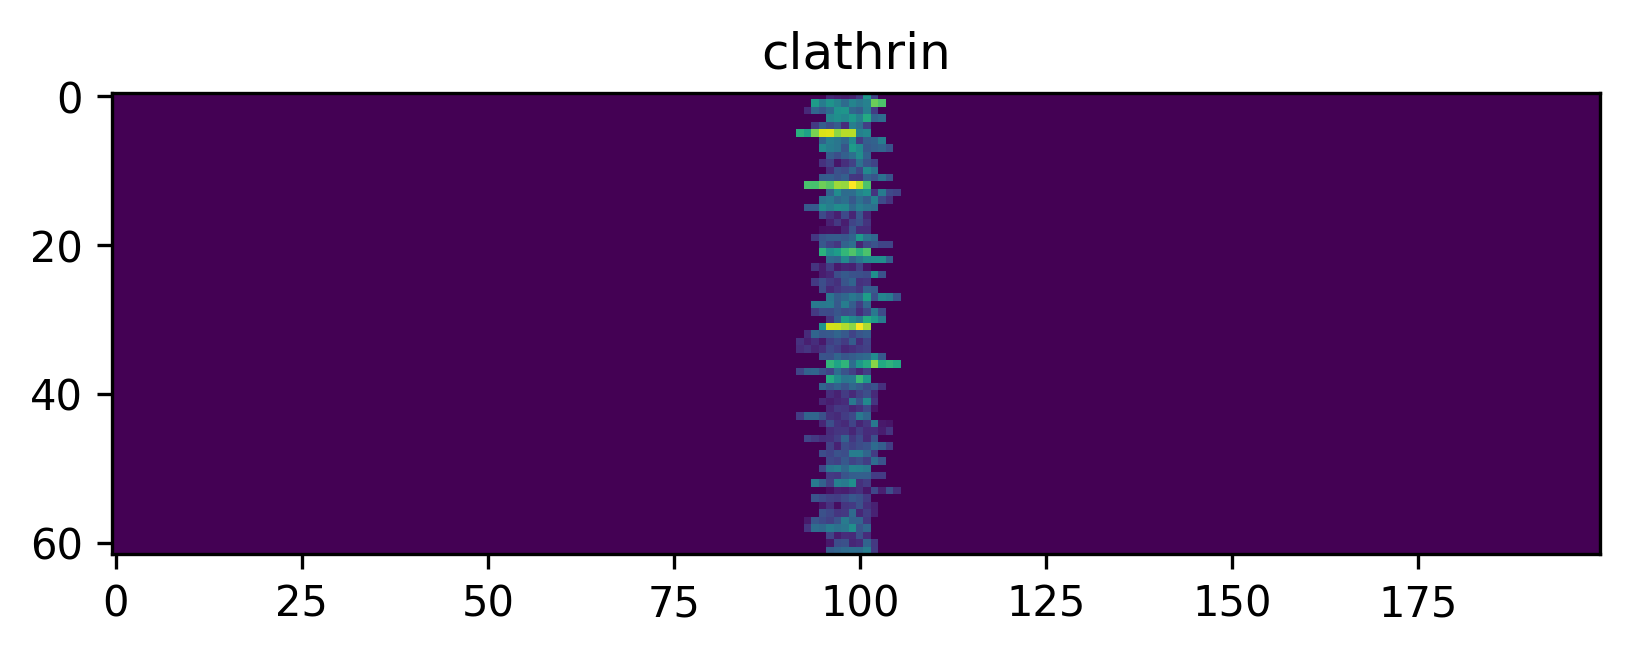

In [33]:
plt.figure(dpi=300)
plt.title('clathrin')
plt.imshow(primary_buffer)

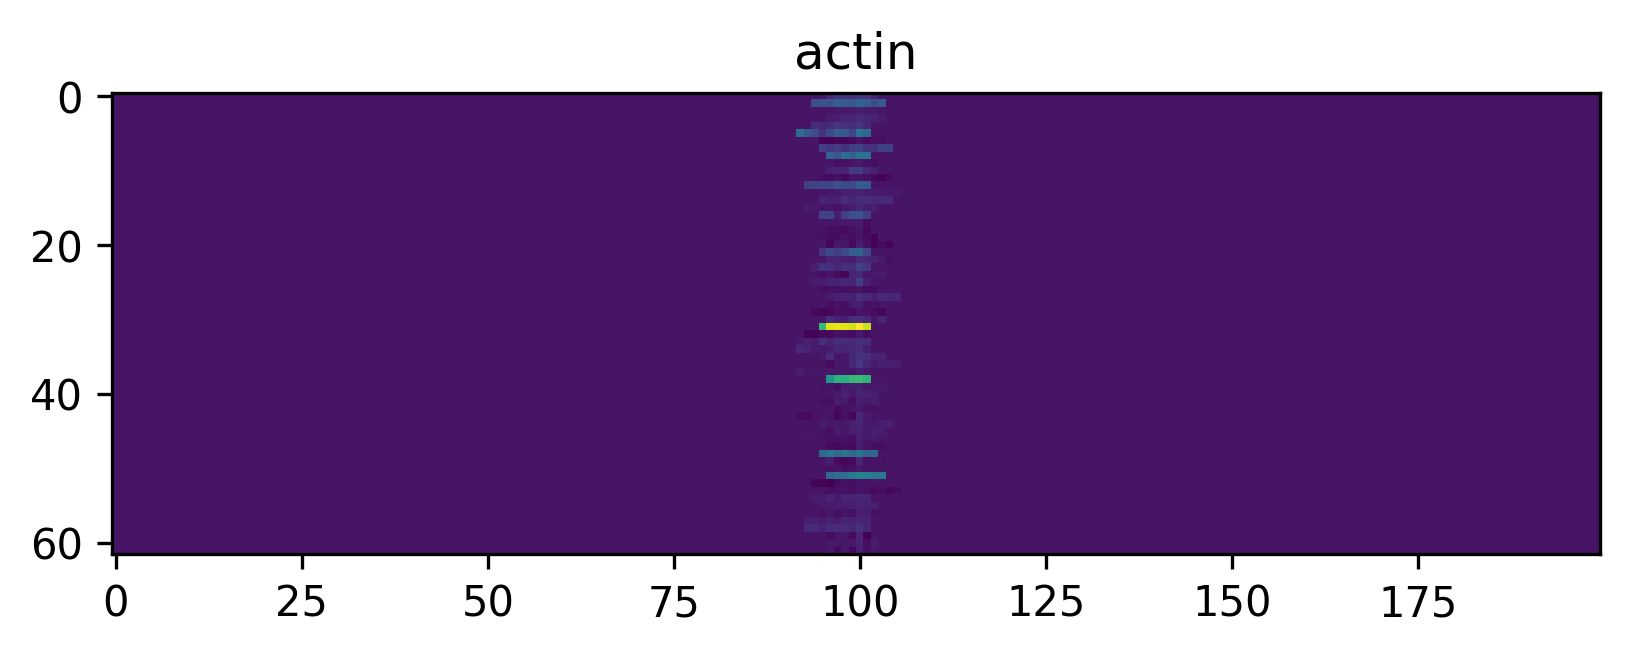

In [34]:
plt.figure(dpi=300)
plt.title('actin')
plt.imshow(secondary_buffer)

## Initial Cohort Plots for 2 Channels(Clathrin and Actin) only

**Length between 5 to 10 frames**

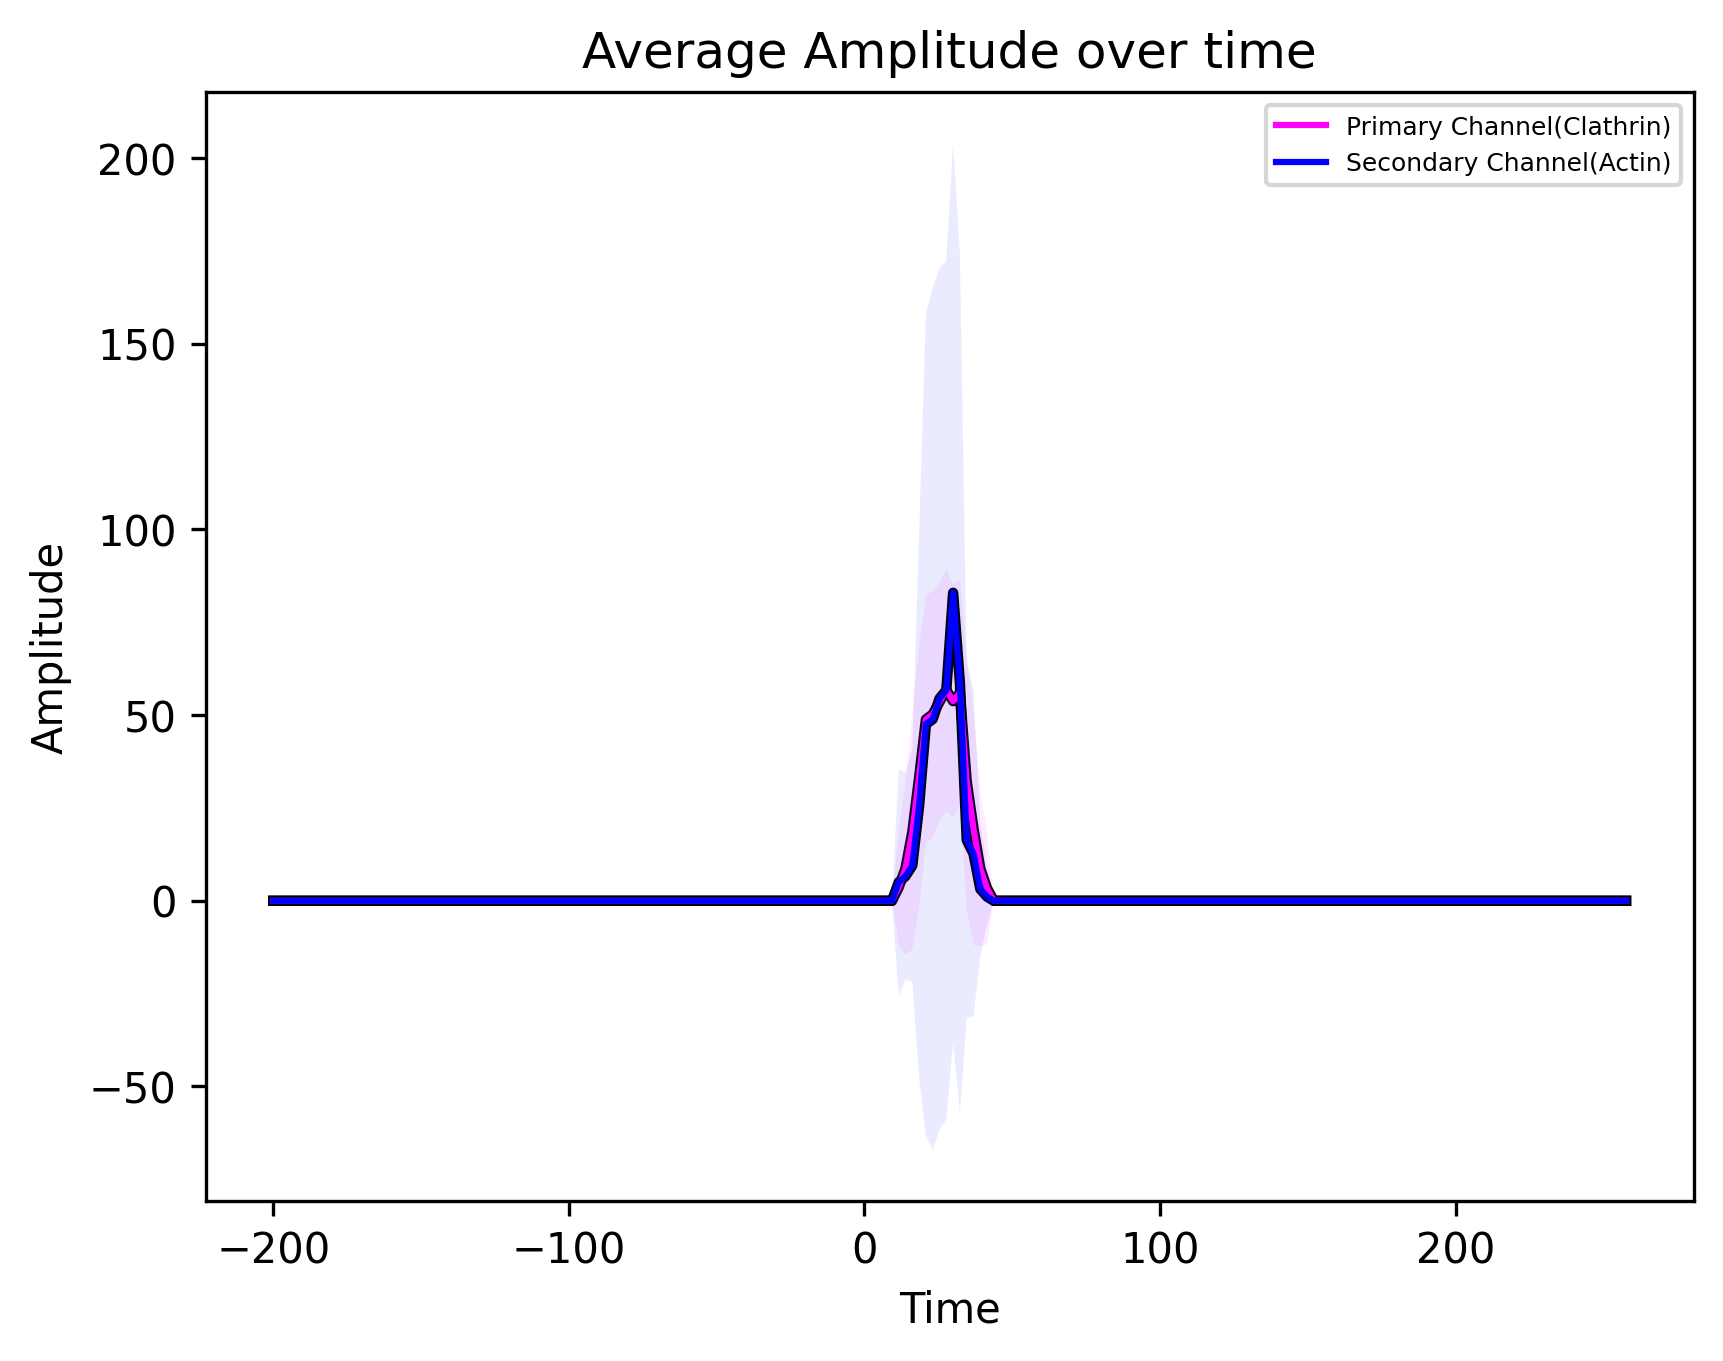

In [35]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

**Length between 11 to 15 frames**

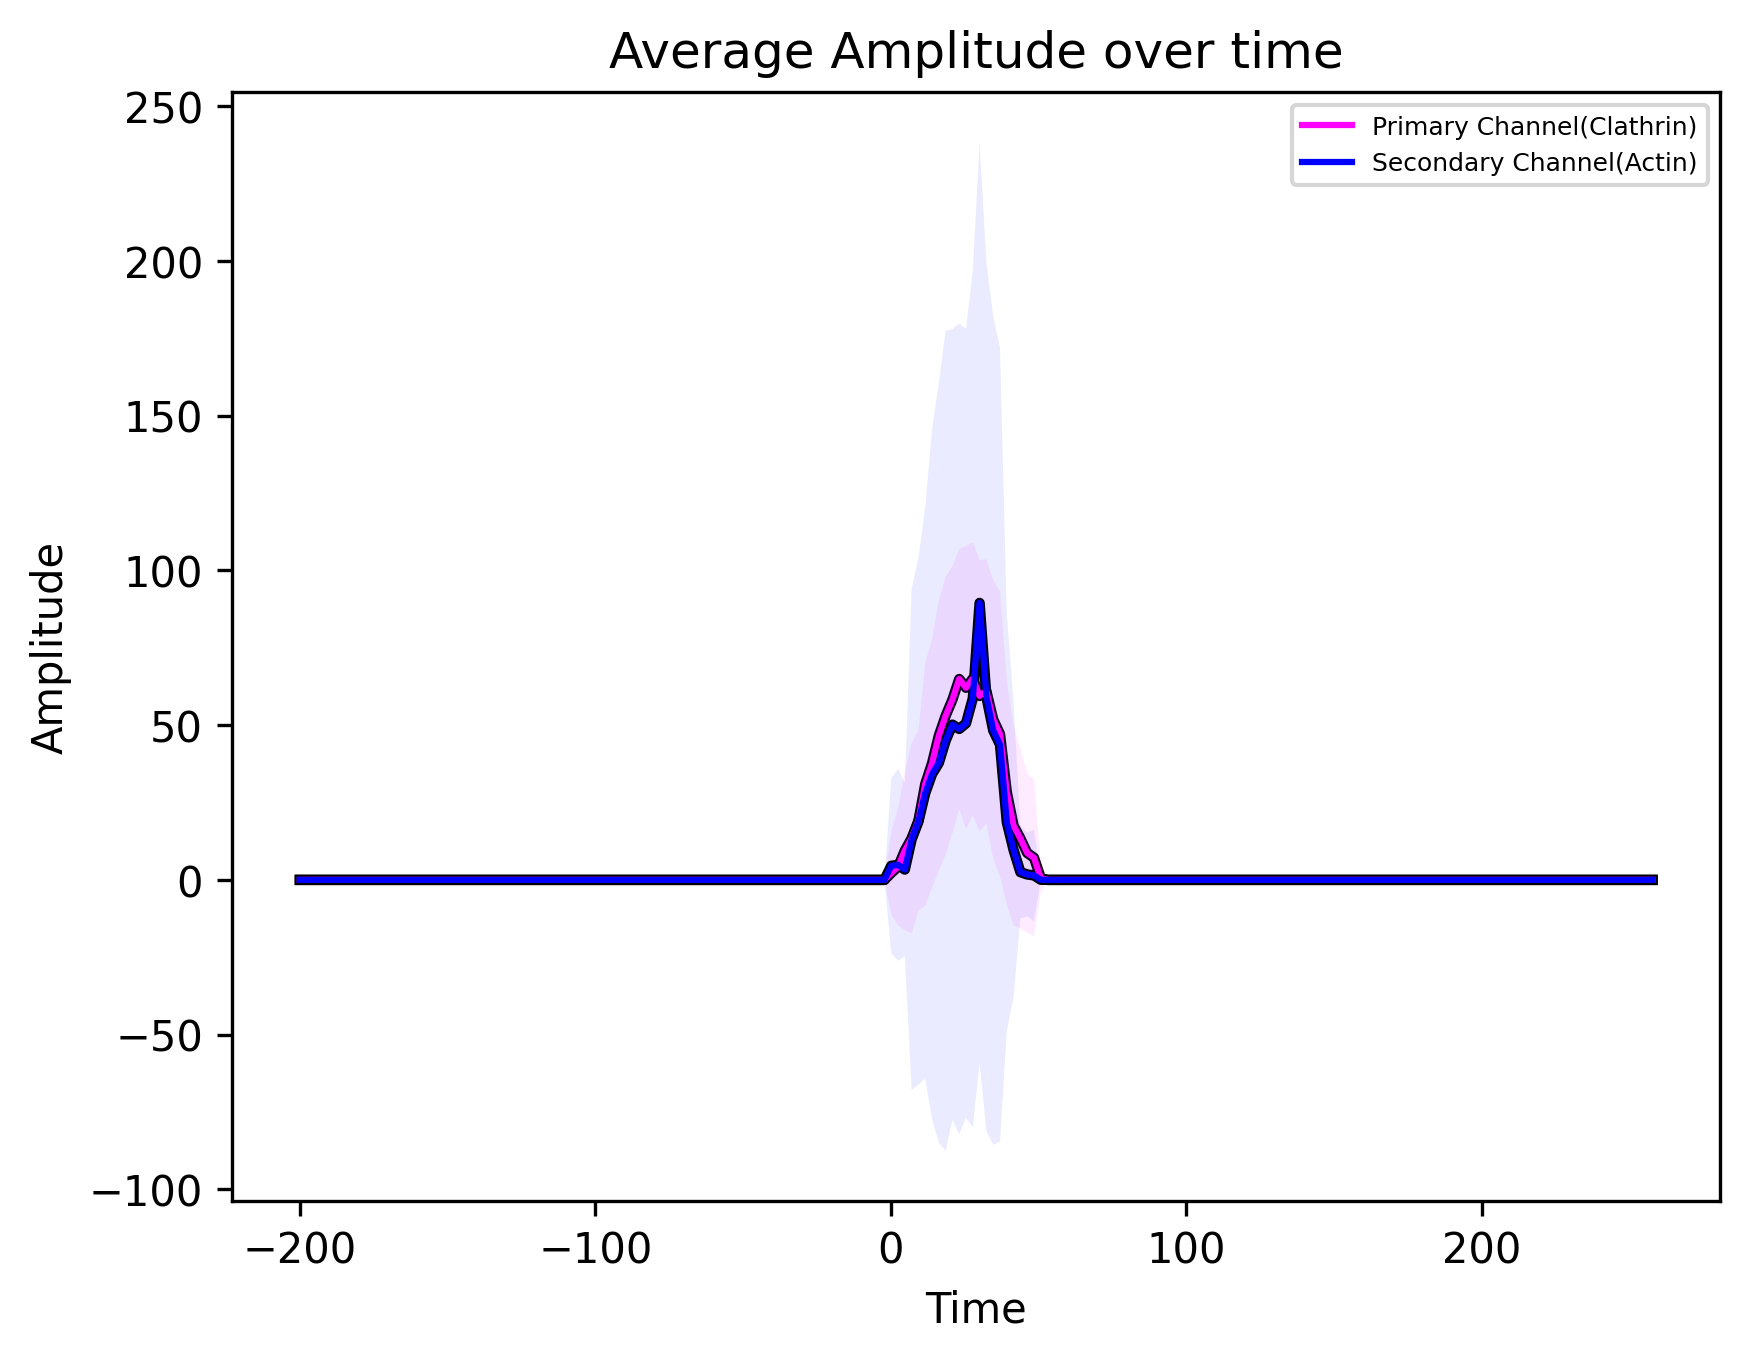

In [36]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[1], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

**Length between 16 to 20 frames**

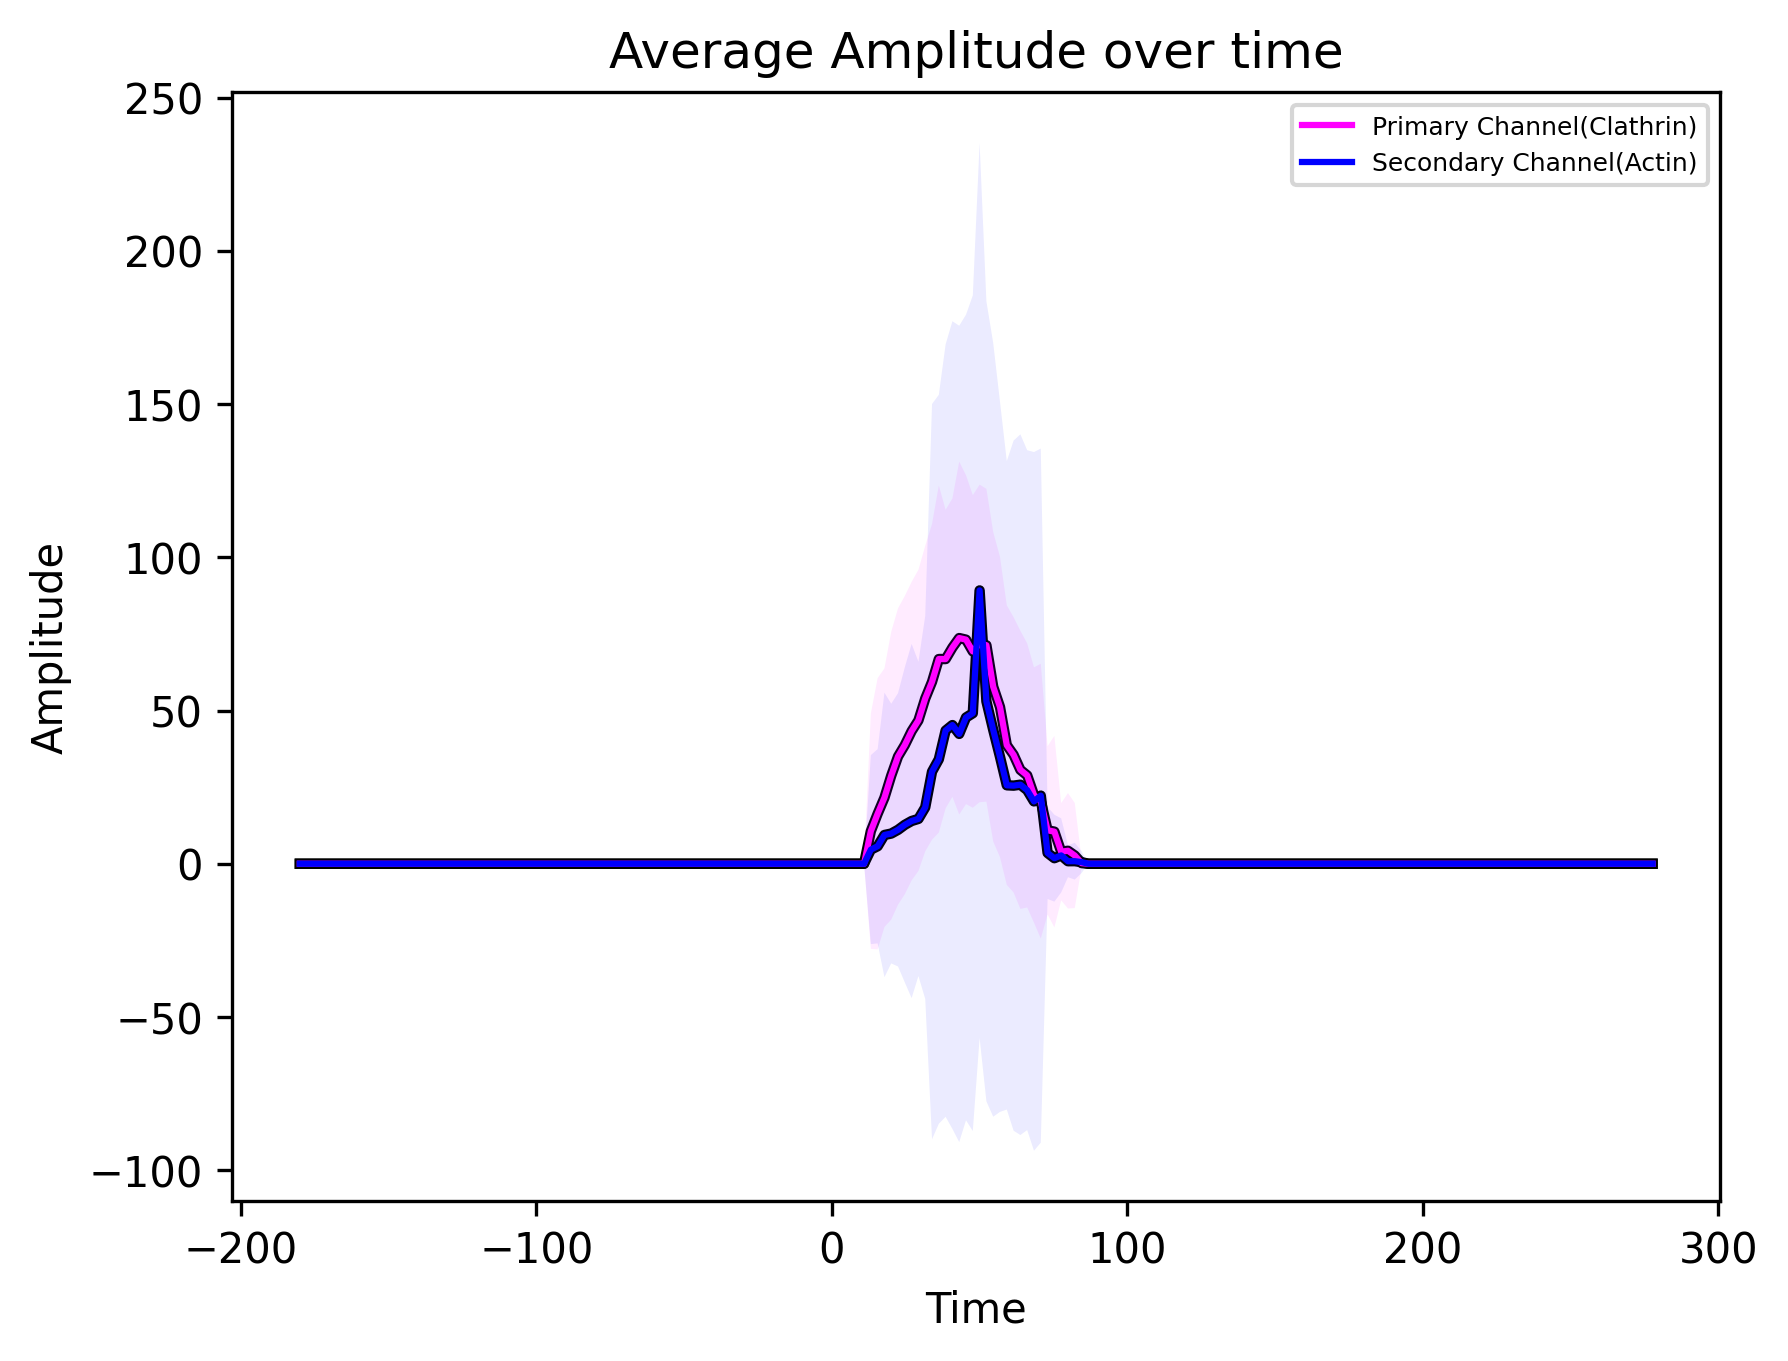

In [37]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 50, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

**Length between 21 to 25 frames**

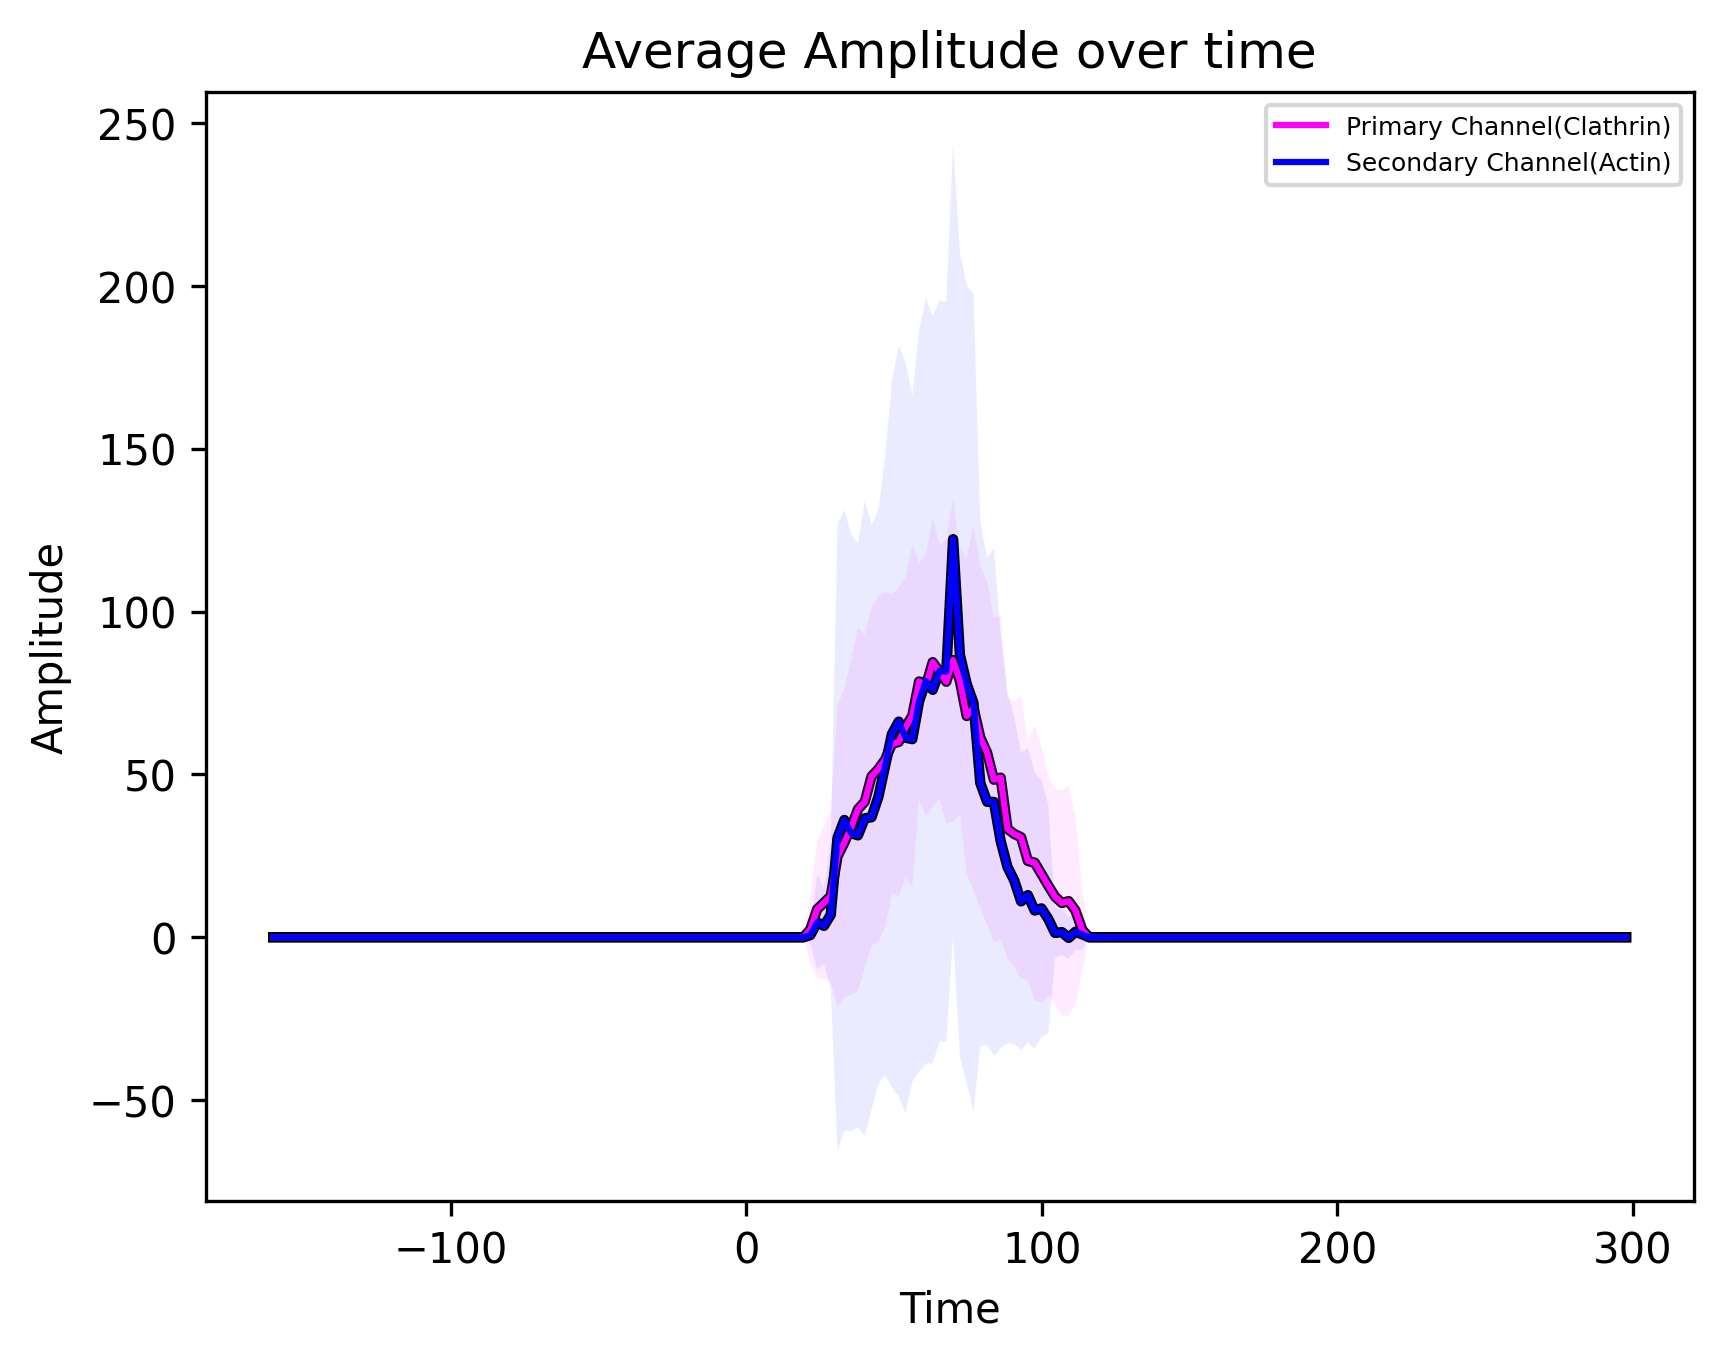

In [38]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[3], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 70, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

**Length between 26 to 30 frames**

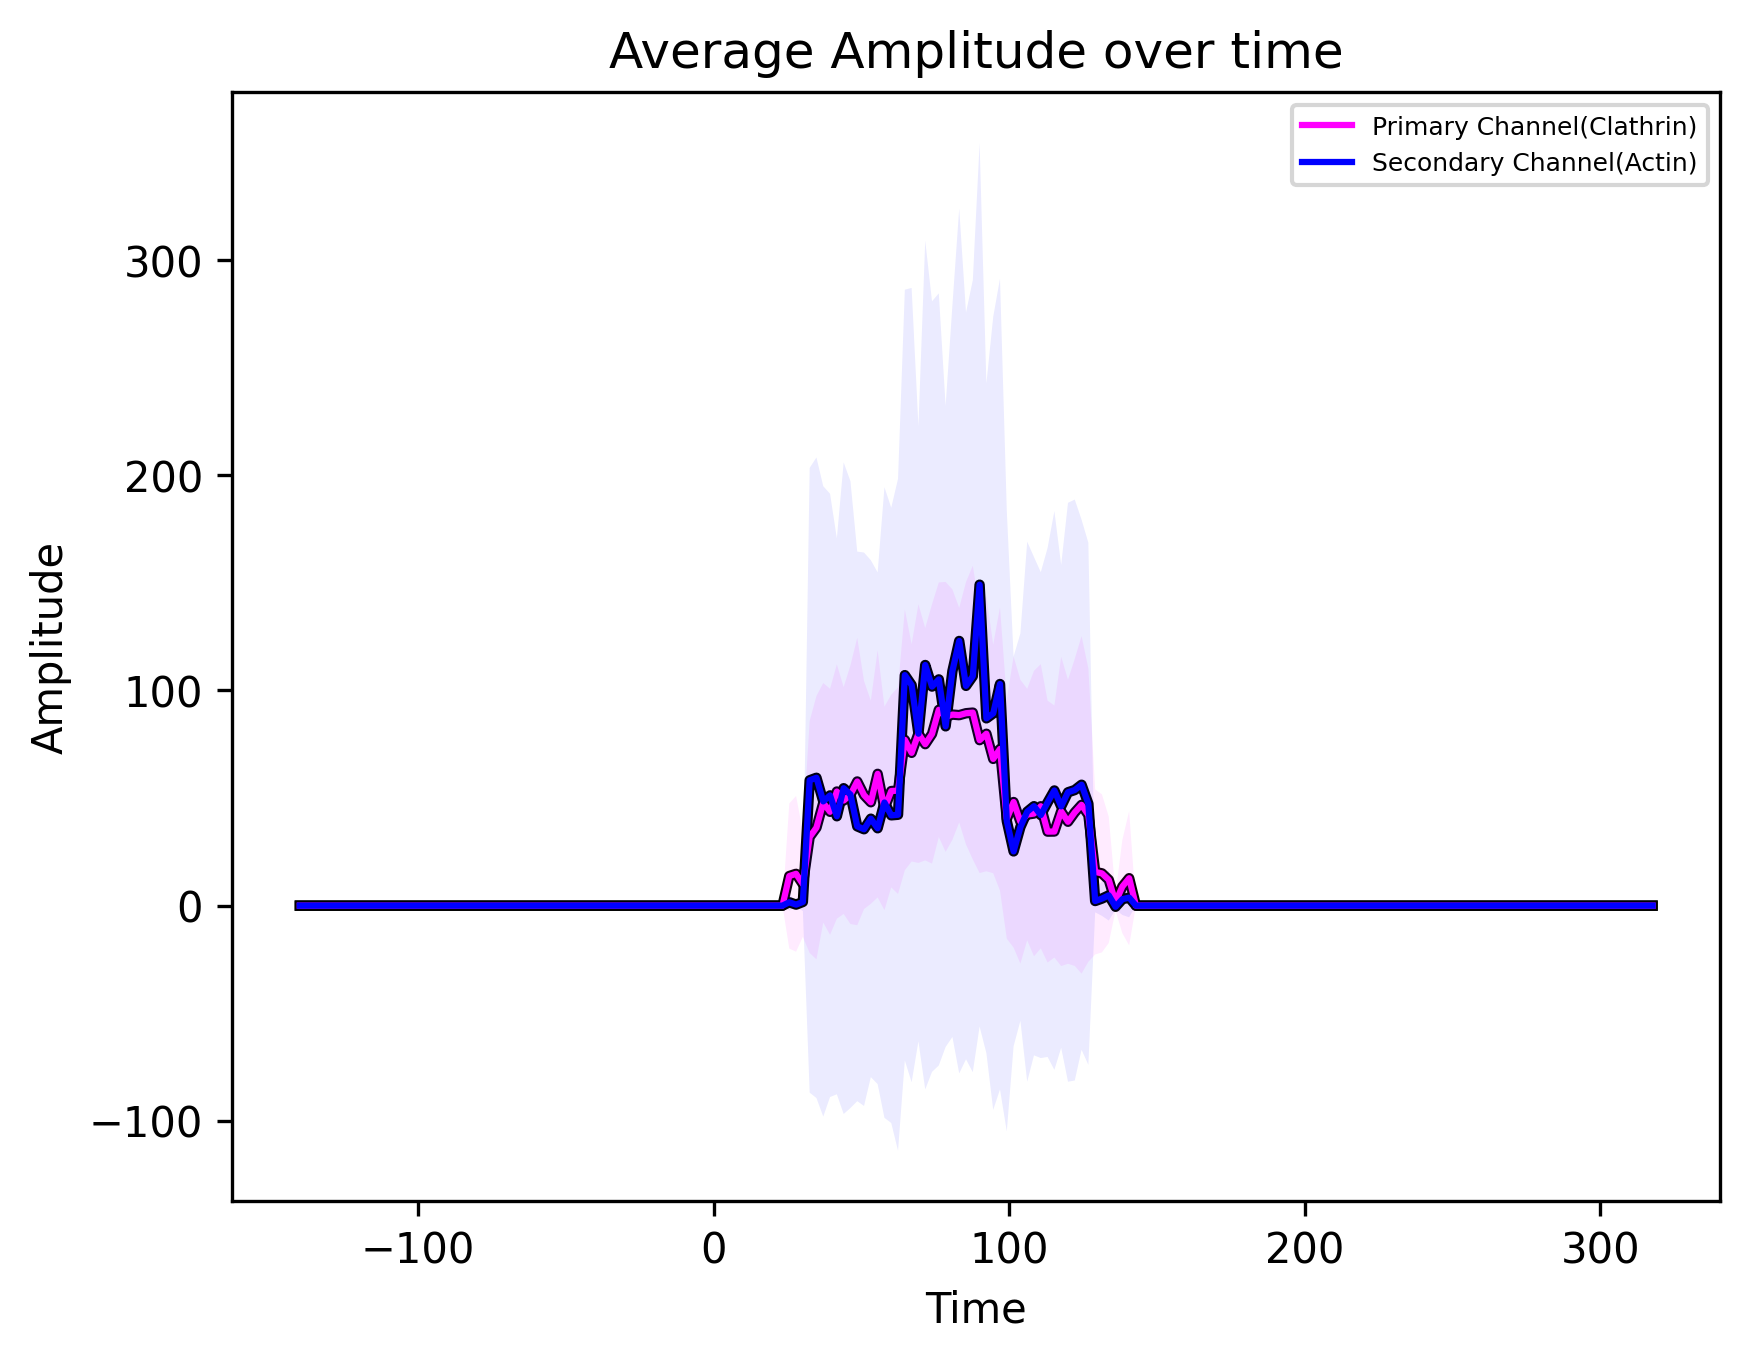

In [39]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[4], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 90, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

**Length between 31 to 40 frames**

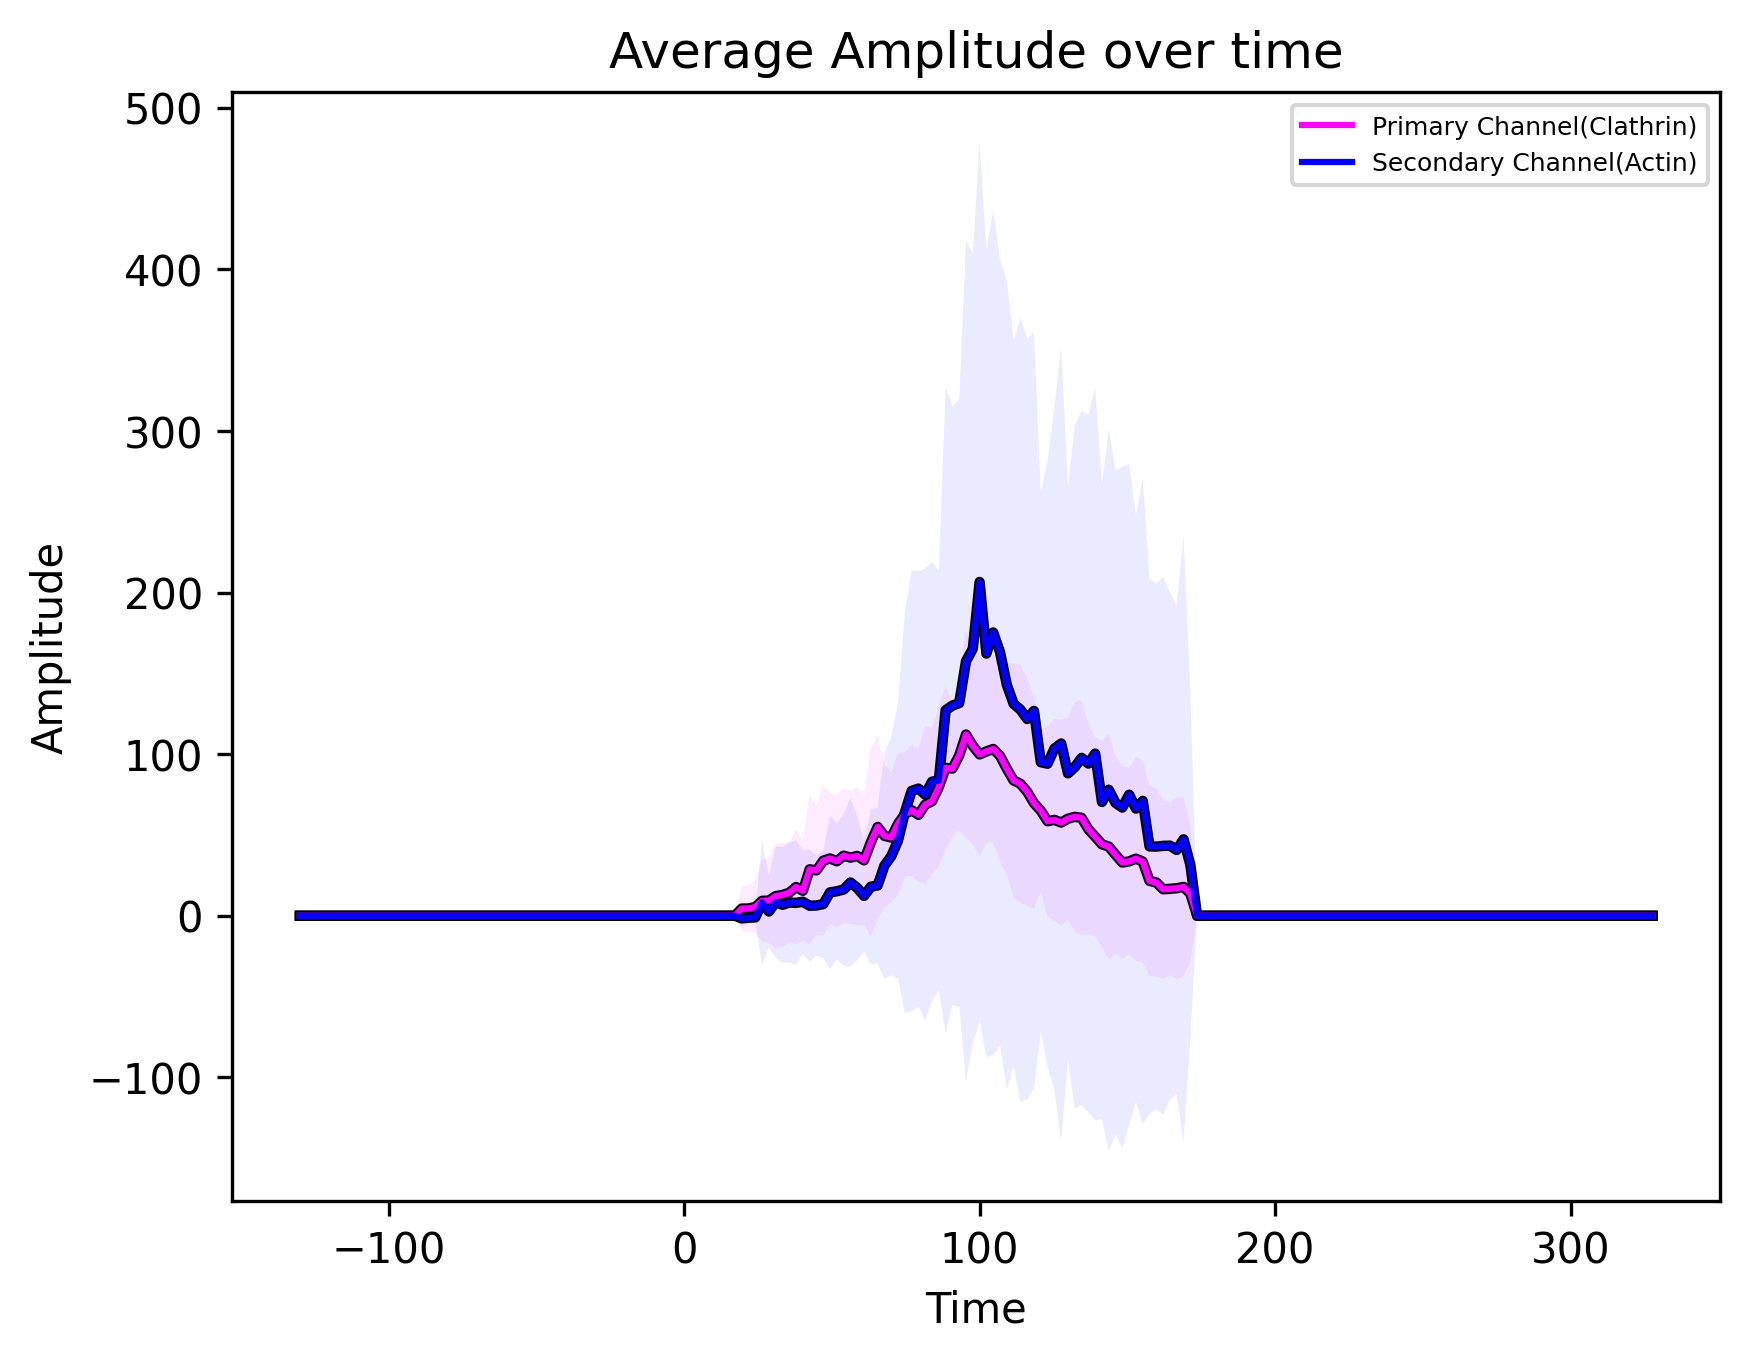

In [40]:
primary_buffer, secondary_buffer= createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[5], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch1], time_shift = 100, framerate_msec = 2.3*1000, colors = ['magenta', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Actin)'])

# Category 3 
## Actin, Dynamin and Clathrin positive

In [41]:
cat3_df = filtered_tracks[(filtered_tracks['channel2_positive'] == True) & (filtered_tracks['channel1_positive'] == True)]
cat3_df.shape

(104, 24)

In [42]:
custom_length_ranges = [[5, 10], [11,15], [16, 20], [21, 25], [26, 30], [31, 40], [41,90]]
track_id_arrays = filter_track_ids_by_length_ranges(dataframe = cat3_df, track_length_buckets = custom_length_ranges, 
                                 track_id_col_name = 'track_id', track_length_col_name = 'track_length')

In [43]:
print(f'number of tracks between [5,10] inclusive are {len(track_id_arrays[0])}')
print(f'number of tracks between [11,15] inclusive are {len(track_id_arrays[1])}')
print(f'number of tracks between [16,20] inclusive are {len(track_id_arrays[2])}')
print(f'number of tracks between [21,25] inclusive are {len(track_id_arrays[3])}')
print(f'number of tracks between [26,30] inclusive are {len(track_id_arrays[4])}')
print(f'number of tracks between [31,40] inclusive are {len(track_id_arrays[5])}')
print(f'number of tracks between [41,90] inclusive are {len(track_id_arrays[6])}')

number of tracks between [5,10] inclusive are 11
number of tracks between [11,15] inclusive are 21
number of tracks between [16,20] inclusive are 26
number of tracks between [21,25] inclusive are 20
number of tracks between [26,30] inclusive are 5
number of tracks between [31,40] inclusive are 15
number of tracks between [41,90] inclusive are 5


In [44]:
random_tracks = random_track_ids(dataframe = cat3_df, desired_length = [5,10], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

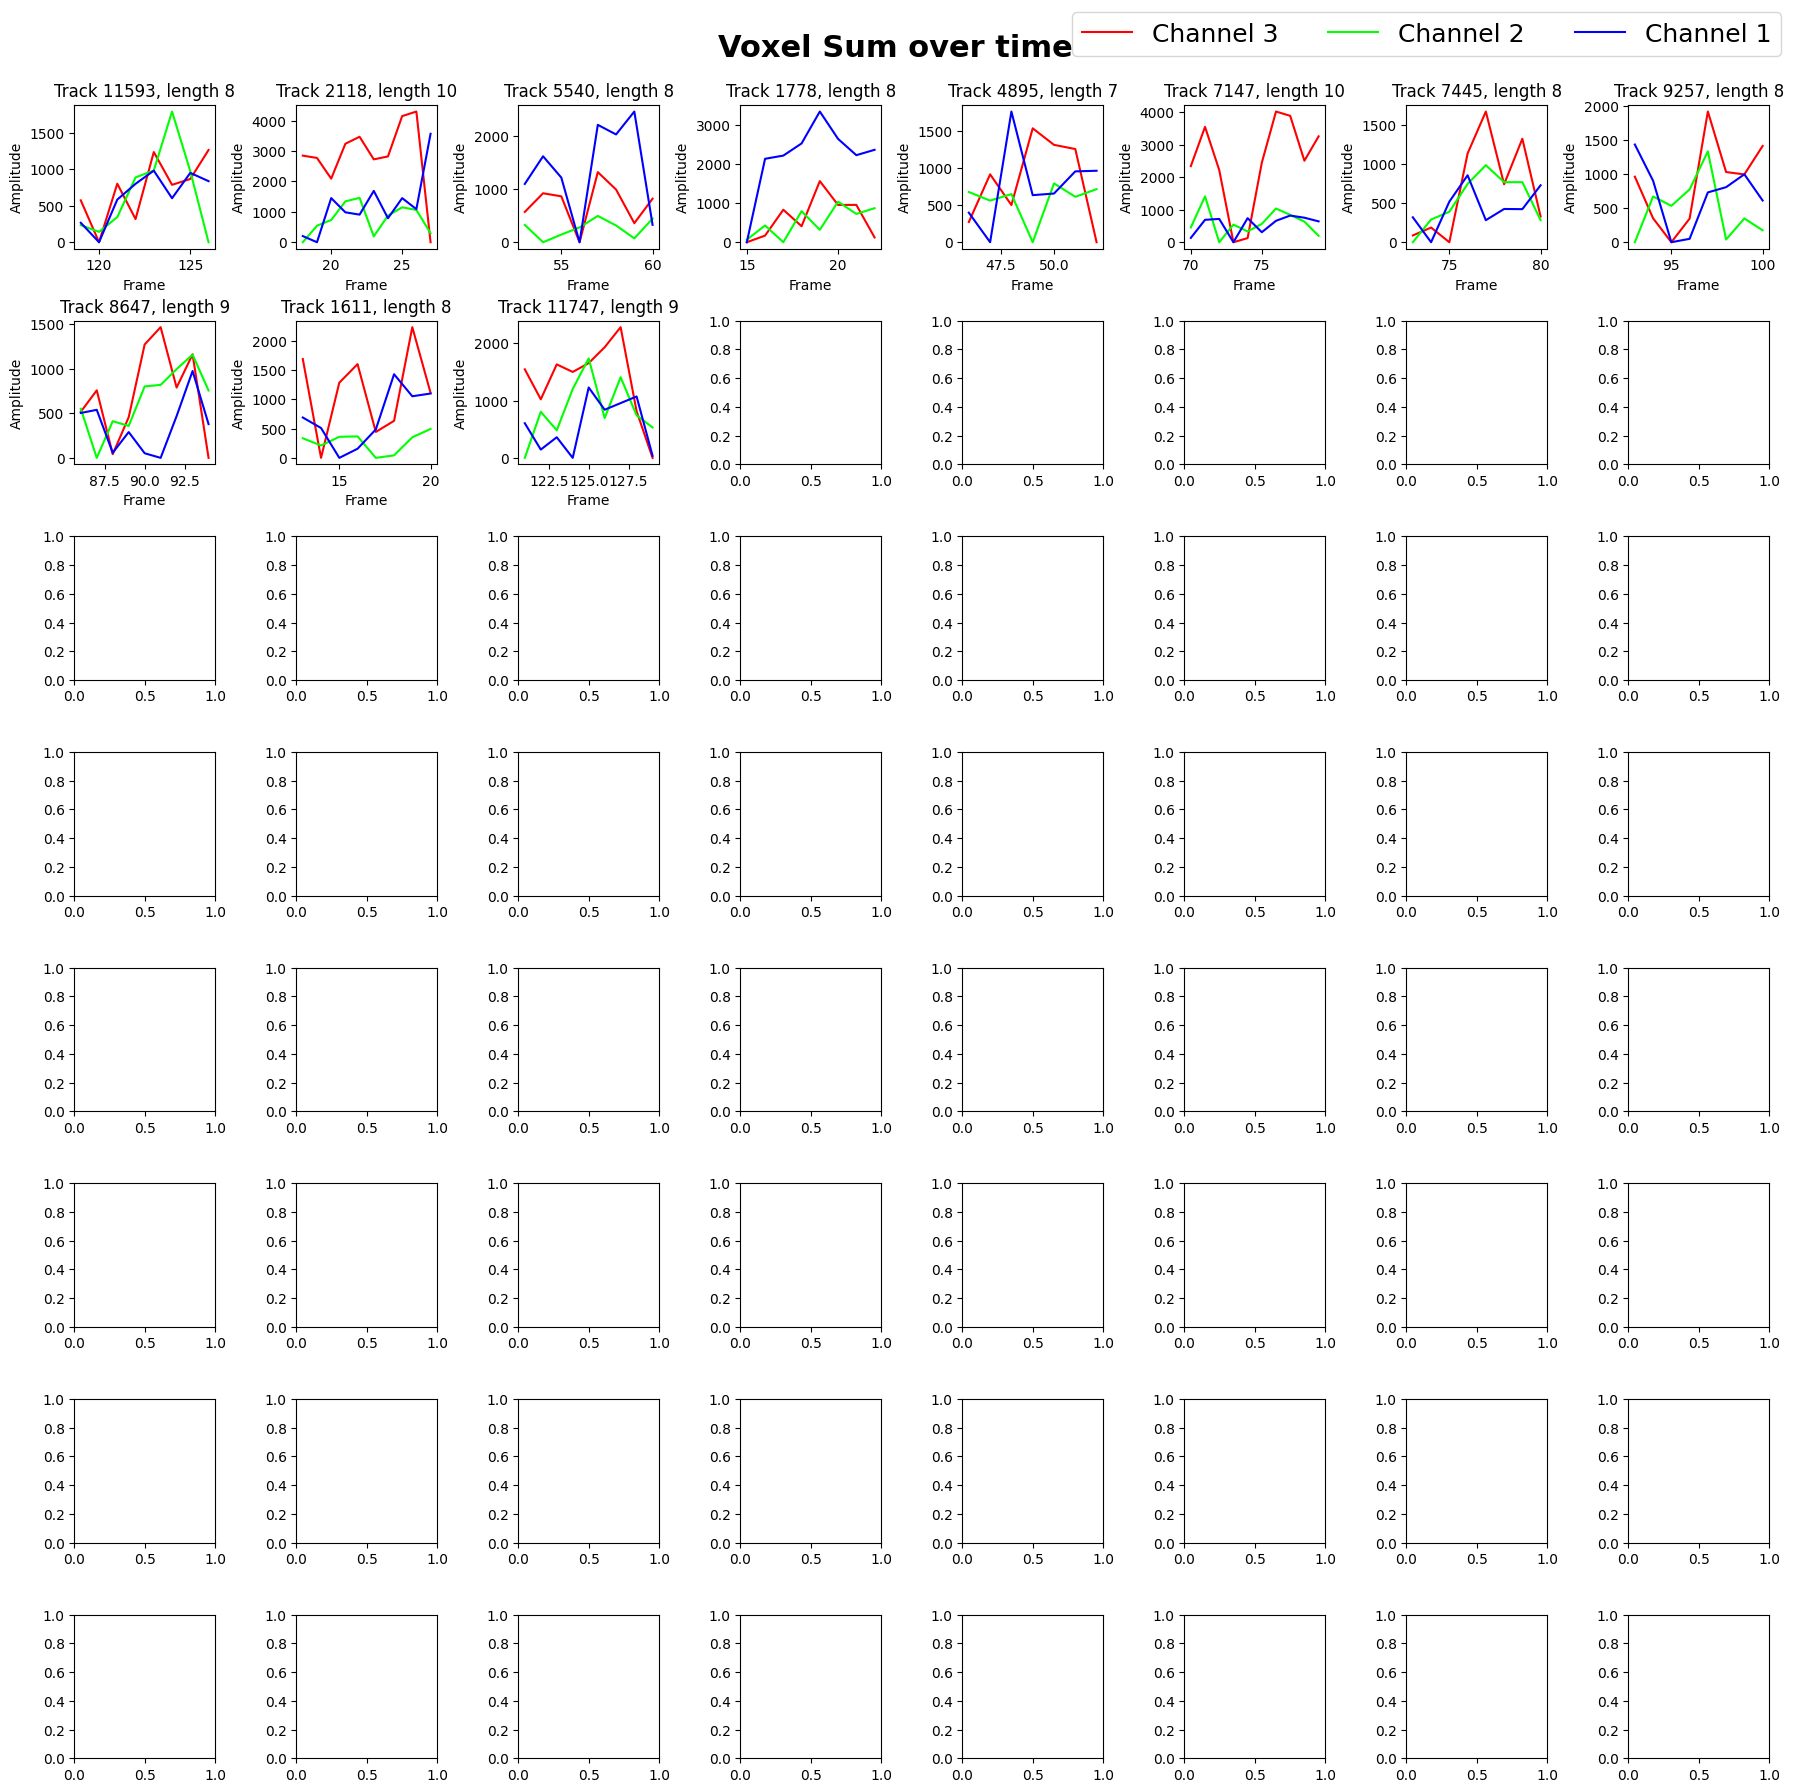

In [45]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted', 'c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'lime', 'blue'], graph_title = 'Voxel Sum')

In [46]:
random_tracks_2 = random_track_ids(dataframe = cat3_df, desired_length = [11,15], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

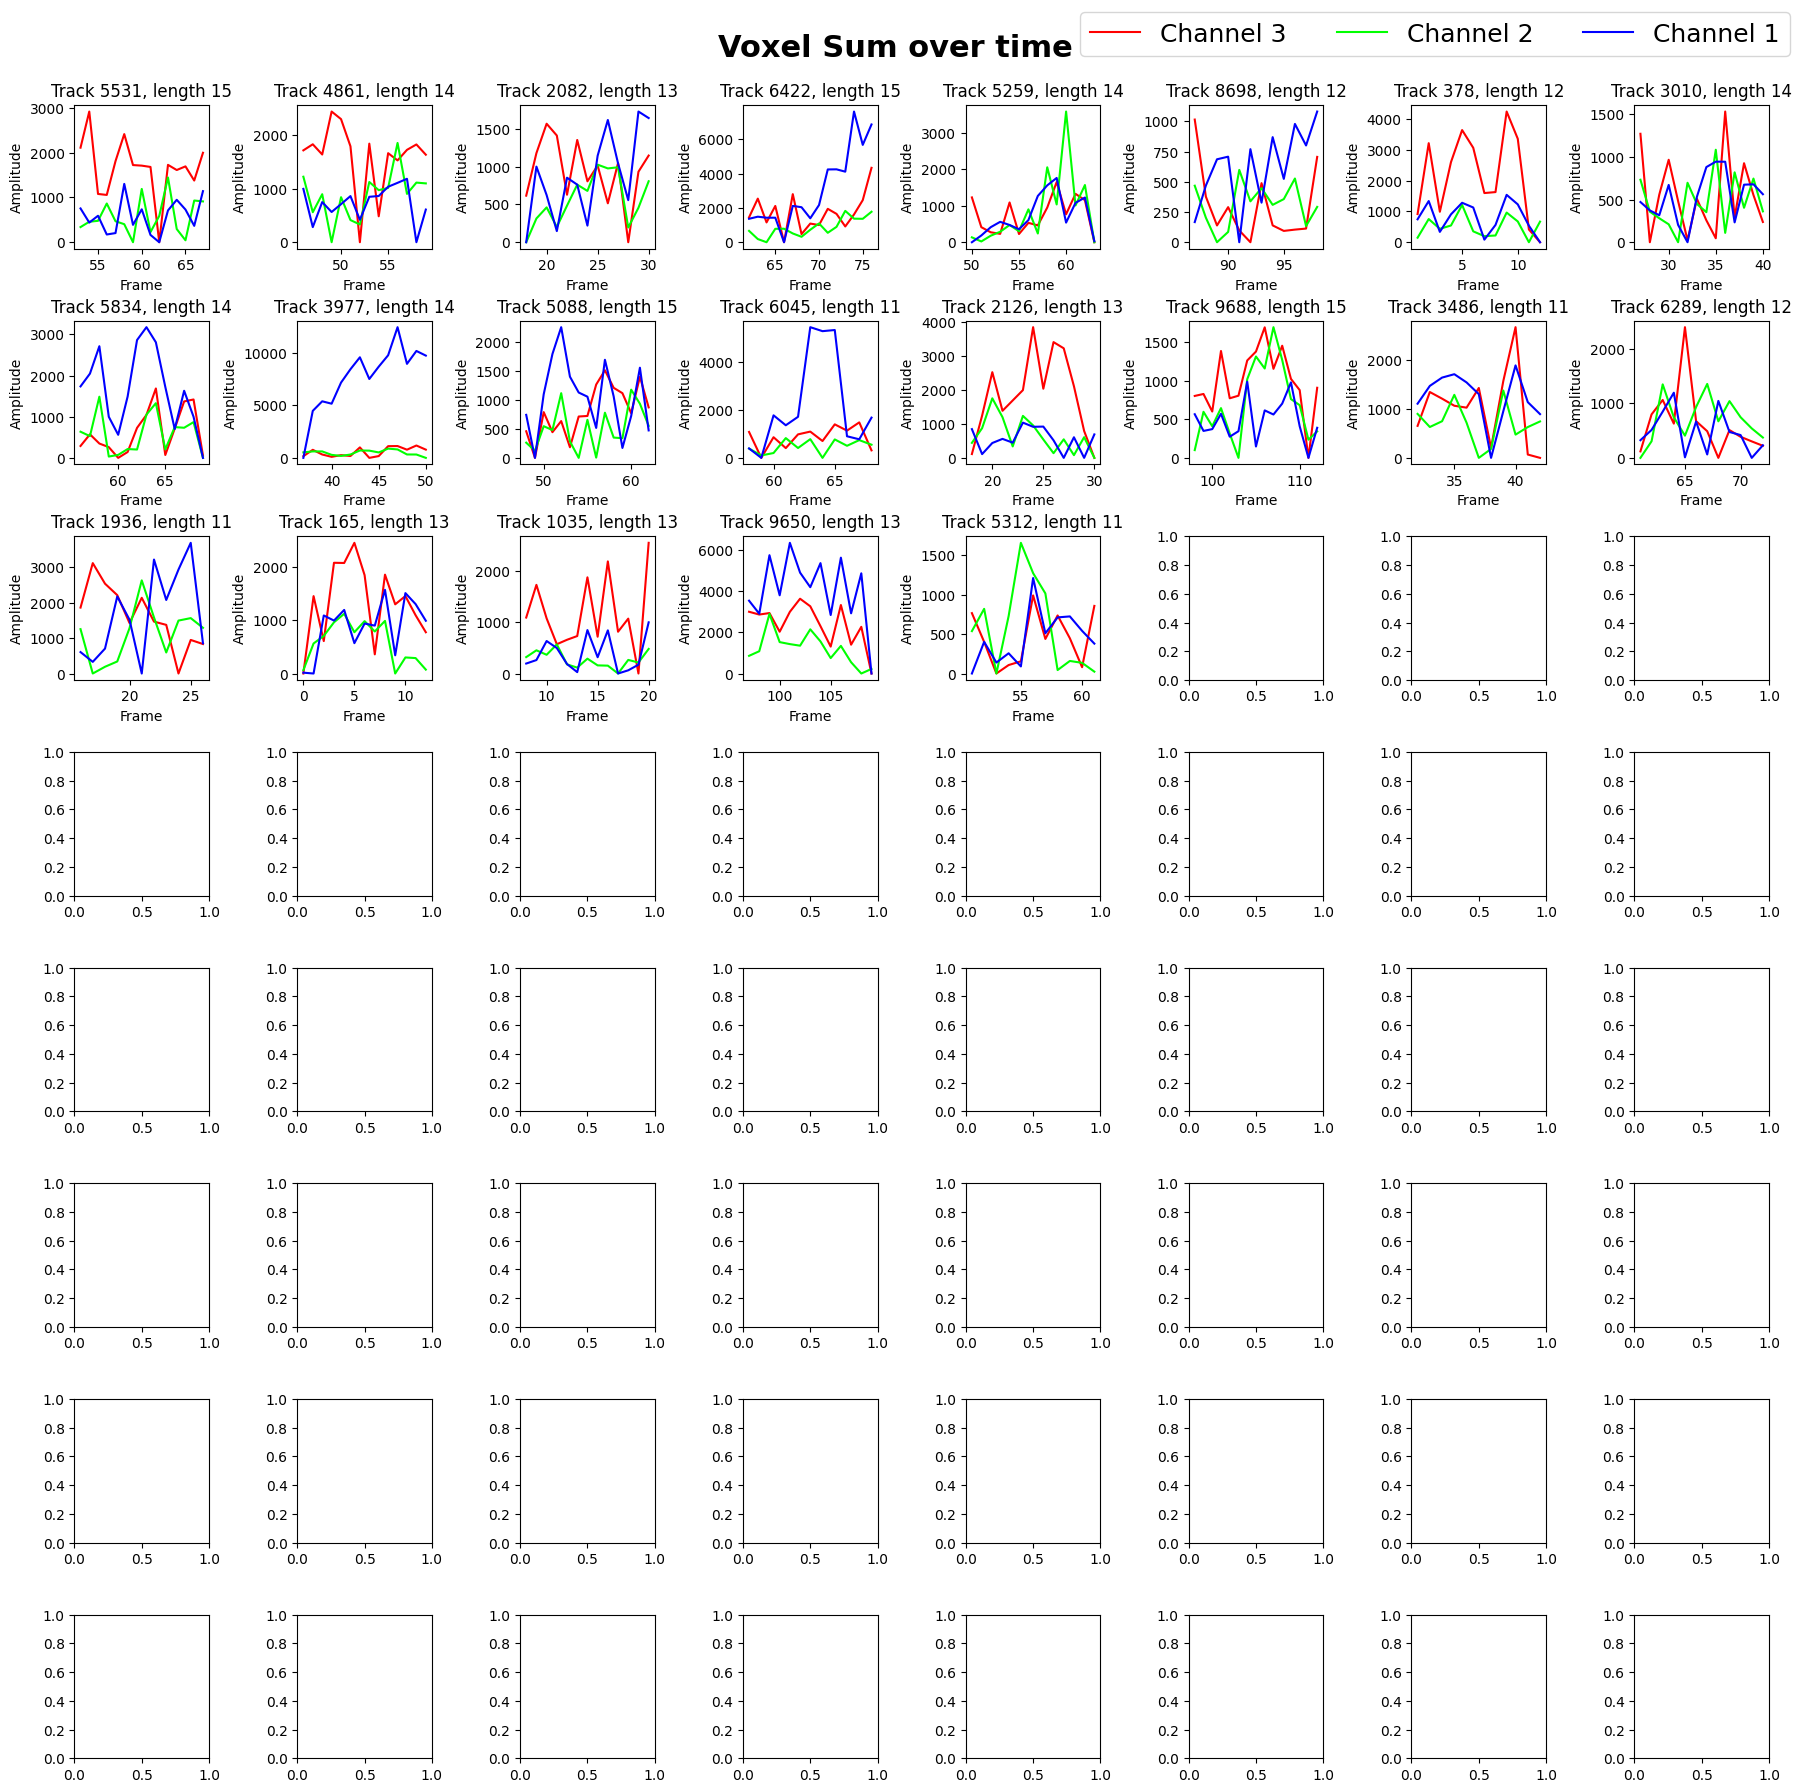

In [47]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_2, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted', 'c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'lime', 'blue'], graph_title = 'Voxel Sum')

In [48]:
random_tracks_3 = random_track_ids(dataframe = cat3_df, desired_length = [16,20], 
                                 track_length_col_name = 'track_length', track_id_col_name = 'track_id', 
                                num_to_select = 64)

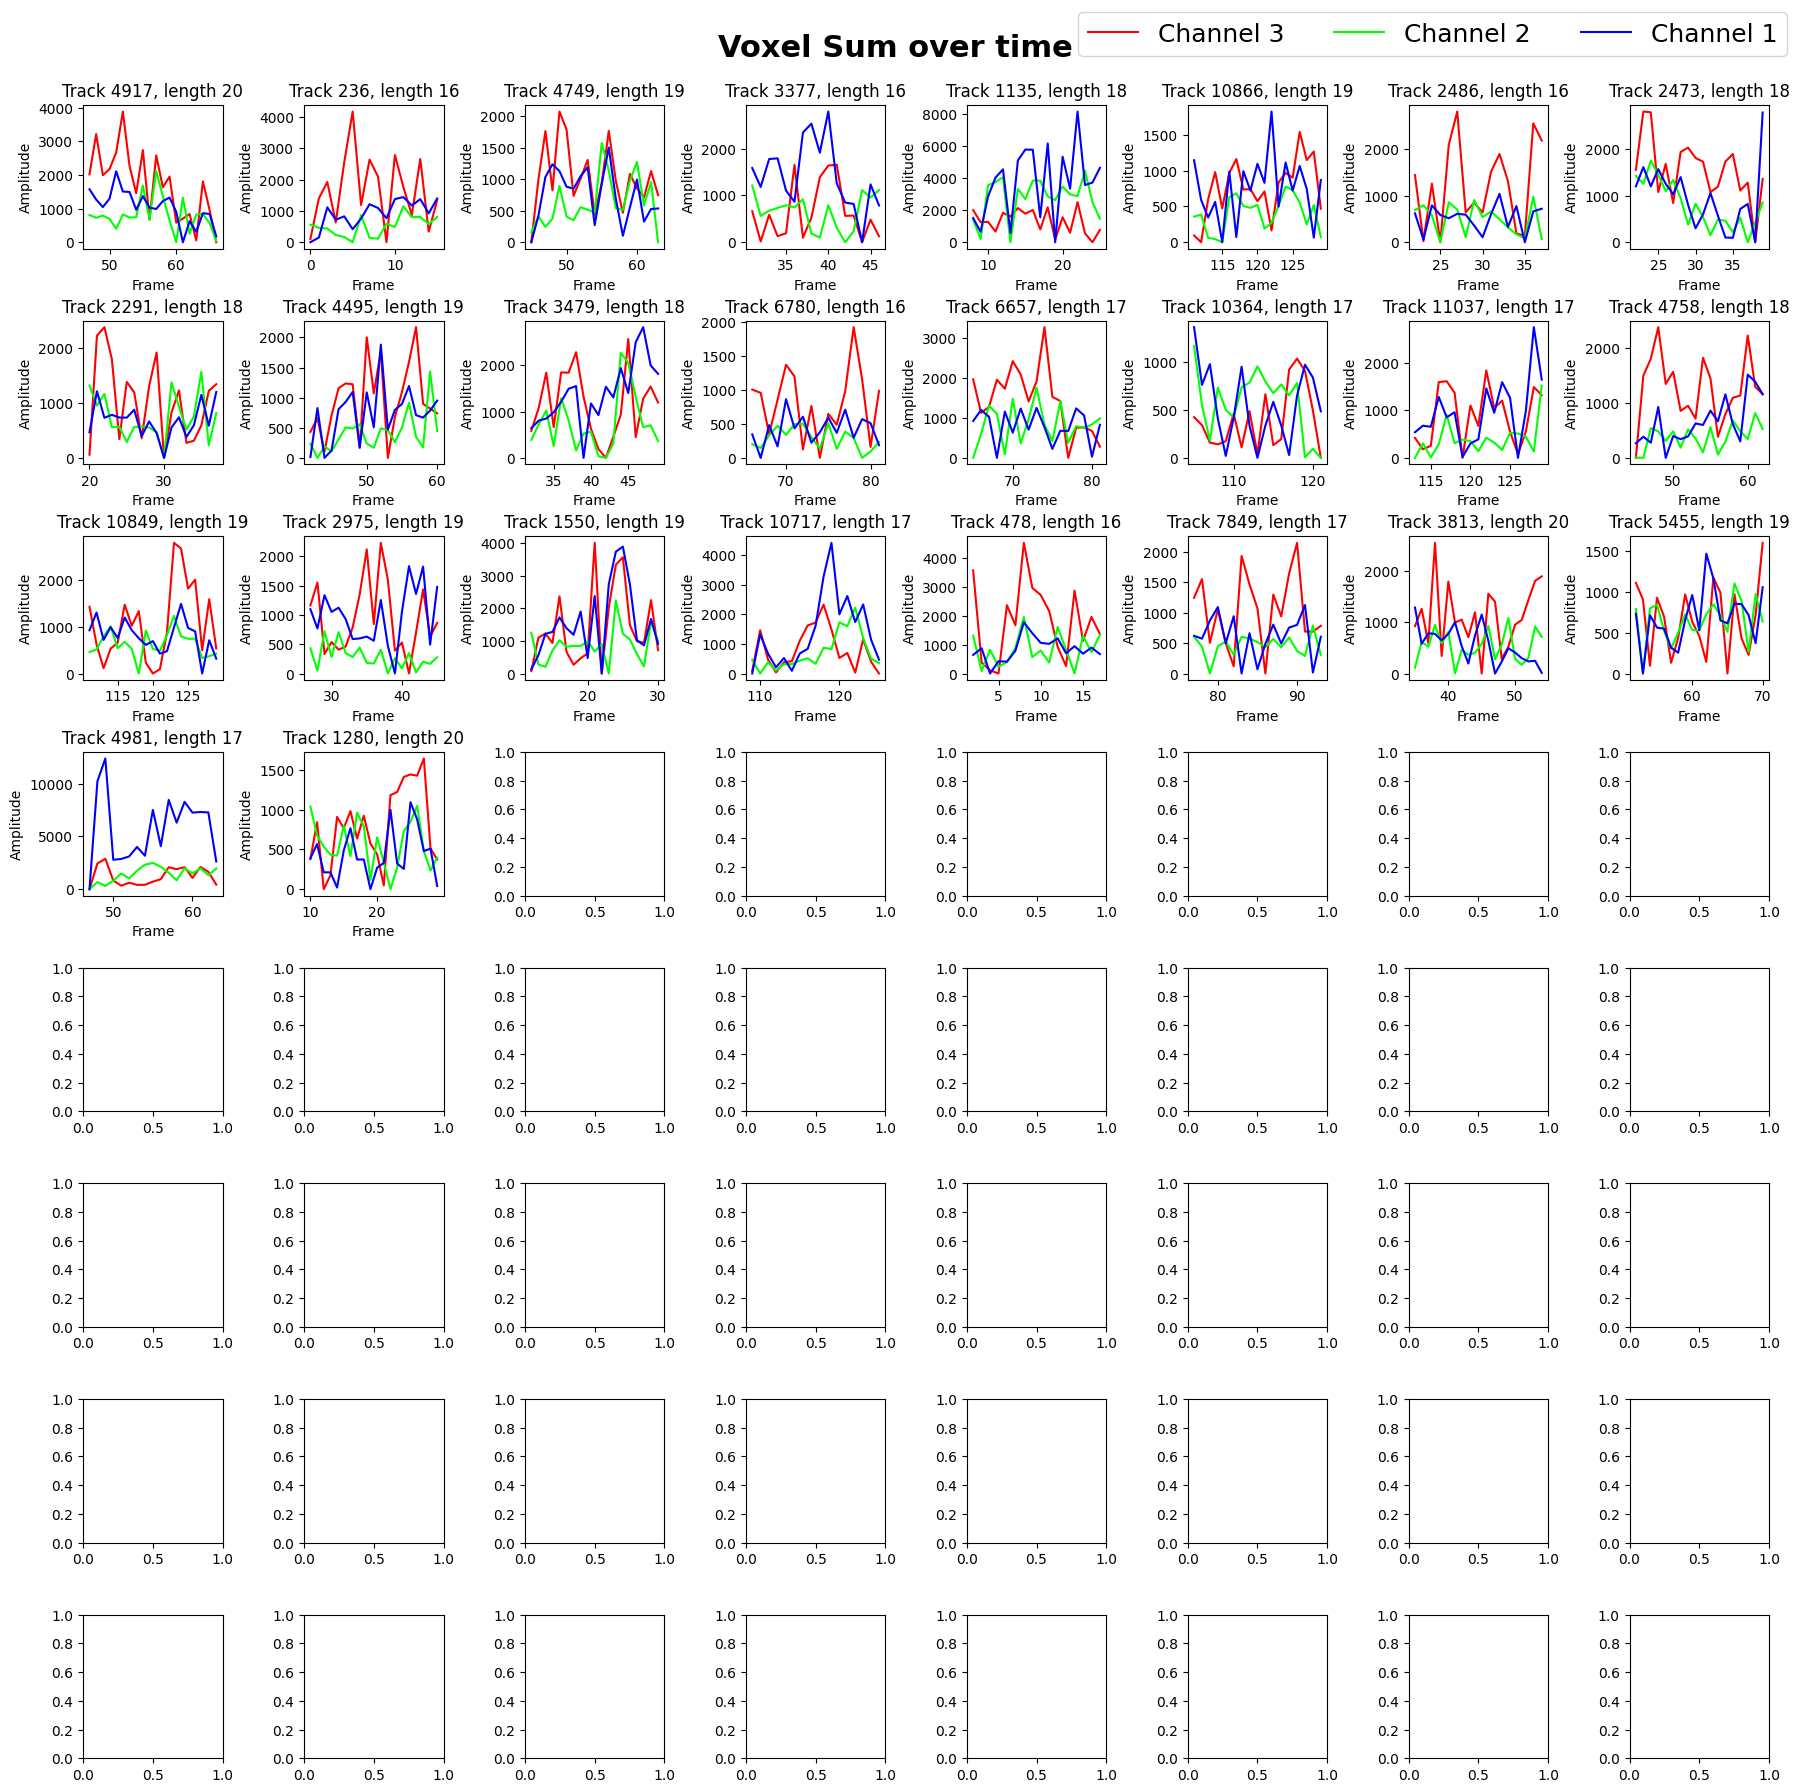

In [49]:
intensity_time_plot(dataframe = track_df, tracks_to_plot = random_tracks_3, 
intensity_to_plot = ['c3_voxel_sum_adjusted','c2_voxel_sum_adjusted', 'c1_voxel_sum_adjusted'], track_id_col_name = 'track_id', 
frame_col_name = 'frame', channels_to_plot = 3, legend_values = ['Channel 3', 'Channel 2', 'Channel 1'],
line_colors = ['red', 'lime', 'blue'], graph_title = 'Voxel Sum')

In [50]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

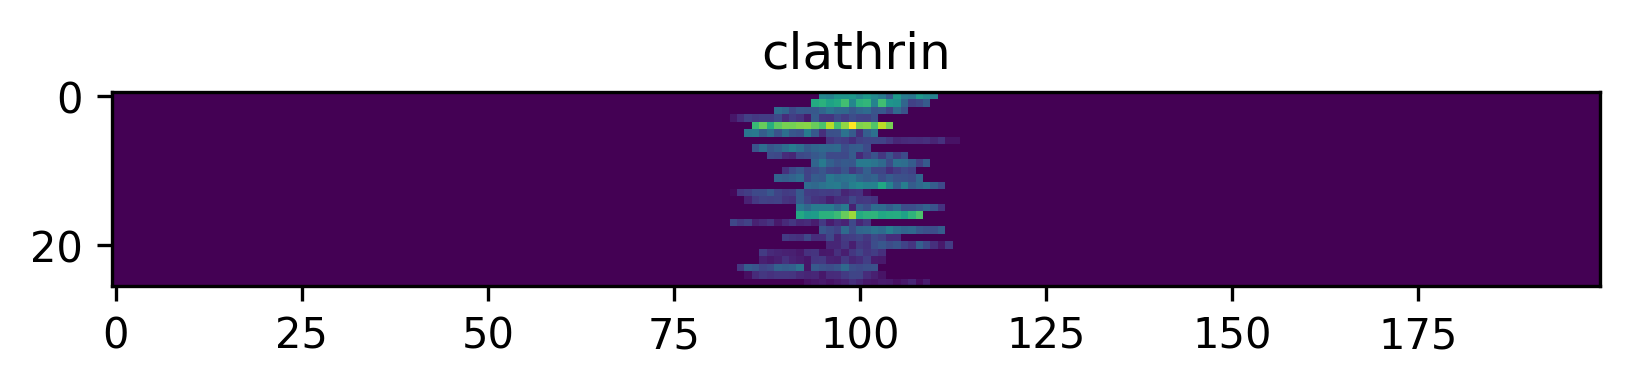

In [51]:
plt.figure(dpi=300)
plt.title('clathrin')
plt.imshow(primary_buffer)

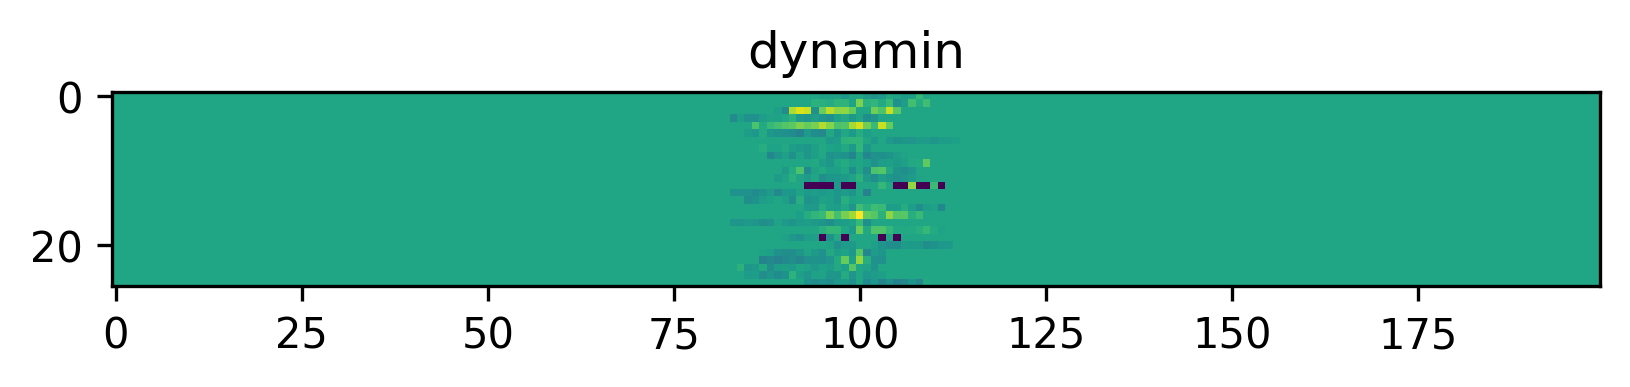

In [52]:
plt.figure(dpi=300)
plt.title('dynamin')
plt.imshow(secondary_buffer)

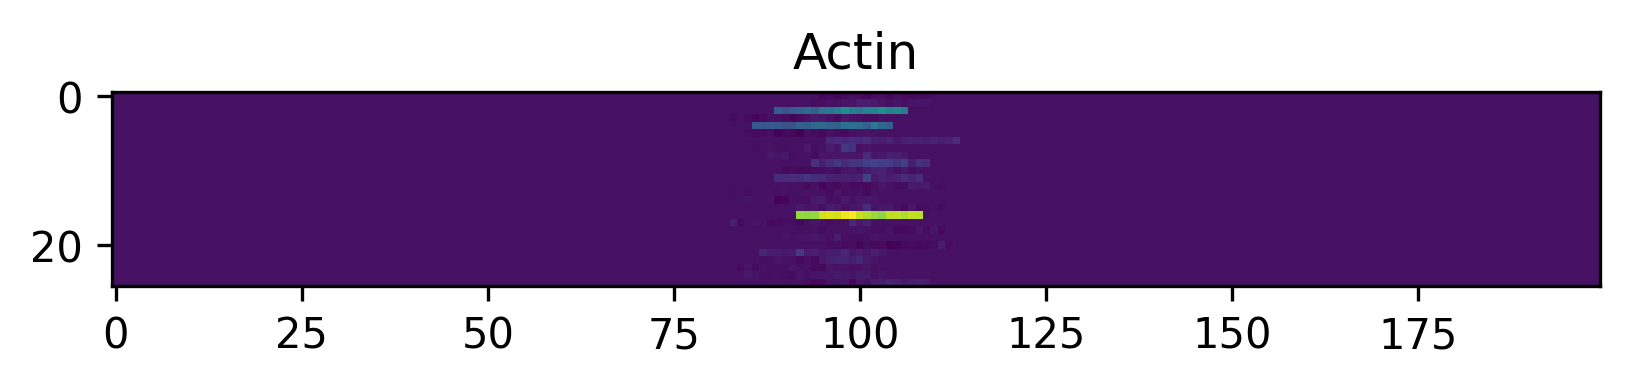

In [53]:
plt.figure(dpi=300)
plt.title('Actin')
plt.imshow(tertiary_buffer)

## Initial Cohort Plots for 3 Channels(Clathrin, Dynamin and Actin)

**Length 5 to 10 frames**

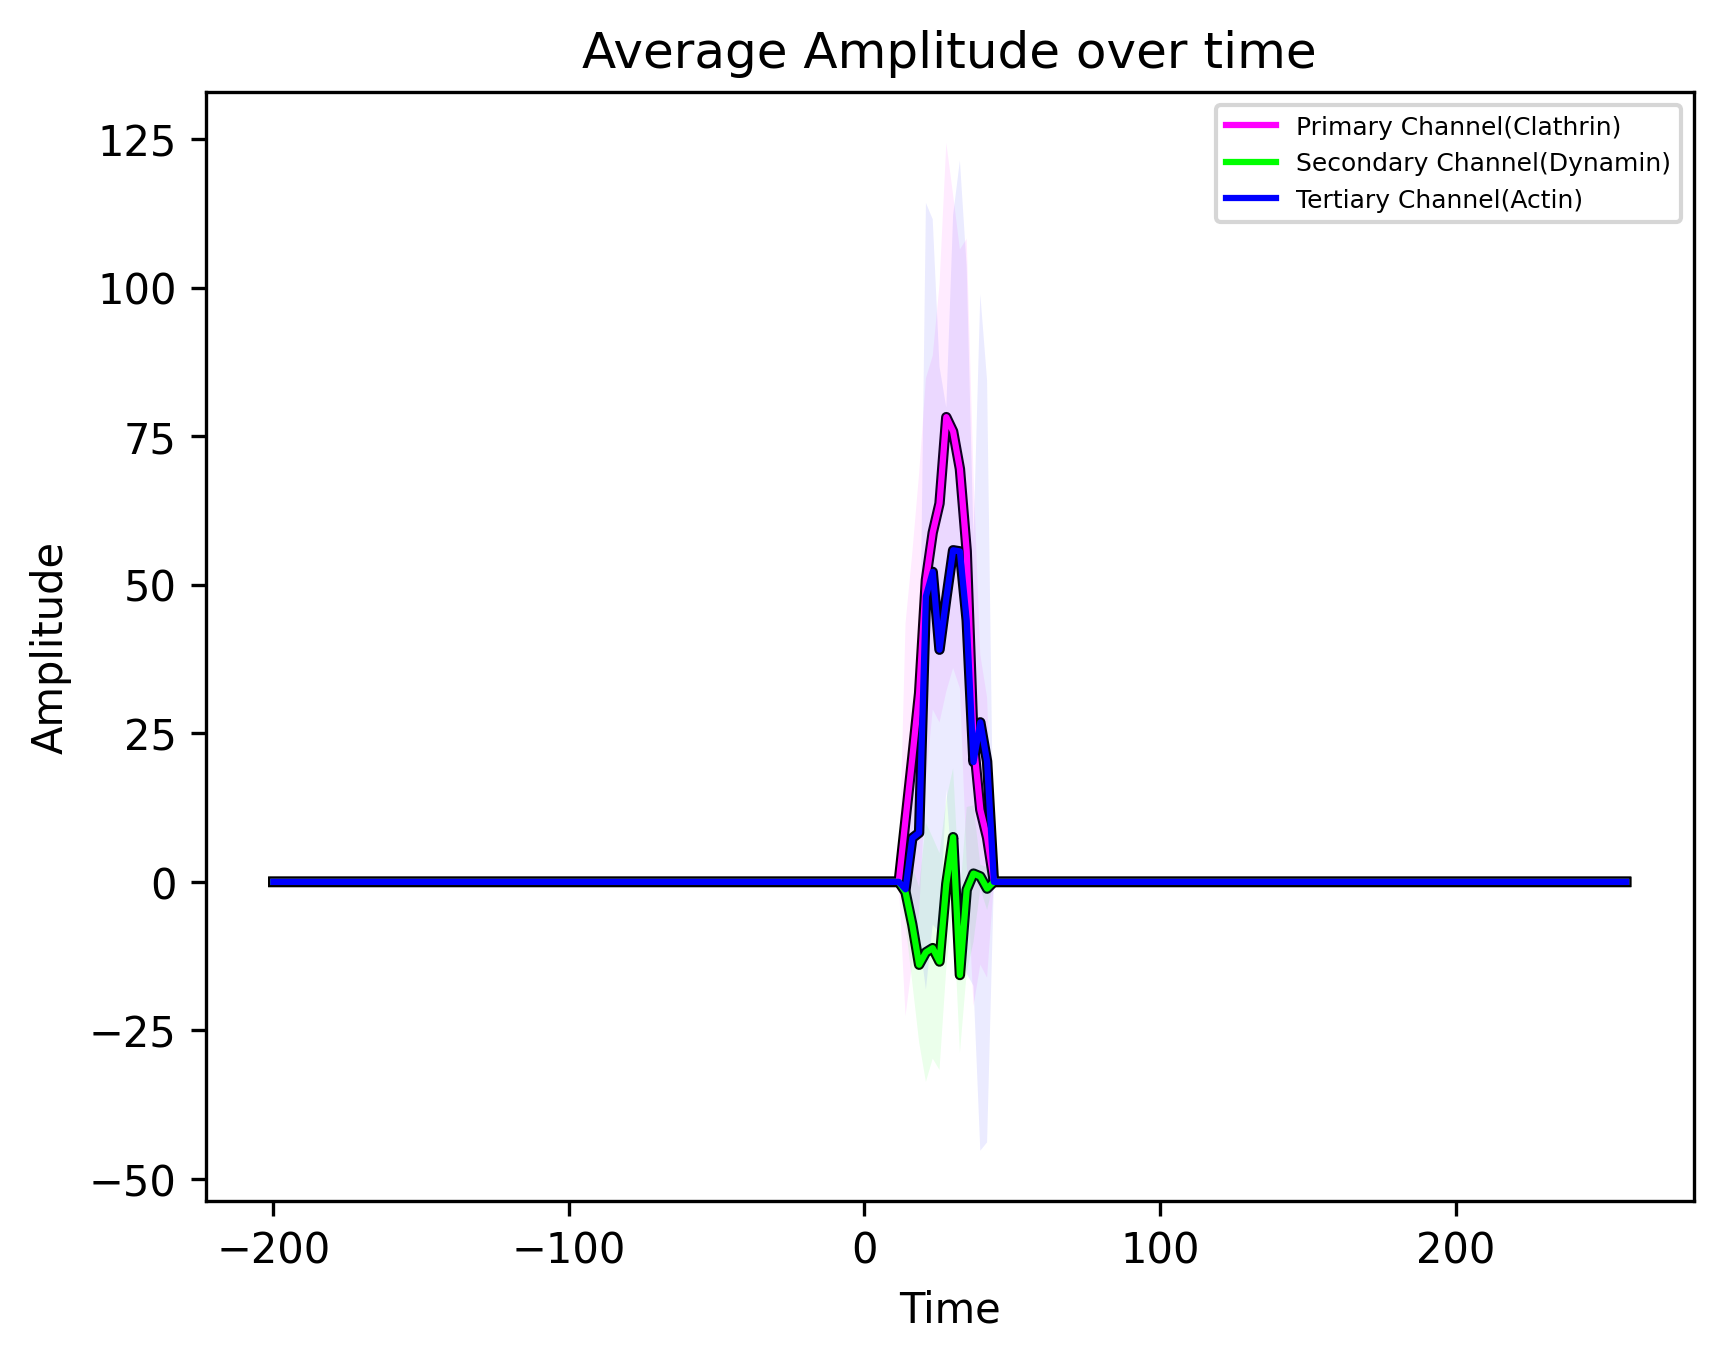

In [54]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[0], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

**Length 11 to 15 frames**

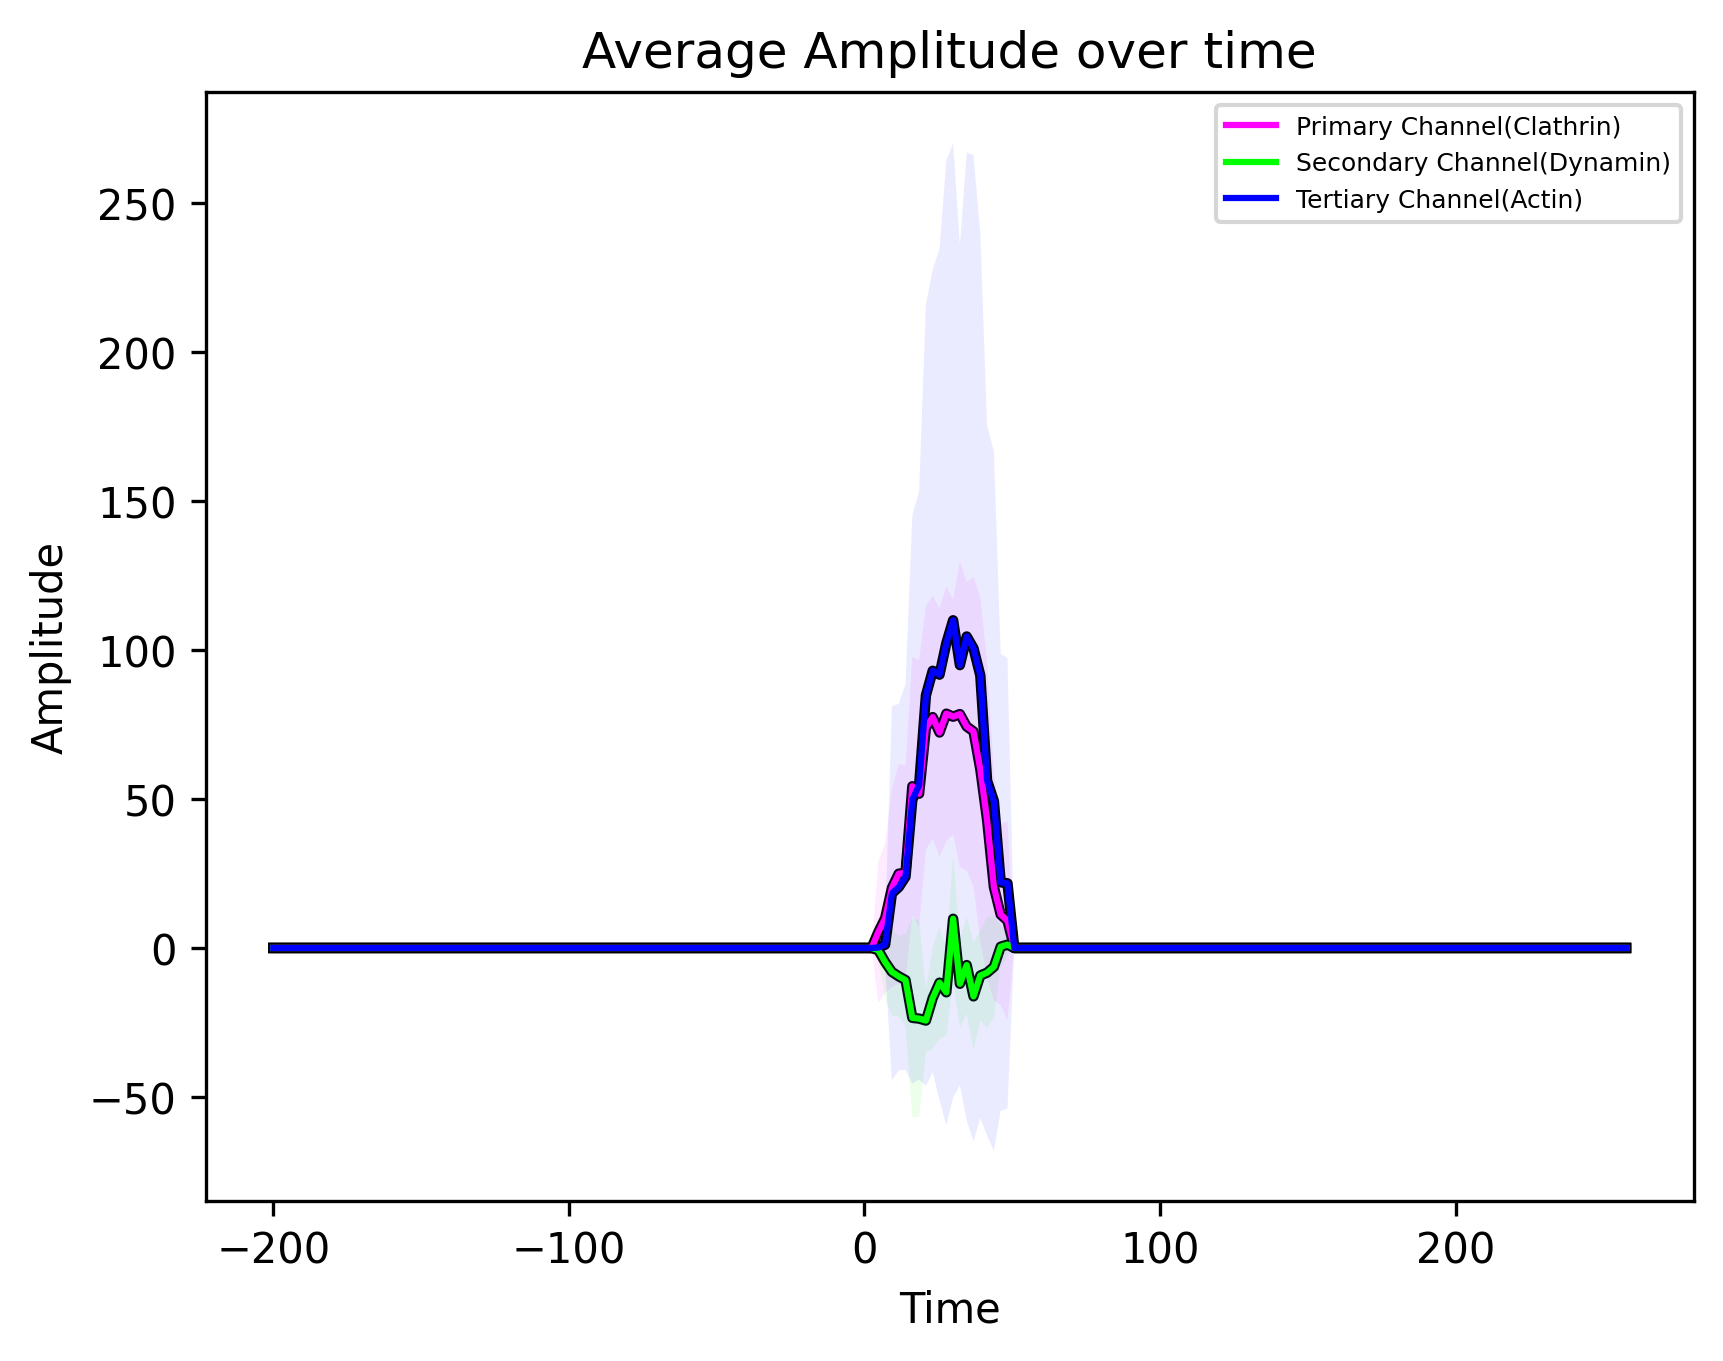

In [55]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[1], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 30, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

**Length 16 to 20 frames**

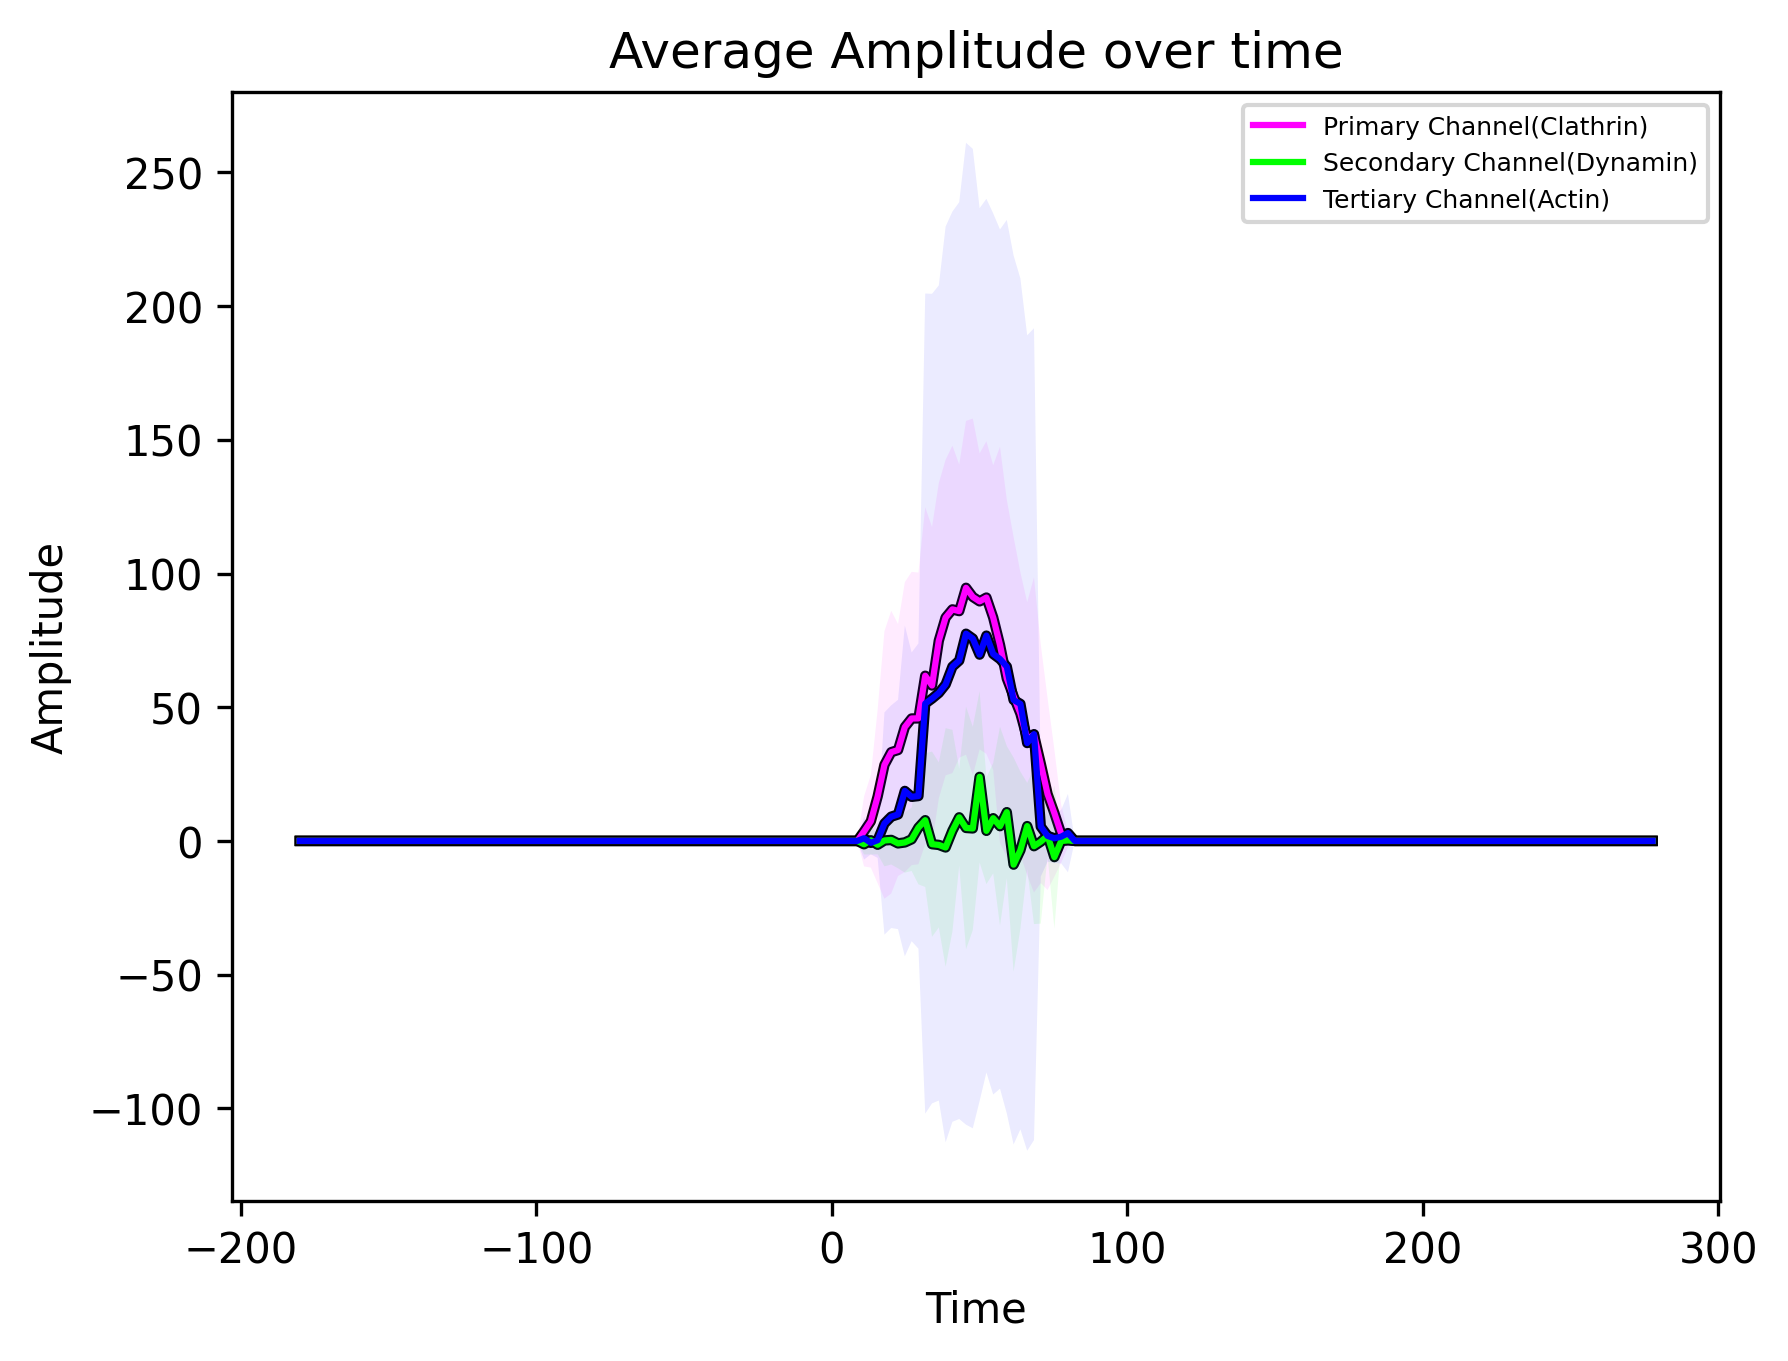

In [70]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[2], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 50, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

**Length 21 to 25**

In [77]:
track_df.columns

Index(['frame', 'index', 'c3_gaussian_amp', 'c3_mu_x', 'c3_mu_y', 'c3_mu_z',
       'c3_sigma_x', 'c3_sigma_y', 'c3_sigma_z', 'errors', 'frame_y',
       'mean_errors_mu', 'mean_errors_sigma', 'tree_id', 'track_id',
       'number_of_frames', 'color', 'c3_mean_amp', 'c3_voxel_sum',
       'c3_voxel_sum_adjusted', 'c3_peak_amp', 'c3_peak_x', 'c3_peak_y',
       'c3_peak_z', 'c2_amp', 'c2_peak_amp', 'c2_peak_x', 'c2_peak_y',
       'c2_peak_z', 'c2_peak_mean', 'c2_voxel_sum', 'c2_voxel_sum_adjusted',
       'c2_gaussian_amp', 'c2_mu_x', 'c2_mu_y', 'c2_mu_z', 'c2_sigma_x',
       'c2_sigma_y', 'c2_sigma_z', 'c1_amp', 'c1_peak_amp', 'c1_peak_x',
       'c1_peak_y', 'c1_peak_z', 'c1_voxel_sum', 'c1_voxel_sum_adjusted',
       'c1_gaussian_amp', 'c1_mu_x', 'c1_mu_y', 'c1_mu_z', 'c1_sigma_x',
       'c1_sigma_y', 'c1_sigma_z'],
      dtype='object')

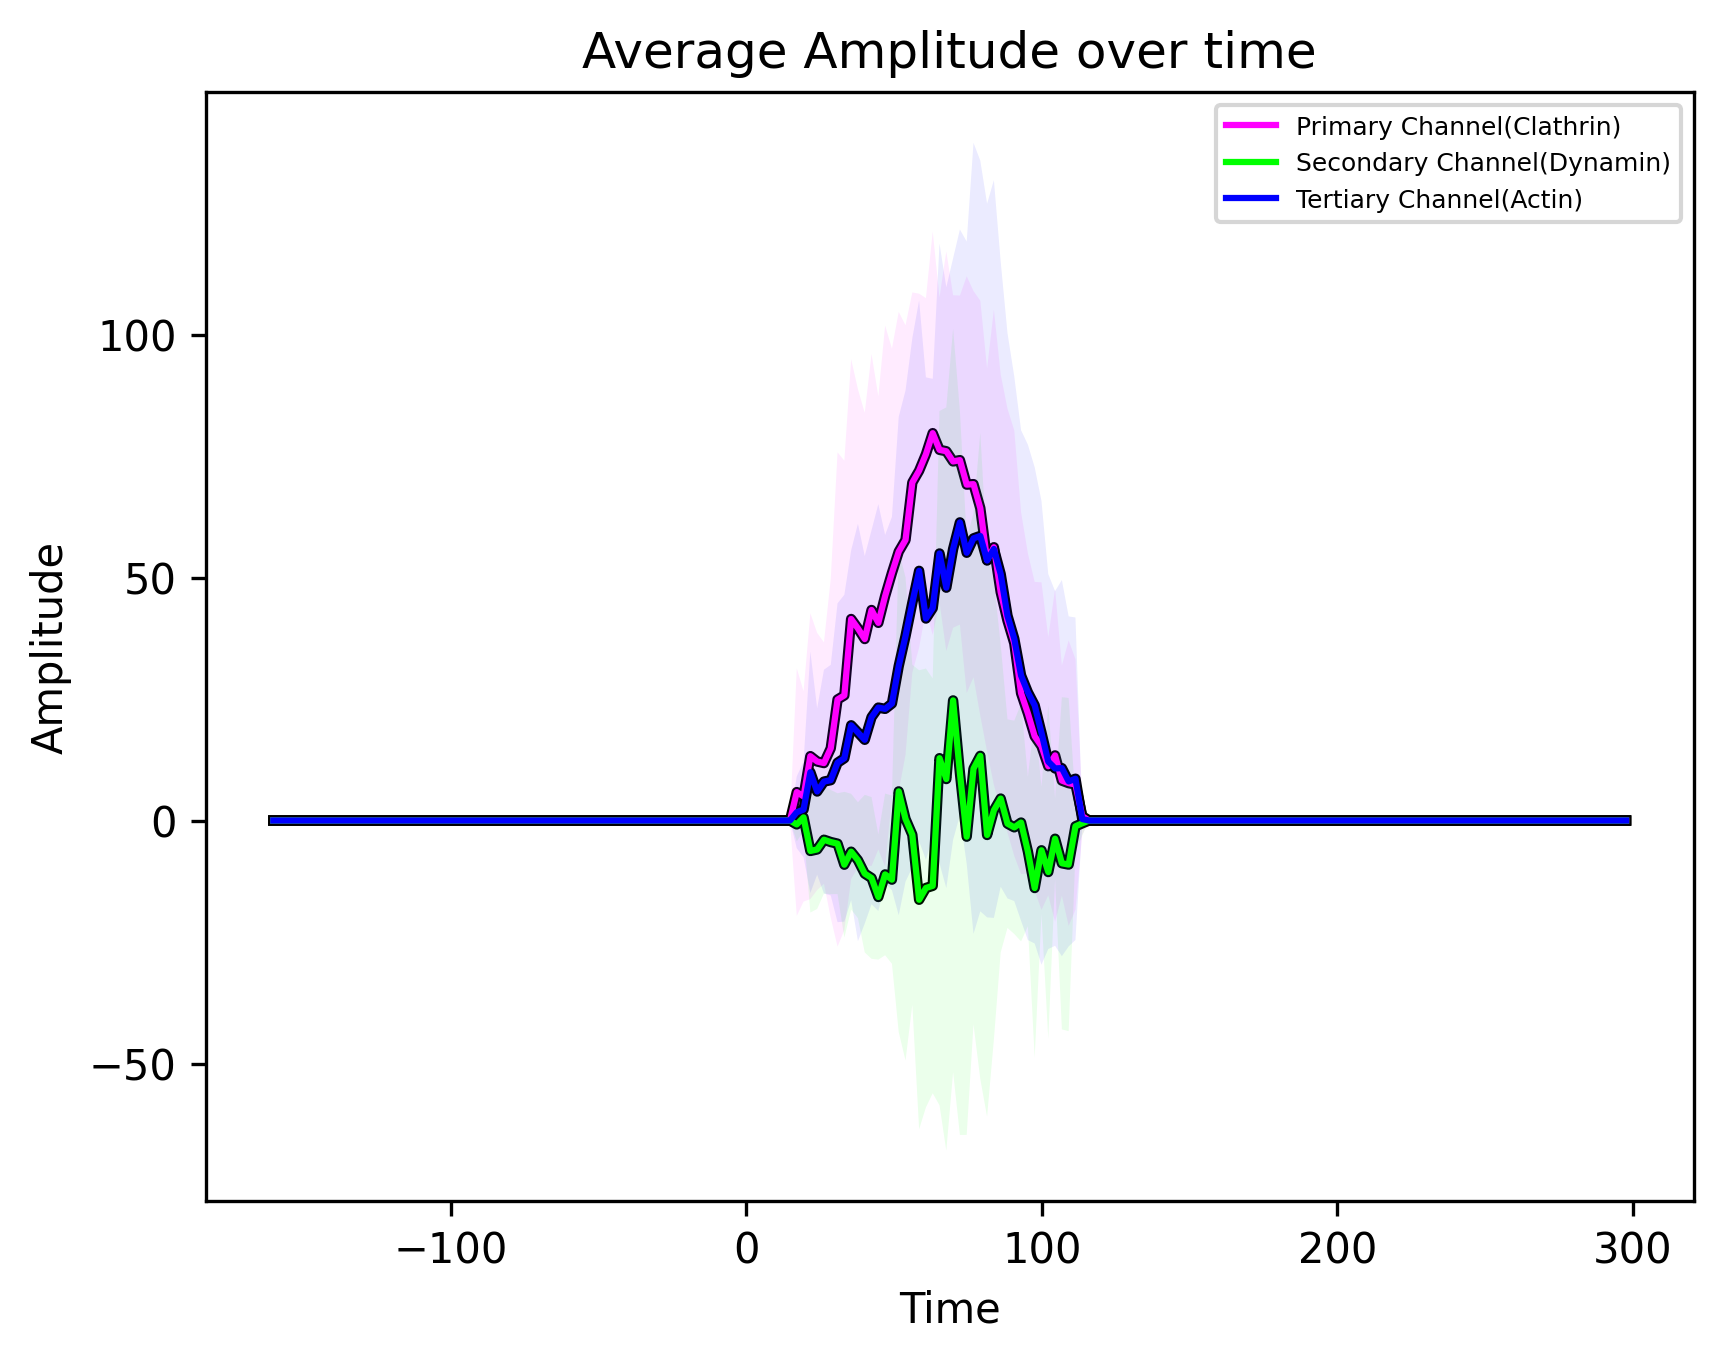

In [83]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[3], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 70, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

**Length 26 to 30**

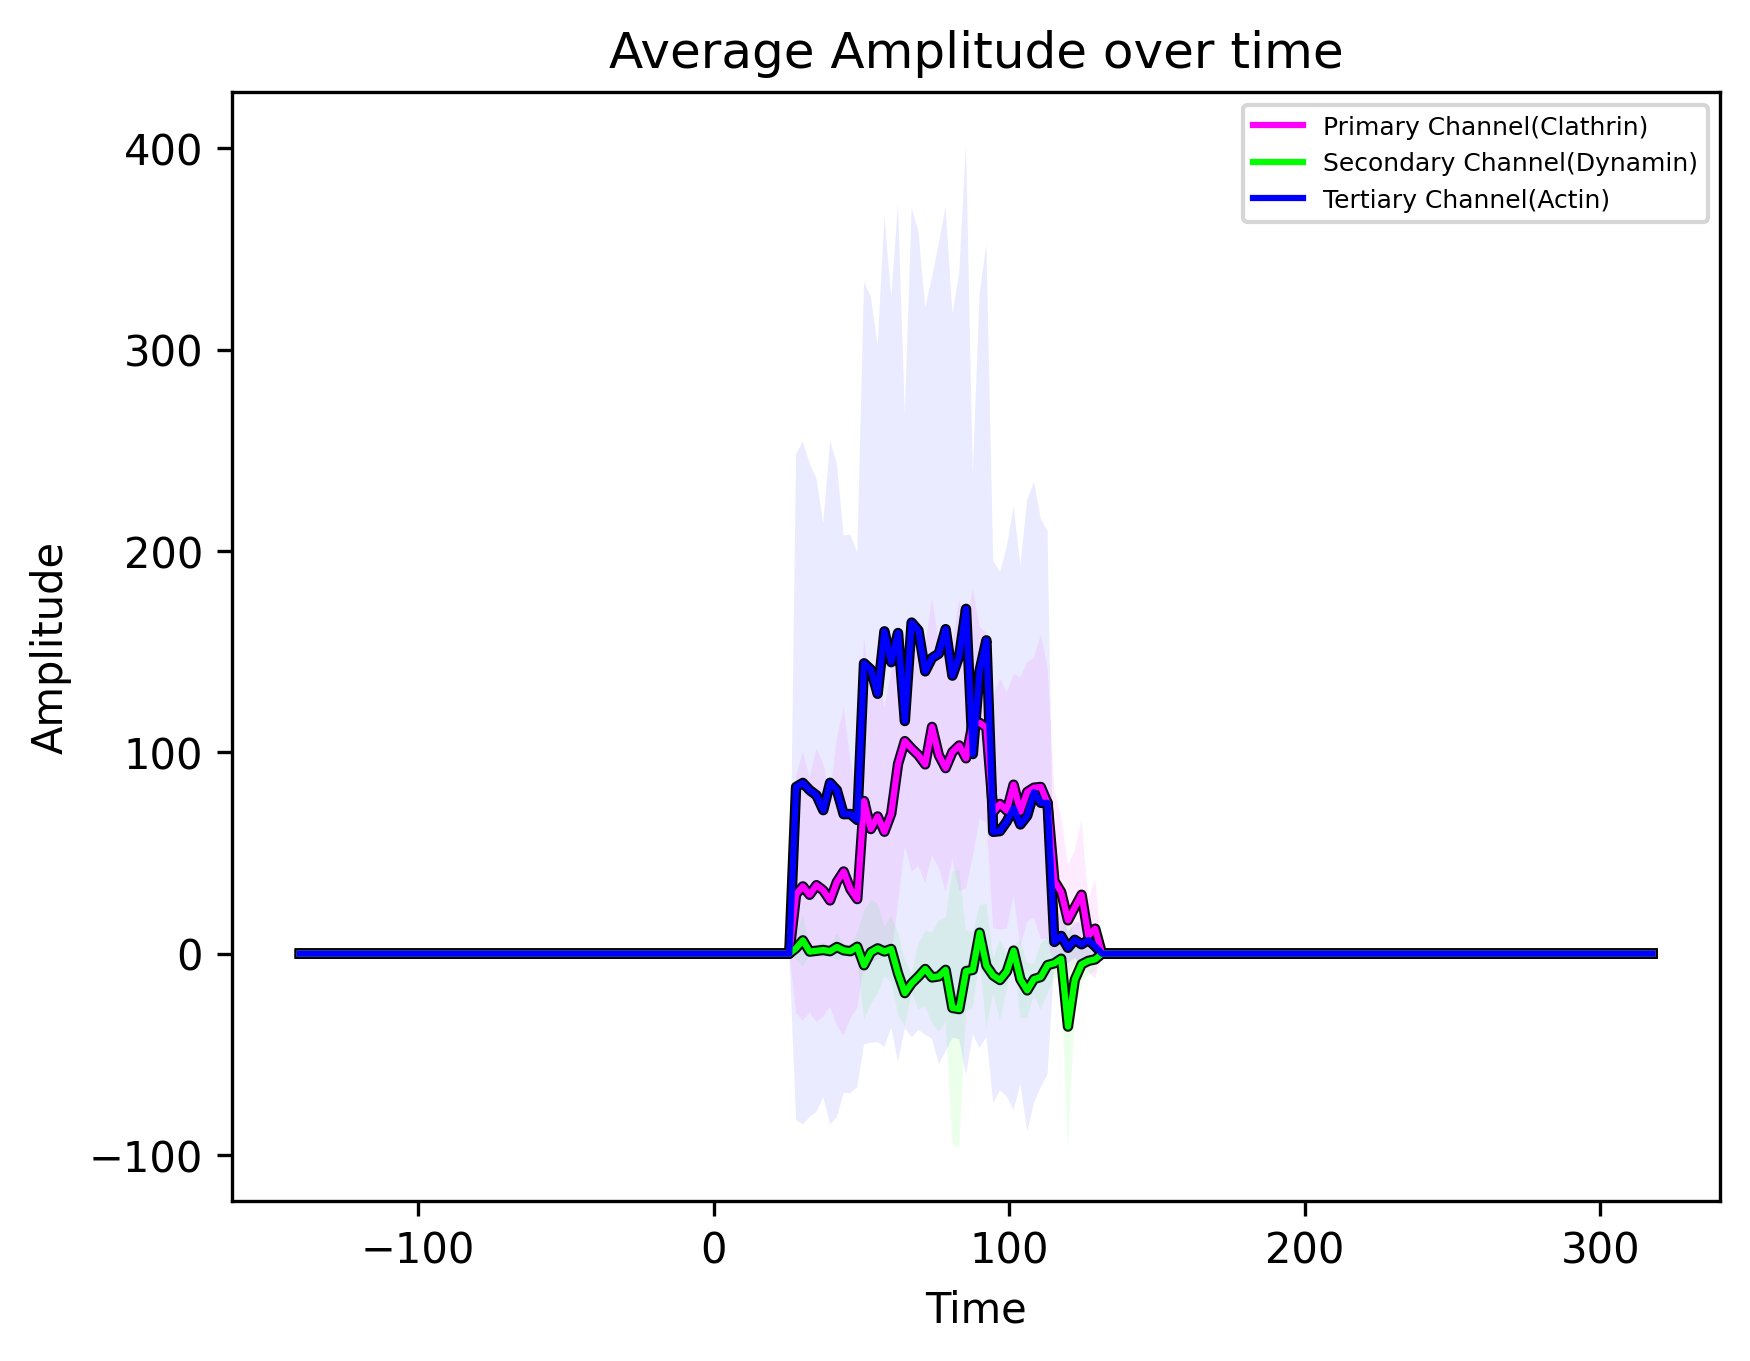

In [58]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[4], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 90, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

**Length 31 to 40**

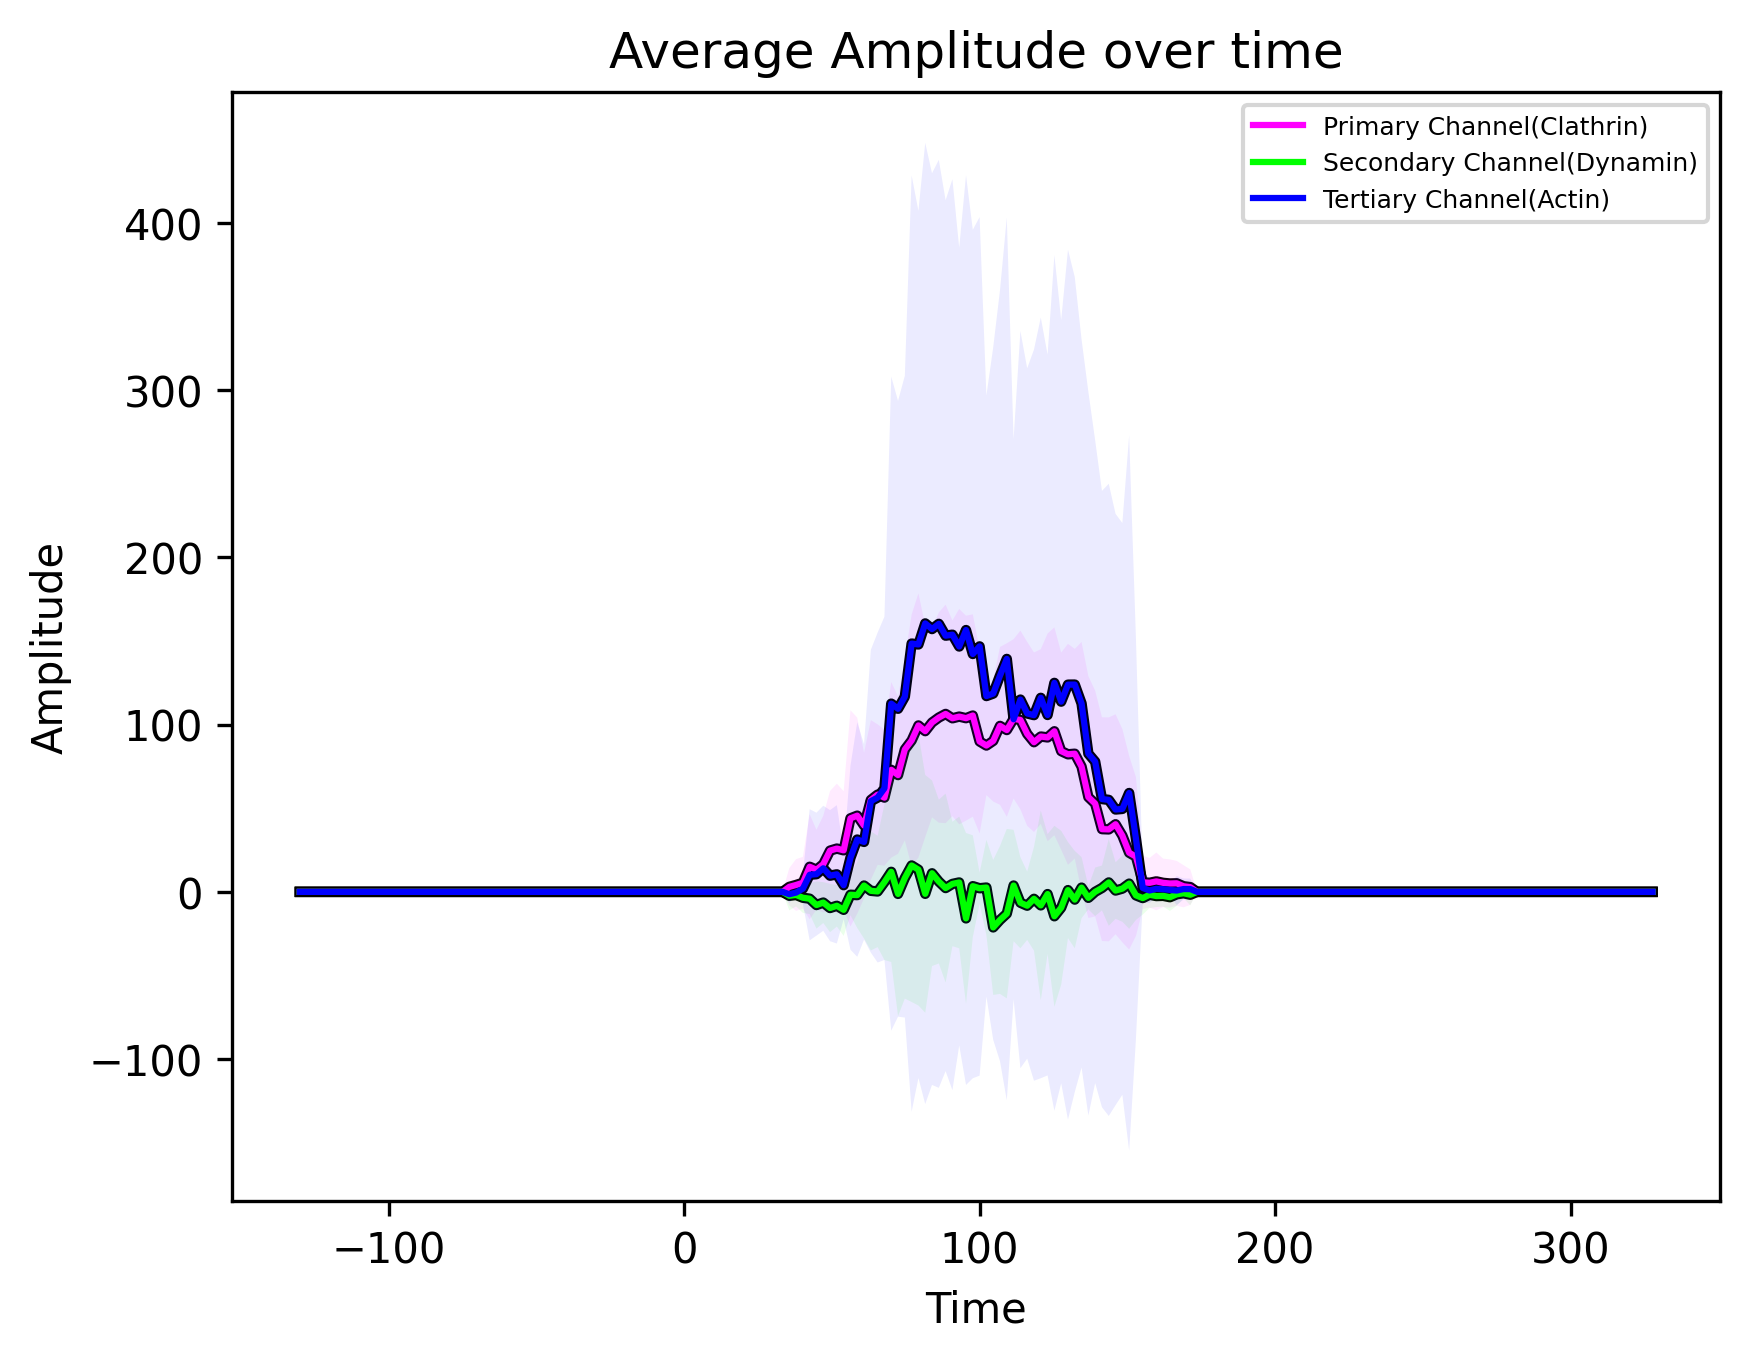

In [59]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[5], backgroundIntensity = [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [bg_intensity_ch3, bg_intensity_ch2, bg_intensity_ch1], time_shift = 100, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])

## To test for normalized aggregated plots, change the following markdown files to code cells. 

In [71]:
track_df.columns

Index(['frame', 'index', 'c3_gaussian_amp', 'c3_mu_x', 'c3_mu_y', 'c3_mu_z',
       'c3_sigma_x', 'c3_sigma_y', 'c3_sigma_z', 'errors', 'frame_y',
       'mean_errors_mu', 'mean_errors_sigma', 'tree_id', 'track_id',
       'number_of_frames', 'color', 'c3_mean_amp', 'c3_voxel_sum',
       'c3_voxel_sum_adjusted', 'c3_peak_amp', 'c3_peak_x', 'c3_peak_y',
       'c3_peak_z', 'c2_amp', 'c2_peak_amp', 'c2_peak_x', 'c2_peak_y',
       'c2_peak_z', 'c2_peak_mean', 'c2_voxel_sum', 'c2_voxel_sum_adjusted',
       'c2_gaussian_amp', 'c2_mu_x', 'c2_mu_y', 'c2_mu_z', 'c2_sigma_x',
       'c2_sigma_y', 'c2_sigma_z', 'c1_amp', 'c1_peak_amp', 'c1_peak_x',
       'c1_peak_y', 'c1_peak_z', 'c1_voxel_sum', 'c1_voxel_sum_adjusted',
       'c1_gaussian_amp', 'c1_mu_x', 'c1_mu_y', 'c1_mu_z', 'c1_sigma_x',
       'c1_sigma_y', 'c1_sigma_z'],
      dtype='object')

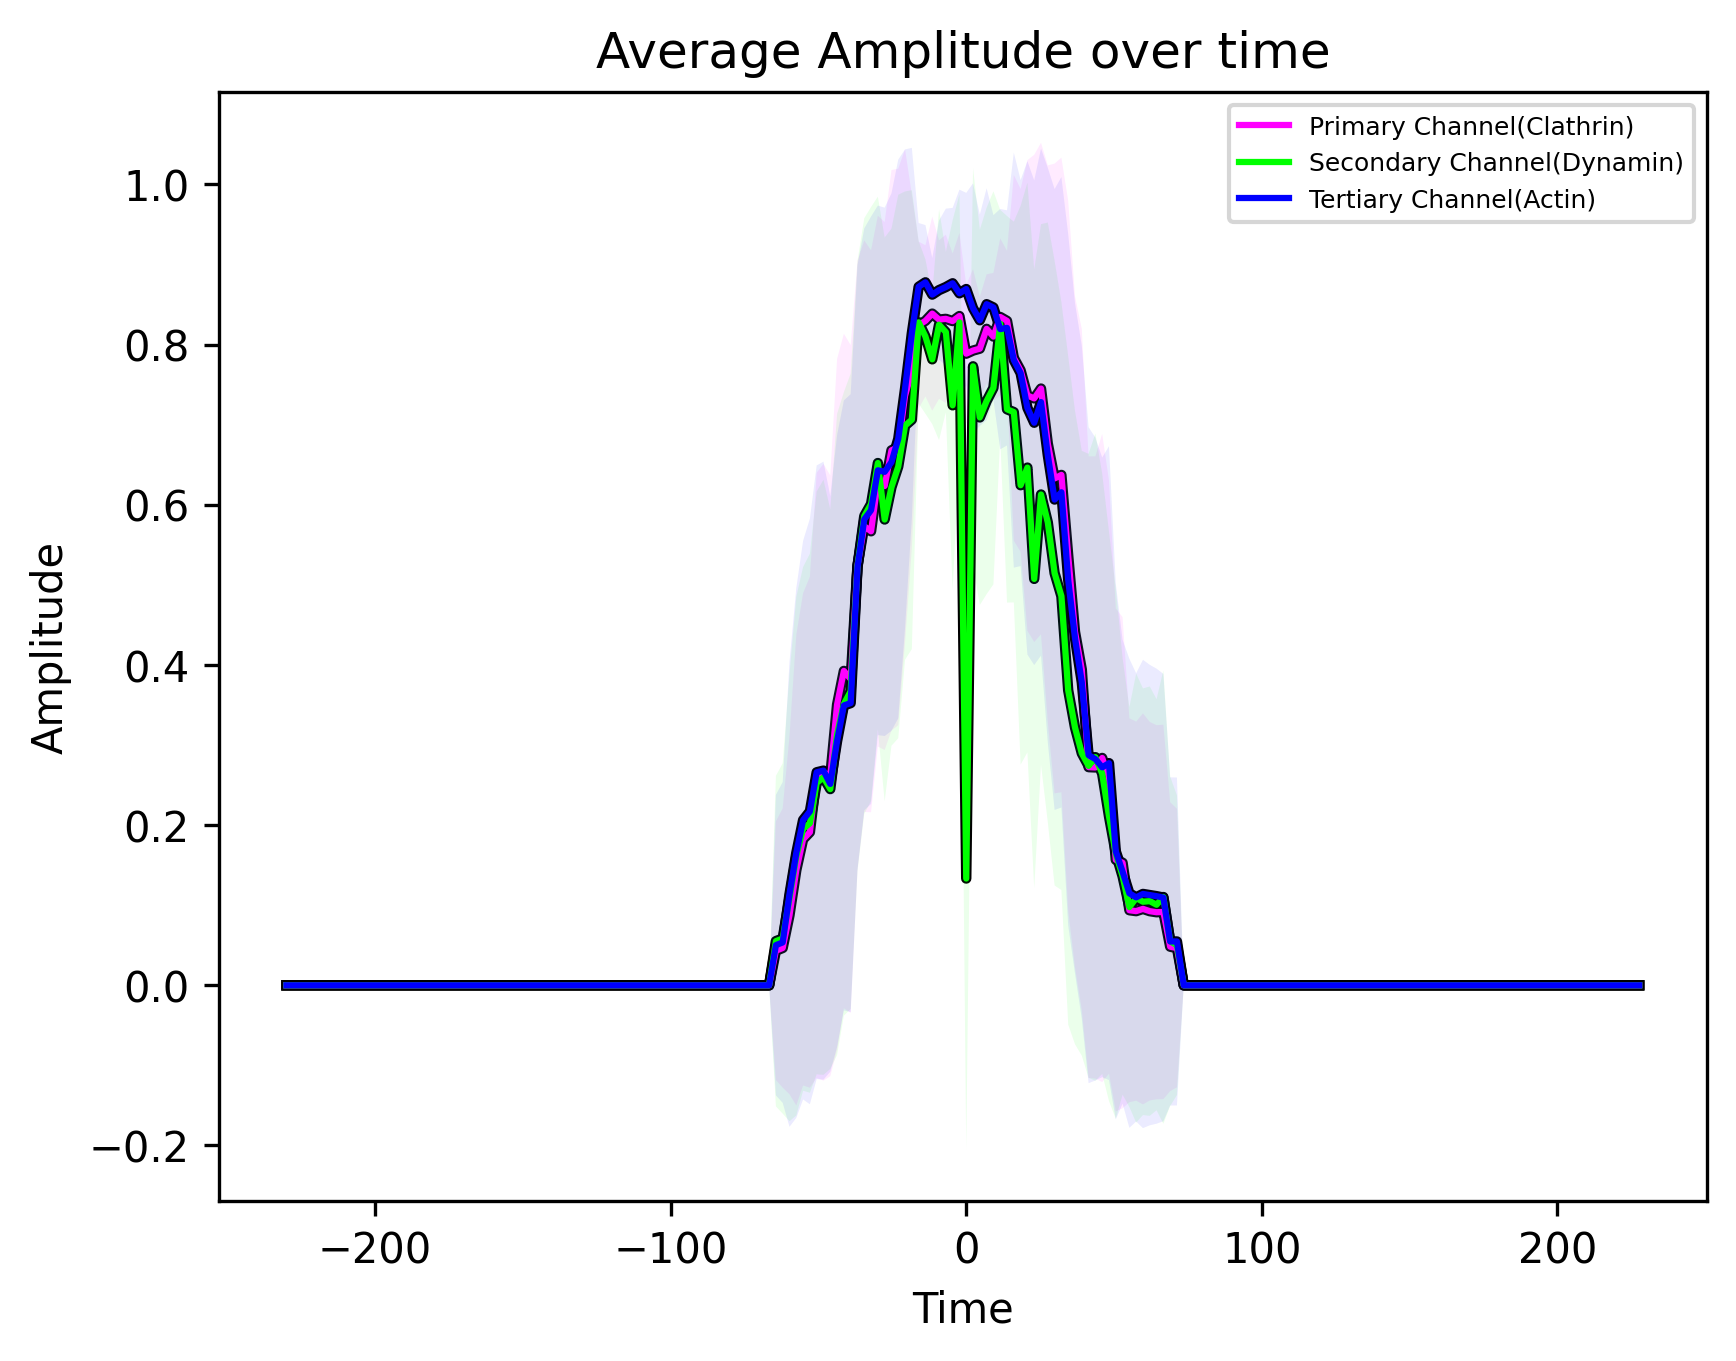

In [76]:
primary_buffer, secondary_buffer, tertiary_buffer = createBufferForLifetimeCohort_normalized(dataframe = track_df ,
listOfTrackIdsAssignedToCohort = track_id_arrays[5], backgroundIntensity = [0,0,0], 
intensity_to_plot = ['c3_gaussian_amp','c2_gaussian_amp', 'c1_gaussian_amp'], track_id_col_name = 'track_id')

cumulative_plots(buffers = [primary_buffer, secondary_buffer, tertiary_buffer],
background_intensity= [0,0,0], time_shift = 0, framerate_msec = 2.3*1000, colors = ['magenta', 'lime', 'blue'], 
                 legend_vals = ['Primary Channel(Clathrin)', 'Secondary Channel(Dynamin)', 'Tertiary Channel(Actin)'])